<a href="https://colab.research.google.com/github/qb4745/evaluacion_1_deep_learning/blob/main/evaluacion_1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===============================
# MLP para Fashion MNIST
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Parámetros globales
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote para entrenamiento
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de carga de datos...
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: ...y los preprocesa para su uso en redes neuronales.
# Normalización: Escalar imágenes al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Reformateo: Añadir dimensión de canal (necesario para Keras aunque sea 1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# IL 1.2: (Relacionado) Preparación de etiquetas para función de error/salida 'categorical_crossentropy'/'softmax'
# One-hot encoding de etiquetas
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1: ...considerando los conceptos de Deep Learning, tales como Perceptrón, Perceptrón multicapa y Red Neuronal Artificial.
# IL 1.3: Programa algoritmos en lenguaje Python, utilizando Tensorflow mediante Keras... para optimizar un modelo... (MLP).
print("\nDefiniendo la arquitectura del modelo MLP...")
model = keras.Sequential(name="mlp_fashion_mnist")
# Capa de aplanamiento para convertir la imagen 2D en vector 1D para el MLP
model.add(layers.Flatten(input_shape=input_shape))

# IL 1.2: Programa funciones de activación... aplicada a redes neuronales...
# Capa oculta 1 con activación ReLU
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))

# IL 1.3: ...aplicando técnicas de optimización y regularización, como dropout...
# Capa Dropout para regularización
model.add(layers.Dropout(0.5, name="dropout_1"))

# Capa oculta 2 con activación ReLU
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(0.5, name="dropout_2")) # Más Dropout

# IL 1.2: Programa funciones de... salida... aplicada a redes neuronales...
# Capa de salida con activación Softmax para clasificación multiclase
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

# Mostrar resumen de la arquitectura creada
model.summary()

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: ...para optimizar un modelo... (Selección de optimizador y tasa de aprendizaje)
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Programa funciones de... error... aplicada a redes neuronales...
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy... (Se especifica aquí)
model.compile(
    loss="categorical_crossentropy", # Función de error/pérdida
    optimizer=optimizer,             # Algoritmo de optimización
    metrics=["accuracy"]             # Métrica(s) a monitorizar
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecuta los procedimientos fundamentales de... entrenamiento de la red neuronal...
# Configura parámetros clave como épocas y tamaño de batch (definidos en Sección 1).
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa parte del training set para validación durante el entrenamiento
    verbose=2 # Muestra una línea por época
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa el desempeño del modelo con métricas como accuracy...
print("\nEvaluando en conjunto de prueba:")
score = model.evaluate(x_test, y_test, verbose=0) # Evalúa en datos no vistos
print(f"Test loss: {score[0]:.4f}")
# Esta es la métrica 'accuracy' calculada en el conjunto de prueba
print(f"Test accuracy: {score[1]:.4f}")

# ===============================
# Fin del Script Principal
# ===============================

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "mlp_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 9s - 22ms/step - accuracy: 0.6561 - loss: 0.9615 - val_accuracy: 0.8158 - val_loss: 0.5089
Epoch 2/15
422/422 - 6s - 13ms/step - accuracy: 0.7865 - loss: 0.6105 - val_accuracy: 0.8348 - val_loss: 0.4413
Epoch 3/15
422/422 - 8s - 19ms/step - accuracy: 0.8113 - loss: 0.5489 - val_accuracy: 0.8538 - val_loss: 0.4053
Epoch 4/15
422/422 - 2s - 5ms/step - accuracy: 0.8214 - loss: 0.5150 - val_accuracy: 0.8553 - val_loss: 0.4015
Epoch 5/15
422/422 - 3s - 6ms/step - accuracy: 0.8291 - loss: 0.4908 - val_accuracy: 0.8603 - val_loss: 0.3859
Epoch 6/15
422/422 - 4s - 9ms/step - accuracy: 0.8360 - loss: 0.4740 - val_accuracy: 0.8658 - val_loss: 0.3735
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.8399 - loss: 0.4605 - val_accuracy: 0.8645 - val_loss: 0.3674
Epoch 8/15
422/422 - 2s - 6ms/step - accuracy: 0.8434 - loss: 0.4506 - val_accuracy: 0.8668 - val_loss

Cargando dataset Fashion MNIST...
Dataset cargado.
Forma datos entrenamiento (x_train): (60000, 28, 28, 1), 60000 muestras
Forma datos prueba (x_test): (10000, 28, 28, 1), 10000 muestras
Forma etiquetas entrenamiento (y_train): (60000, 10)
Forma etiquetas prueba (y_test): (10000, 10)

Definiendo la arquitectura del modelo MLP (Baseline)...


Model: "mlp_fashion_mnist_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compilando el modelo...
Modelo compilado con éxito.

Iniciando entrenamiento por 15 épocas con tamaño de lote 128...
Epoch 1/15
422/422 - 4s - 9ms/step - accuracy: 0.6586 - loss: 0.9577 - val_accuracy: 0.8225 - val_loss: 0.4898
Epoch 2/15
422/422 - 2s - 6ms/step - accuracy: 0.7862 - loss: 0.6105 - val_accuracy: 0.8438 - val_loss: 0.4329
Epoch 3/15
422/422 - 2s - 5ms/step - accuracy: 0.8125 - loss: 0.5420 - val_accuracy: 0.8393 - val_loss: 0.4303
Epoch 4/15
422/422 - 2s - 5ms/step - accuracy: 0.8230 - loss: 0.5071 - val_accuracy: 0.8572 - val_loss: 0.3986
Epoch 5/15
422/422 - 3s - 8ms/step - accuracy: 0.8289 - loss: 0.4892 - val_accuracy: 0.8558 - val_loss: 0.4020
Epoch 6/15
422/422 - 2s - 5ms/step - accuracy: 0.8353 - loss: 0.4726 - val_accuracy: 0.8587 - val_loss: 0.3760
Epoch 7/15
422/422 - 3s - 6ms/step - accuracy: 0.8391 - loss: 0.4605 - val_accuracy: 0.8608 - val_loss: 0.3743
Epoch 8/15
422/422 - 3s - 6ms/step - accuracy: 0.8422 - loss: 0.4528 - val_accuracy: 0.8643 - val_loss: 0

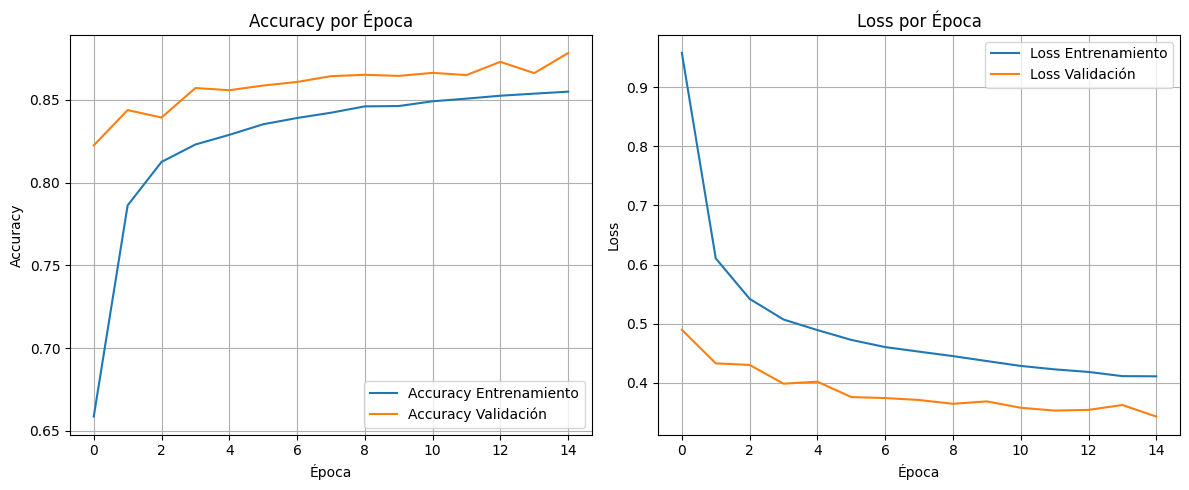


--- Fin del Script ---


In [2]:
# ===============================
# MLP para Fashion MNIST - Versión Mejorada para Cumplir ILs
# ===============================

# -------------------------------
# Sección 1: Importaciones y Configuración Inicial
# -------------------------------
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt # Añadido para visualización
from sklearn.metrics import classification_report # Añadido para métricas IL 1.4

# Parámetros globales (Estos son HIPERPARÁMETROS CLAVE para experimentar - IL 1.1, IL 1.3)
num_classes = 10         # Número de clases de salida (0-9)
input_shape = (28, 28, 1)  # Forma de entrada para cada imagen
batch_size = 128         # Tamaño de lote
epochs = 15              # Número de épocas de entrenamiento
learning_rate = 0.001    # Tasa de aprendizaje inicial para Adam
dropout_rate = 0.5       # Tasa de Dropout (¡experimentar con este valor!)

# -------------------------------
# Sección 2: Carga y Preprocesamiento de Datos (IL 1.1)
# -------------------------------
# IL 1.1: Carga de datos
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Dataset cargado.")

# IL 1.1: Preprocesamiento
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

print(f"Forma datos entrenamiento (x_train): {x_train.shape}, {x_train.shape[0]} muestras")
print(f"Forma datos prueba (x_test): {x_test.shape}, {x_test.shape[0]} muestras")

# Guardar copias de las etiquetas de prueba para evaluación posterior (IL 1.4)
y_test_labels = y_test.copy() # Guardar etiquetas originales (números 0-9)

# IL 1.2: Preparación de etiquetas para 'categorical_crossentropy'/'softmax'
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f"Forma etiquetas entrenamiento (y_train): {y_train.shape}")
print(f"Forma etiquetas prueba (y_test): {y_test.shape}")

# -------------------------------
# Sección 3: Definición del Modelo MLP (IL 1.1, IL 1.2, IL 1.3)
# -------------------------------
# IL 1.1, IL 1.3: Implementación de un MLP usando Keras
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.2):**
#    - Para probar otras funciones de activación, cambia 'relu' por 'sigmoid', 'tanh', etc.
#    - Para probar diferentes arquitecturas, cambia el número de capas o neuronas (ej: 128 -> 256).
#    - Entrena un modelo por cada cambio y compara resultados.
print("\nDefiniendo la arquitectura del modelo MLP (Baseline)...")
model = keras.Sequential(name="mlp_fashion_mnist_baseline")
model.add(layers.Flatten(input_shape=input_shape))
# IL 1.2: Uso de función de activación 'relu'
model.add(layers.Dense(128, activation="relu", name="hidden_layer_1"))
# IL 1.3: Uso de técnica de regularización 'Dropout'
model.add(layers.Dropout(dropout_rate, name="dropout_1")) # ¡Experimenta con dropout_rate!
model.add(layers.Dense(64, activation="relu", name="hidden_layer_2"))
model.add(layers.Dropout(dropout_rate, name="dropout_2"))
# IL 1.2: Uso de función de activación/salida 'softmax'
model.add(layers.Dense(num_classes, activation="softmax", name="output_layer"))

model.summary() # Útil para verificar la estructura y número de parámetros

# -------------------------------
# Sección 4: Compilación del Modelo (IL 1.2, IL 1.3, IL 1.4)
# -------------------------------
# IL 1.3: Selección de optimizador Adam
# **ACCIÓN REQUERIDA (Experimentación IL 1.3):**
#    - Prueba otros optimizadores (ej: keras.optimizers.SGD(learning_rate=...)).
#    - Ajusta el 'learning_rate'.
print("\nCompilando el modelo...")
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# IL 1.2: Selección de función de error 'categorical_crossentropy'
# **ACCIÓN REQUERIDA (Experimentación IL 1.2):**
#    - Si usas etiquetas numéricas (no one-hot), podrías usar 'sparse_categorical_crossentropy'.
#    - Compara el impacto si cambias la función de error (aunque categorical_crossentropy es estándar aquí).
# IL 1.4: Especificación de métrica 'accuracy' (se añadirán otras en evaluación)
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"] # Accuracy se calcula durante el entrenamiento/evaluación
)
print("Modelo compilado con éxito.")

# -------------------------------
# Sección 5: Entrenamiento del Modelo (IL 1.1)
# -------------------------------
# IL 1.1: Ejecución del entrenamiento
# **ACCIÓN REQUERIDA (Experimentación IL 1.1, IL 1.3):**
#    - Ejecuta este bloque con diferentes 'batch_size' y 'epochs'.
#    - Compara las curvas de aprendizaje (generadas más abajo) para cada experimento.
print(f"\nIniciando entrenamiento por {epochs} épocas con tamaño de lote {batch_size}...")
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1, # Usa 10% para validación
    verbose=2
)
print("Entrenamiento completado.")

# -------------------------------
# Sección 6: Evaluación Detallada en el Conjunto de Prueba (IL 1.4)
# -------------------------------
# IL 1.4: Evalúa desempeño con accuracy, precision, recall, F1-Score
print("\nEvaluando en conjunto de prueba:")
# Paso 1: Obtener Loss y Accuracy base con evaluate()
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss (Pérdida): {score[0]:.4f}")
print(f"Test accuracy (Exactitud): {score[1]:.4f}")

# Paso 2: Obtener predicciones para calcular otras métricas
y_pred_prob = model.predict(x_test) # Obtiene probabilidades de salida
y_pred_classes = np.argmax(y_pred_prob, axis=1) # Convierte probabilidades a clase predicha (0-9)

# Paso 3: Calcular Precision, Recall, F1-Score usando classification_report
# Necesitamos las etiquetas de prueba originales (0-9), no las one-hot
print("\nReporte de Clasificación (Precision, Recall, F1-Score por clase y promedios):")
# y_test_labels fue guardada antes del one-hot encoding
print(classification_report(y_test_labels, y_pred_classes, digits=4))

# **ACCIÓN REQUERIDA (IL 1.4):**
#    - Crear un cuadro resumen en tu informe/notebook con Accuracy, Precision (promedio), Recall (promedio), F1-Score (promedio).
#    - Interpretar estas métricas: ¿Qué clases clasifica bien/mal? ¿Hay desbalance?
#    - Comparar estas métricas entre los diferentes modelos que entrenaste en tus experimentos.

# -------------------------------
# Sección 7: Visualización de Curvas de Aprendizaje (Análisis IL 1.1, IL 1.3)
# -------------------------------
# Útil para analizar el entrenamiento, detectar overfitting/underfitting y comparar experimentos
print("\nGenerando gráficos de curvas de aprendizaje...")
plt.figure(figsize=(12, 5))

# Gráfico de Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy Validación')
plt.title('Accuracy por Época')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Gráfico de Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss Validación')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() # Muestra los gráficos

# **ACCIÓN REQUERIDA (Análisis y Comparación IL 1.1, IL 1.3):**
#    - Analiza estas curvas: ¿Hay sobreajuste (gap grande entre train/val)? ¿El modelo converge?
#    - Guarda estos gráficos para cada experimento que realices (ej., con diferente tasa de dropout, diferente # de épocas, etc.).
#    - Presenta gráficos comparativos en tu informe/notebook para justificar cómo las técnicas de optimización (dropout) o los cambios de hiperparámetros afectaron el entrenamiento.

# ===============================
# Sección 8: Conclusiones y Próximos Pasos (Documentación)
# ===============================
# **ACCIÓN REQUERIDA:**
#    - En tu cuaderno Jupyter, añade una sección final de Markdown para:
#        - Resumir los resultados del MEJOR modelo encontrado tras la experimentación.
#        - Discutir los hallazgos clave (qué funcionó, qué no, impacto de parámetros).
#        - Comparar explícitamente diferentes configuraciones (tabla resumen es ideal).
#        - Justificar las decisiones finales de arquitectura e hiperparámetros.
#        - Reflexionar sobre posibles mejoras futuras.
#
# ¡Recuerda documentar CADA experimento que realices en tu cuaderno!
# ===============================

print("\n--- Fin del Script ---")

---

## 1. Introducción

Este proyecto aborda un problema práctico de clasificación de imágenes utilizando una Red Neuronal Artificial (RNA) de tipo Perceptrón Multicapa (MLP). El objetivo es aplicar los fundamentos de Deep Learning para entrenar un modelo capaz de identificar diferentes tipos de artículos de moda a partir de imágenes en escala de grises.

Para este propósito, utilizaremos el dataset **Fashion-MNIST**. Este conjunto de datos fue desarrollado por Zalando Research y se presenta como un reemplazo directo ("drop-in replacement") del clásico dataset MNIST de dígitos escritos a mano. Mientras que MNIST es un estándar ampliamente utilizado para la validación inicial de algoritmos de Machine Learning, Fashion-MNIST ofrece un desafío potencialmente mayor manteniendo la misma estructura y formato: un conjunto de entrenamiento de 60,000 imágenes y un conjunto de prueba de 10,000 imágenes, todas ellas en escala de grises y de tamaño 28x28 píxeles, distribuidas en 10 clases distintas.

La elección de Fashion-MNIST nos permite trabajar con un dataset estandarizado, bien conocido en la comunidad, pero que requiere que el modelo aprenda características más complejas que las presentes en los dígitos manuscritos. El objetivo final de este encargo es implementar, entrenar, optimizar y evaluar un MLP utilizando TensorFlow/Keras para clasificar correctamente las imágenes de artículos de moda de este dataset, cumpliendo con los indicadores de logro especificados en la evaluación.

*Fuente oficial del dataset: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)*

## 2. Descripción del Dataset (Contenido)

El dataset Fashion-MNIST se compone de imágenes y sus correspondientes etiquetas de clase. A continuación, se detallan sus características principales:

*   **Dimensiones de la Imagen:** Cada imagen tiene una altura de 28 píxeles y un ancho de 28 píxeles, resultando en un total de 784 píxeles por imagen.
*   **Formato de Píxeles:** Las imágenes están en escala de grises. Cada píxel tiene asociado un único valor numérico entero que indica su nivel de oscuridad. Este valor varía entre 0 (blanco) y 255 (negro). Valores más altos representan píxeles más oscuros.
*   **Estructura de los Datos:** Cada Fila del Dataset representa una imagen:
    *   **Primera Columna:** Corresponde a la etiqueta de clase (un número del 0 al 9) que identifica el tipo de artículo de moda representado en la imagen.
    *   **Columnas Restantes (784):** Contienen los valores de los píxeles (0-255) de la imagen asociada, generalmente desplegados en un formato aplanado (vector de 784 elementos).
*   **Etiquetas de Clase:** Cada ejemplo (imagen) está asignado a una de las siguientes 10 clases, representadas por un número entero:

    *   `0`: T-shirt/top (Camiseta/Top)
    *   `1`: Trouser (Pantalón)
    *   `2`: Pullover (Suéter)
    *   `3`: Dress (Vestido)
    *   `4`: Coat (Abrigo)
    *   `5`: Sandal (Sandalia)
    *   `6`: Shirt (Camisa)
    *   `7`: Sneaker (Zapatilla deportiva)
    *   `8`: Bag (Bolso)
    *   `9`: Ankle boot (Botín)

**En resumen:** Cada fila del dataset representa una imagen de 28x28 píxeles en escala de grises, junto con una etiqueta numérica que indica a cuál de las 10 categorías de ropa pertenece. El objetivo del modelo será aprender a predecir esta etiqueta basándose en los 784 valores de píxeles de entrada.

---



---

## 3. Configuración del Entorno y Selección del Framework

Antes de proceder con la carga y preprocesamiento de los datos, es fundamental definir el entorno de trabajo y las herramientas principales que se utilizarán para la implementación de la Red Neuronal Artificial (MLP).

### 3.1. Elección del Framework: TensorFlow con Keras

Para el desarrollo de este proyecto, hemos seleccionado **TensorFlow (versión X.Y.Z)** como la biblioteca principal de Deep Learning, utilizando específicamente su interfaz de alto nivel **Keras**.

**Justificación de la Decisión:**

La elección de TensorFlow con Keras se basa en las siguientes consideraciones clave, alineadas con los objetivos de la evaluación y los requisitos del proyecto:

1.  **Facilidad de Uso y Desarrollo Rápido (API de Keras):** Keras proporciona una API intuitiva y modular que simplifica significativamente el proceso de definición, entrenamiento y evaluación de redes neuronales, incluyendo los MLP requeridos. Esto nos permite centrarnos en la aplicación de los conceptos fundamentales de Deep Learning (como la arquitectura del modelo, funciones de activación, optimizadores y métricas) en lugar de en detalles de implementación de bajo nivel.
2.  **Cumplimiento de Requisitos:** TensorFlow/Keras ofrece todas las componentes necesarias para abordar los Indicadores de Logro de esta evaluación:
    *   Capas densas para construir el MLP.
    *   Amplia variedad de funciones de activación  y la flexibilidad para definir funciones personalizadas si fuera necesario .
    *   Diversas funciones de pérdida adecuadas para problemas de clasificación.
    *   Múltiples algoritmos de optimización para entrenar y optimizar el modelo.
    *   Herramientas integradas para la evaluación del modelo y el cálculo de métricas.
3.  **Documentación Extensa y Comunidad Activa:** TensorFlow y Keras cuentan con una documentación oficial muy completa, numerosos tutoriales y una vasta comunidad de usuarios. Esto facilita la resolución de dudas y la consulta de ejemplos durante el desarrollo.
4.  **Integración con Ecosistema:** TensorFlow se integra fácilmente con otras herramientas útiles del ecosistema de Data Science en Python, como NumPy, Pandas y Scikit-learn (que utilizaremos para la carga y preprocesamiento de datos), así como con herramientas de visualización como Matplotlib/Seaborn y TensorBoard (para un análisis más profundo del entrenamiento, si se requiere).
5.  **Entorno de Ejecución (Google Colab):** TensorFlow está preinstalado y optimizado para su uso en Google Colab, el entorno recomendado para este proyecto, permitiendo aprovechar fácilmente los recursos de hardware como GPUs o TPUs para acelerar el entrenamiento si fuera necesario.

**En resumen**, la combinación TensorFlow/Keras representa un balance adecuado entre potencia, flexibilidad y facilidad de uso, lo que la convierte en una opción idónea para implementar eficientemente el MLP solicitado y cumplir con los objetivos de esta evaluación dentro del plazo establecido. Las siguientes secciones detallarán cómo se utiliza este framework para la carga, preprocesamiento, modelado y evaluación.

---

## **1. Importación de Librerías**
Iniciamos el proyecto importando las bibliotecas y módulos de Python esenciales para llevar a cabo las tareas de carga de datos, preprocesamiento, construcción del modelo, entrenamiento, evaluación y visualización.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import pandas as pd
import time

## **2. Carga de Datos Y División del DataSet**
En esta sección fundamental, procedemos a cargar el dataset Fashion MNIST, que utilizaremos para entrenar y evaluar nuestro modelo de clasificación MLP.

Empleamos la función integrada keras.datasets.fashion_mnist.load_data().
Esta función realiza dos tareas clave:

**Carga:** Obtiene el conjunto de datos completo, descargándolo automáticamente.
**División Estándar:** Divide el dataset cargado en los conjuntos predefinidos y estándar de entrenamiento (x_train, y_train) y prueba (x_test, y_test), tal como fueron definidos originalmente por los creadores del dataset (Zalando Research).

Disponer de esta división predefinida es esencial, ya que nos permite trabajar con la partición estándar utilizada en la comunidad de investigación y asegura una base comparable para la evaluación del modelo. Las variables x_train, y_train contendrán las 60,000 muestras de entrenamiento (imágenes y etiquetas), mientras que x_test, y_test contendrán las 10,000 muestras de prueba, listas para la siguiente fase de análisis exploratorio.

In [8]:
print("Cargando dataset Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
y_test_labels = y_test
print("Dataset cargado y dividido.")
print("-" * 40)





Cargando dataset Fashion MNIST...
Dataset cargado y dividido.
----------------------------------------


## **3. Exploratory Data Analysis (EDA)**

Antes de preprocesar los datos y construir el modelo, es crucial realizar un análisis exploratorio para comprender la estructura, distribución y características del dataset Fashion MNIST. En esta sección, cargaremos los datos, visualizaremos la cantidad de muestras, la distribución de las clases y algunas imágenes de ejemplo.

Resumen Numérico Rápido:
  x_train shape: (60000, 28, 28), y_train shape: (60000,)
  x_test shape: (10000, 28, 28), y_test shape: (10000,)
----------------------------------------


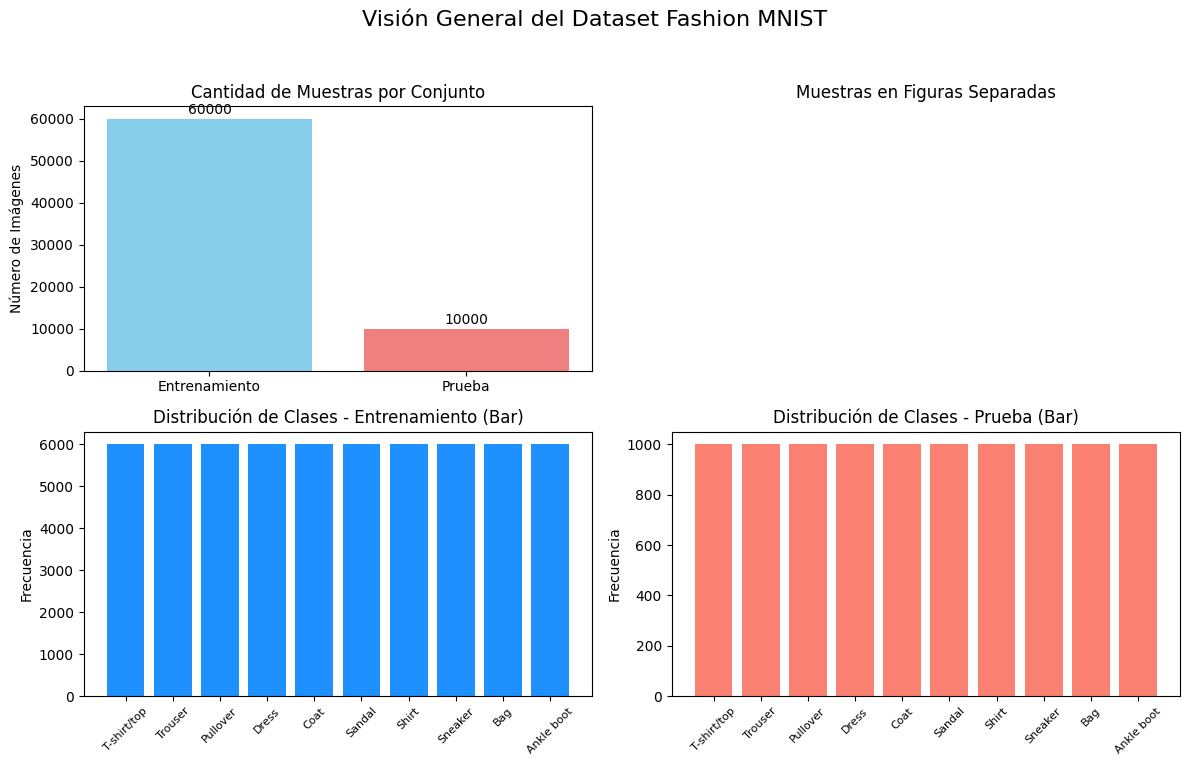


Mostrando algunas imágenes de ENTRENAMIENTO:


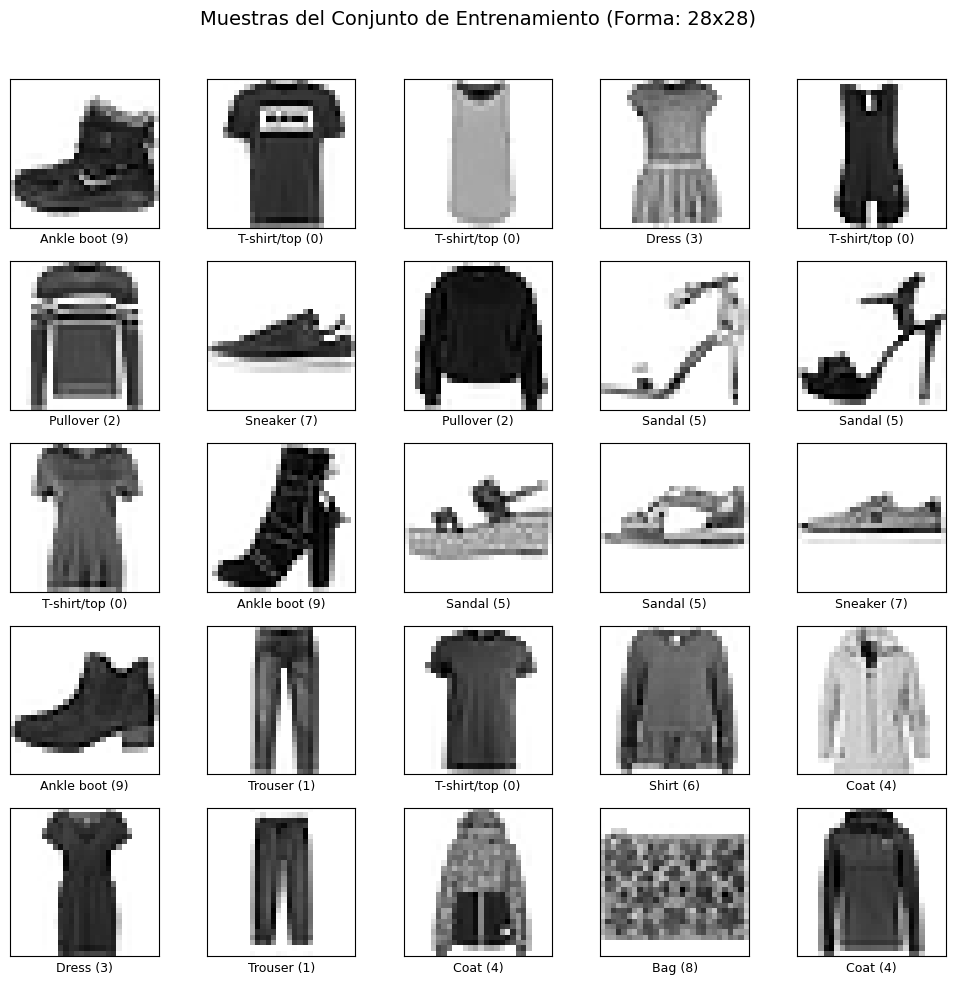


Mostrando algunas imágenes de PRUEBA:


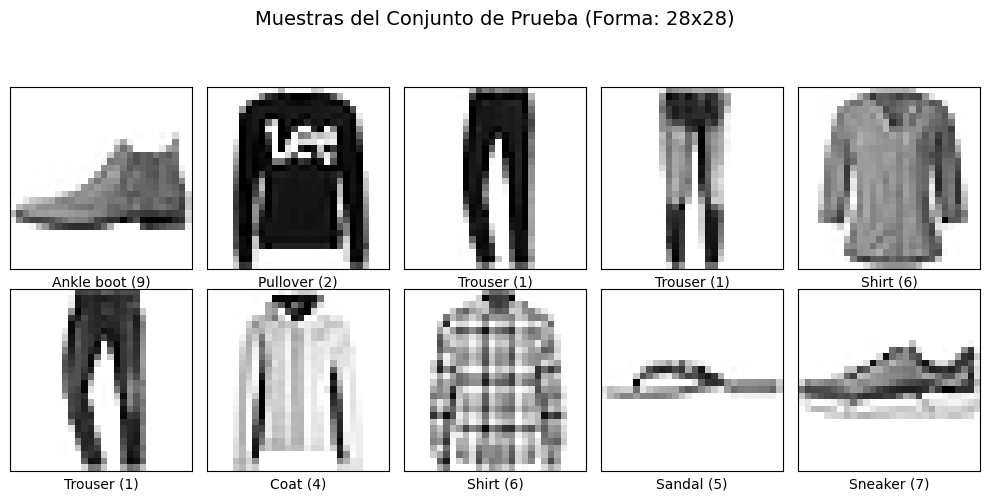

----------------------------------------
Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):
----------------------------------------

Mostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):


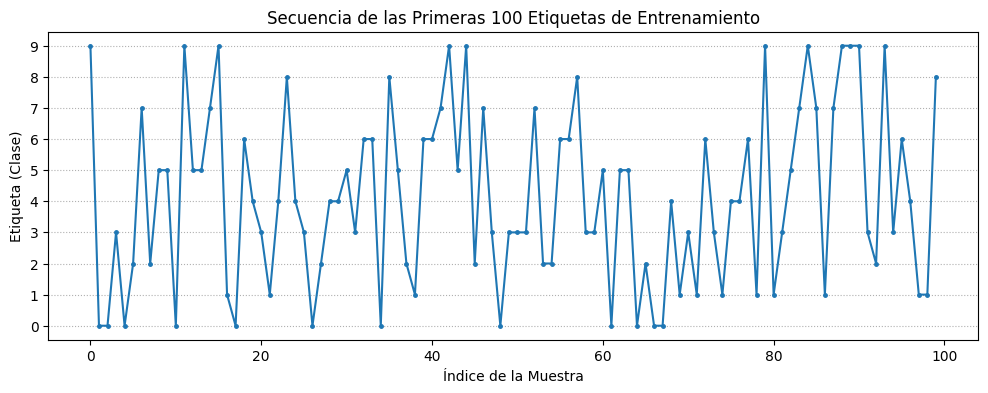

-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.
   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.
Mostrando la Imagen en el Índice: 0
Etiqueta correspondiente: 9 (Ankle boot)
----------------------------------------
Representación como Array NumPy (Valores de Píxeles):
Forma del array de la imagen: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0

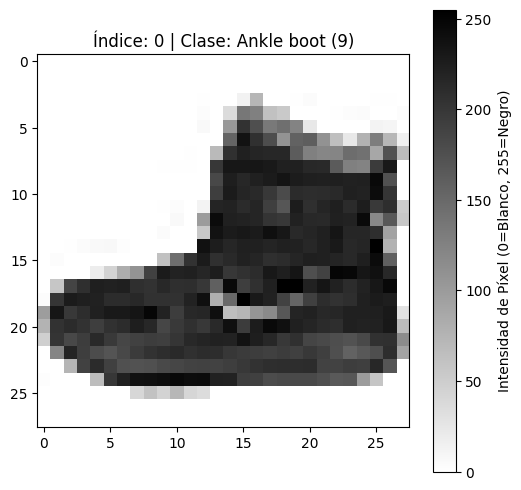


Generando histograma de intensidad de píxeles...


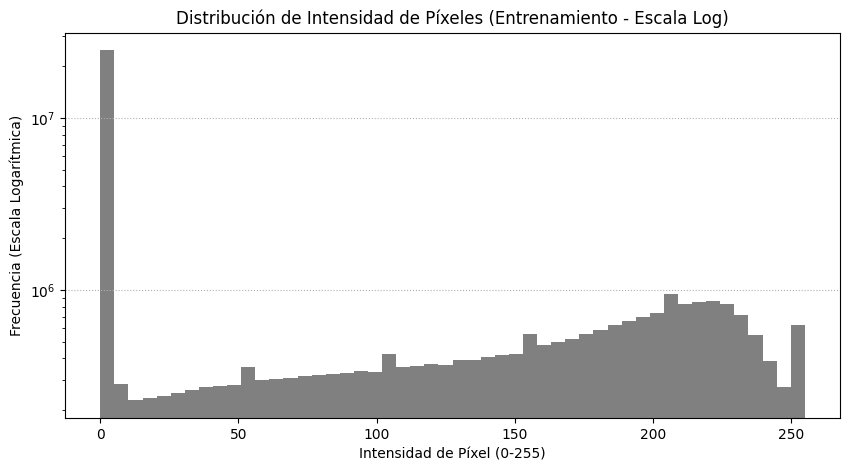

-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.
-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.


In [5]:
# --- Información Numérica (como referencia) ---
print("Resumen Numérico Rápido:")
print(f"  x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"  x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print("-" * 40)


# --- Preparación para Gráficos ---

# Nombres de las clases para las etiquetas (del 0 al 9)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cantidades para el gráfico de barras
train_samples = len(x_train)
test_samples = len(x_test)


# --- Creación de Gráficos PRINCIPALES (Cantidad y Distribución) ---

# Crear una figura para los gráficos de cantidad y distribución (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Visión General del Dataset Fashion MNIST', fontsize=16)

# --- Gráfico 1: Cantidad de Muestras ---
axes[0, 0].bar(['Entrenamiento', 'Prueba'], [train_samples, test_samples], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Cantidad de Muestras por Conjunto')
axes[0, 0].set_ylabel('Número de Imágenes')
for i, count in enumerate([train_samples, test_samples]):
    axes[0, 0].text(i, count + 500, str(count), ha='center', va='bottom')

# --- Gráfico 2: Placeholder / Vacío ---
axes[0, 1].set_title('Muestras en Figuras Separadas')
axes[0, 1].axis('off')

# --- Gráfico 3: Distribución de Clases (Entrenamiento) - Bar Chart ---
train_labels, train_counts = np.unique(y_train, return_counts=True)
axes[1, 0].bar(class_names, train_counts, color='dodgerblue')
axes[1, 0].set_title('Distribución de Clases - Entrenamiento (Bar)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)

# --- Gráfico 4: Distribución de Clases (Prueba) - Bar Chart ---
test_labels, test_counts = np.unique(y_test, return_counts=True)
axes[1, 1].bar(class_names, test_counts, color='salmon')
axes[1, 1].set_title('Distribución de Clases - Prueba (Bar)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Entrenamiento ---
print("\nMostrando algunas imágenes de ENTRENAMIENTO:")
plt.figure(figsize=(10,10))
plt.suptitle(f"Muestras del Conjunto de Entrenamiento (Forma: {x_train.shape[1]}x{x_train.shape[2]})", fontsize=14)
num_rows, num_cols = 5, 5
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_train[i]]} ({y_train[i]})", fontsize=9)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- Creación de Figura SEPARADA para Muestras de Prueba ---
print("\nMostrando algunas imágenes de PRUEBA:")
plt.figure(figsize=(10,5))
plt.suptitle(f"Muestras del Conjunto de Prueba (Forma: {x_test.shape[1]}x{x_test.shape[2]})", fontsize=14)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"{class_names[y_test[i]]} ({y_test[i]})")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- NUEVO: Gráficos Adicionales para y_train / y_test ---

print("-" * 40)
print("Visualizaciones Adicionales para las ETIQUETAS (y_train, y_test):")
print("-" * 40)

# --- Gráfico Adicional 1: Line Plot de las primeras N etiquetas de Entrenamiento ---
print("\nMostrando la secuencia de las primeras 100 etiquetas de entrenamiento (y_train):")
num_labels_to_plot = 100
plt.figure(figsize=(12, 4))
plt.plot(np.arange(num_labels_to_plot), y_train[:num_labels_to_plot], marker='.', linestyle='-', markersize=5)
plt.title(f'Secuencia de las Primeras {num_labels_to_plot} Etiquetas de Entrenamiento')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Etiqueta (Clase)')
plt.yticks(np.arange(10)) # Asegura que los ticks sean los números de clase 0-9
plt.grid(True, axis='y', linestyle=':')
plt.show()
print("-> Observación: Este gráfico muestra el valor de la etiqueta para cada muestra consecutiva.")
print("   Normalmente no revela patrones obvios, ya que el orden suele ser aleatorio.")




# Nombres de las clases para referencia
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- Seleccionar una imagen específica ---
indice_imagen = 0 # Vamos a mostrar la primera imagen (puedes cambiar este número)
imagen_seleccionada = x_train[indice_imagen]
etiqueta_seleccionada = y_train[indice_imagen]
nombre_clase = class_names[etiqueta_seleccionada]

# --- 1. Mostrar la imagen como Array NumPy ---
print(f"Mostrando la Imagen en el Índice: {indice_imagen}")
print(f"Etiqueta correspondiente: {etiqueta_seleccionada} ({nombre_clase})")
print("-" * 40)
print("Representación como Array NumPy (Valores de Píxeles):")
print(f"Forma del array de la imagen: {imagen_seleccionada.shape}")
# Para que no ocupe toda la pantalla, podemos configurar NumPy para imprimir menos
# np.set_printoptions(threshold=50) # Descomenta si quieres limitar la salida
print(imagen_seleccionada)
print("-" * 40)


# --- 2. Mostrar la imagen con un Gráfico (Matplotlib) ---
print("Representación Gráfica de la Imagen:")

plt.figure(figsize=(6, 6)) # Crear una figura (ajusta tamaño si es necesario)

# Mostrar la imagen
# cmap=plt.cm.binary la muestra en blanco y negro (escala de grises invertida)
# cmap='gray' también es común para escala de grises estándar
plt.imshow(imagen_seleccionada, cmap=plt.cm.binary)

# Añadir un título descriptivo
plt.title(f"Índice: {indice_imagen} | Clase: {nombre_clase} ({etiqueta_seleccionada})")

# Añadir una barra de color para entender la escala de píxeles
plt.colorbar(label='Intensidad de Píxel (0=Blanco, 255=Negro)')

# Opcional: Ocultar los ejes numerados (ya que la forma 28x28 es más relevante)
# plt.xticks([])
# plt.yticks([])
plt.grid(False) # Quitar la cuadrícula que a veces aparece por defecto

# Mostrar el gráfico
plt.show()


# --- Histograma de Intensidad de Píxeles (Entrenamiento) ---

print("\nGenerando histograma de intensidad de píxeles...")

# Crear una nueva figura para el histograma con un tamaño específico
plt.figure(figsize=(10, 5)) # Ancho 10, Alto 5 pulgadas

# Calcular y dibujar el histograma:
# 1. x_train.flatten():
#    - `x_train` tiene la forma (60000, 28, 28) o (60000, 28, 28, 1) si ya añadiste el canal.
#    - `.flatten()` convierte este array multidimensional en un ÚNICO array largo (1D)
#      que contiene TODOS los valores de los píxeles de TODAS las 60,000 imágenes de entrenamiento,
#      uno después del otro. (Total: 60000 * 28 * 28 = 47,040,000 valores).
#    - Esto es necesario porque `plt.hist` opera sobre una secuencia de valores individuales.
#
# 2. bins=50:
#    - Divide el rango completo de valores posibles (0 a 255) en 50 intervalos o "contenedores" (bins) de igual tamaño.
#    - `plt.hist` contará cuántos valores de píxeles caen dentro de cada uno de estos 50 intervalos.
#    - Elegir el número de bins afecta la granularidad del histograma.
#
# 3. color='gray':
#    - Simplemente establece el color de las barras del histograma a gris, lo cual es temáticamente apropiado
#      para datos de imágenes en escala de grises.
#
# 4. log=True:
#    - Aplica una escala LOGARÍTMICA al eje Y (Frecuencia).
#    - **¡Esto es muy importante!** En muchas imágenes, los valores de píxeles extremos (como 0 para el fondo blanco)
#      son MUCHÍSIMO más frecuentes que los valores intermedios de gris.
#    - Sin una escala logarítmica, el pico en 0 sería tan alto que las barras para los otros valores
#      serían casi invisibles, haciendo difícil ver su distribución.
#    - La escala logarítmica comprime las frecuencias altas y expande las bajas, permitiendo
#      visualizar mejor la distribución completa, incluyendo los valores menos frecuentes.
plt.hist(x_train.flatten(), bins=50, color='gray', log=True)

# Añadir título y etiquetas a los ejes para claridad
plt.title('Distribución de Intensidad de Píxeles (Entrenamiento - Escala Log)')
plt.xlabel('Intensidad de Píxel (0-255)')
plt.ylabel('Frecuencia (Escala Logarítmica)') # Indicar explícitamente la escala log

# Añadir una cuadrícula horizontal punteada para facilitar la lectura en la escala log
plt.grid(True, axis='y', linestyle=':')

# Mostrar el gráfico generado
plt.show()

print("-> El histograma muestra la frecuencia de cada nivel de intensidad de píxel (0-255) en todo el conjunto de entrenamiento.")
print("-> La escala logarítmica en el eje Y ayuda a visualizar la distribución incluso para intensidades menos frecuentes.")

## **4. Preprocesamiento de Datos para el Modelo**

Tras la exploración inicial en la sección de EDA, procedemos ahora a preparar los datos de Fashion MNIST para que sean adecuados como entrada a nuestro modelo MLP. Este preprocesamiento es esencial para asegurar un entrenamiento eficiente y mejorar el rendimiento potencial del modelo.

Los pasos clave que realizaremos en esta sección son:

1.  **Normalización de Imágenes:** Los valores de los píxeles de las imágenes originales se encuentran en el rango [0, 255]. Escalaremos estos valores al rango [0, 1] dividiendo cada píxel por 255.0. Esta normalización ayuda a estabilizar el proceso de entrenamiento y a que el modelo converja más rápidamente, evitando que valores de píxeles muy altos dominen los cálculos.
2.  **Reformateo de Imágenes:** Añadiremos una dimensión extra al final de la forma (`shape`) de los arrays de imágenes para representar el canal de color. Aunque las imágenes son en escala de grises (un solo canal), muchas capas de Keras esperan explícitamente esta dimensión (formato `[altura, ancho, canales]`), por lo que transformaremos la forma de `(28, 28)` a `(28, 28, 1)`.
3.  **Codificación One-Hot de Etiquetas:** Las etiquetas de clase originales son números enteros del 0 al 9. Para utilizar la función de pérdida `categorical_crossentropy` (adecuada para clasificación multiclase) y la activación `softmax` en la capa de salida, necesitamos convertir estas etiquetas a un formato binario "one-hot". Cada etiqueta se transformará en un vector de 10 elementos con un '1' en la posición correspondiente a su clase y '0's en el resto.

A continuación, implementaremos estos pasos y visualizaremos su efecto en una muestra de los datos para verificar y comprender las transformaciones realizadas.



--- Iniciando Preprocesamiento ---
Muestras originales (imagen y etiqueta) guardadas para visualización.

1. Normalizando imágenes (Escalando a [0, 1])...
   Imágenes normalizadas.

2. Reformateando imágenes (añadiendo dimensión de canal)...
   Dimensión de canal añadida.
   Nueva forma datos entrenamiento (x_train): (60000, 28, 28, 1)

3. Codificando etiquetas (One-Hot Encoding)...
   Etiquetas convertidas a formato one-hot.
   Nueva forma etiquetas entrenamiento (y_train): (60000, 10)
----------------------------------------
Preprocesamiento completado.
----------------------------------------

--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---


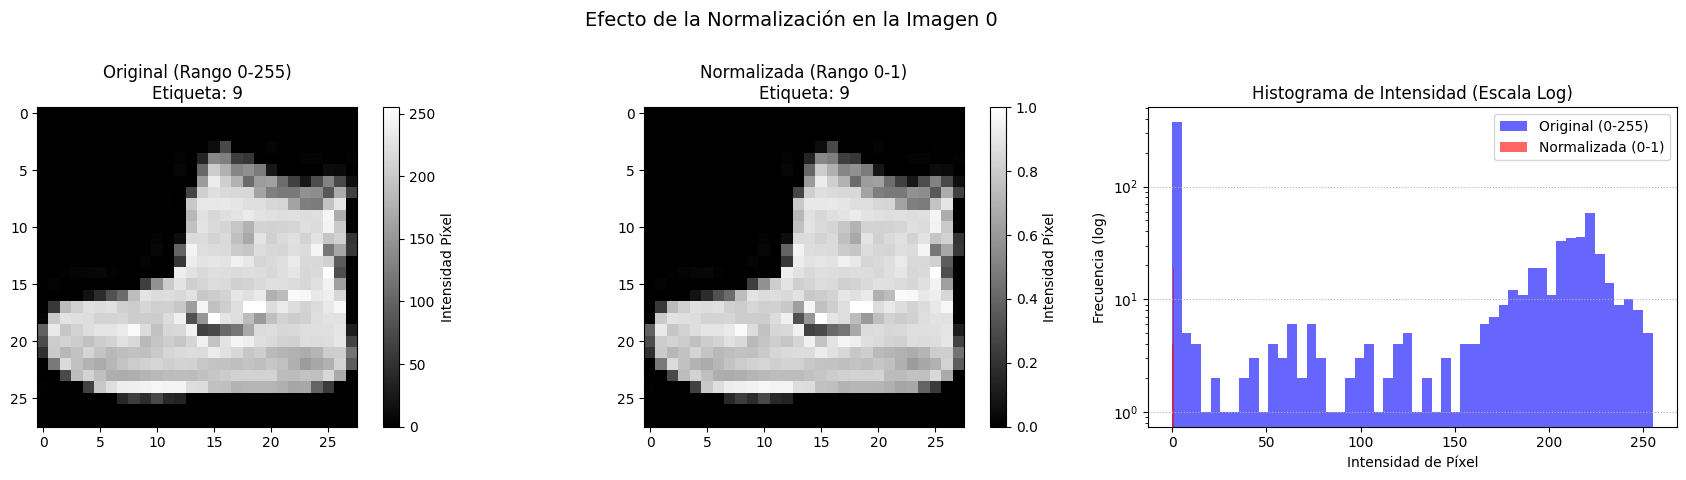

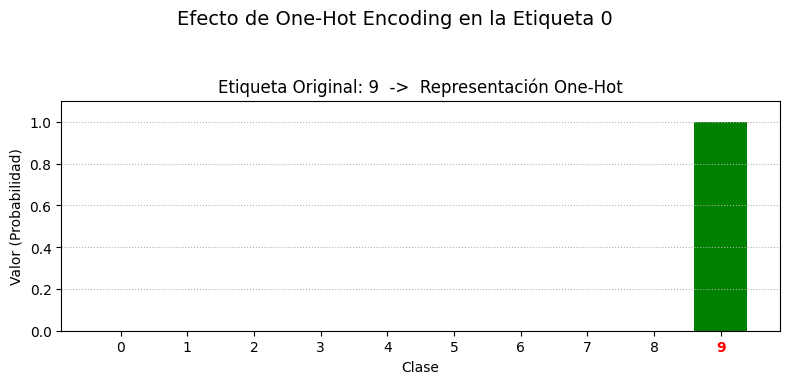

----------------------------------------


'Gráfico 1: Efecto de la Normalización en la Imagen 0 (Figura con 3 subplots)\nSubplot 1: Imagen Original (Rango 0-255)\n¿Qué muestra? Simplemente la primera imagen del dataset tal como se cargó, en escala de grises. La barra de color a la derecha indica que los píxeles más oscuros tienen valores cercanos a 255 y los más claros a 0.\n¿Qué significa? Nos da una referencia visual de cómo son los datos crudos antes de cualquier transformación numérica. Vemos la prenda de vestir (o el artículo) sobre un fondo predominantemente blanco.\n¿Importancia? Sirve como punto de partida visual. Nos permite confirmar que la imagen se cargó correctamente y tener una idea del rango original de los valores de los píxeles (confirmado por la barra de color).\nSubplot 2: Imagen Normalizada (Rango 0-1)\n¿Qué muestra? La misma imagen que antes, pero después de aplicar la normalización (dividir por 255.0). Visualmente, se ve idéntica a la original porque imshow ajusta automáticamente el rango de colores para 

In [6]:
# ---------------------------------------------------------------------------
## 4. Preprocesamiento de Datos para el Modelo
# ---------------------------------------------------------------------------
# Después de explorar los datos, preparamos la data para la red neuronal.
# Estos pasos son cruciales para un entrenamiento eficiente y efectivo.
print("\n--- Iniciando Preprocesamiento ---")

# --- Variables Globales Necesarias ---
# Asegúrate de que num_classes esté definido desde una celda anterior o defínelo aquí
if 'num_classes' not in locals():
    num_classes = 10 # Definir si no existe
    print(f"Variable 'num_classes' definida como {num_classes}.")

# --- Guardar muestras originales para visualización ---
# Guardamos una copia de la primera imagen y etiqueta ANTES de modificarlas.
if 'x_train' in locals() and x_train.ndim == 3 and x_train.size > 0: # Verificar que x_train sea 3D (antes de añadir canal)
    original_image_sample = x_train[0].copy() # Copia de la primera imagen (28x28 array)
    original_label_sample = y_train[0].copy() # Copia de la primera etiqueta (int)
    print("Muestras originales (imagen y etiqueta) guardadas para visualización.")
    sample_available = True
else:
    print("Advertencia: x_train/y_train no están en el formato esperado o vacíos. No se guardaron muestras originales.")
    original_image_sample = None
    original_label_sample = None
    sample_available = False

# --- Paso 1: Normalización de las Imágenes ---
print("\n1. Normalizando imágenes (Escalando a [0, 1])...")
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
print("   Imágenes normalizadas.")

# --- Paso 2: Reformateo de las Imágenes ---
print("\n2. Reformateando imágenes (añadiendo dimensión de canal)...")
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)
print("   Dimensión de canal añadida.")
print(f"   Nueva forma datos entrenamiento (x_train): {x_train.shape}")

# --- Paso 3: Codificación One-Hot de las Etiquetas ---
print("\n3. Codificando etiquetas (One-Hot Encoding)...")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("   Etiquetas convertidas a formato one-hot.")
print(f"   Nueva forma etiquetas entrenamiento (y_train): {y_train.shape}")

print("-" * 40)
print("Preprocesamiento completado.")
print("-" * 40)

# --- Visualización del Efecto del Preprocesamiento (Usando la Muestra Guardada) ---

if sample_available:
    print("\n--- Visualizando Efecto del Preprocesamiento en la Muestra 0 ---")

    # --- Visualización Paso 1: Normalización ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Efecto de la Normalización en la Imagen 0', fontsize=14)

    # Imagen Original
    im_orig = axes[0].imshow(original_image_sample, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title(f'Original (Rango 0-255)\nEtiqueta: {original_label_sample}')
    axes[0].grid(False)
    fig.colorbar(im_orig, ax=axes[0], label='Intensidad Píxel')

    # Imagen Normalizada (Tomamos la primera imagen de x_train ya procesado)
    # Usamos .squeeze() para quitar la dimensión del canal para imshow
    im_norm = axes[1].imshow(x_train[0].squeeze(), cmap='gray', vmin=0, vmax=1)
    axes[1].set_title(f'Normalizada (Rango 0-1)\nEtiqueta: {original_label_sample}')
    axes[1].grid(False)
    fig.colorbar(im_norm, ax=axes[1], label='Intensidad Píxel')

    # Histograma Comparativo
    axes[2].hist(original_image_sample.flatten(), bins=50, color='blue', alpha=0.6, label='Original (0-255)', log=True)
    axes[2].hist(x_train[0].flatten(), bins=50, color='red', alpha=0.6, label='Normalizada (0-1)', log=True)
    axes[2].set_title('Histograma de Intensidad (Escala Log)')
    axes[2].set_xlabel('Intensidad de Píxel')
    axes[2].set_ylabel('Frecuencia (log)')
    axes[2].legend()
    axes[2].grid(True, axis='y', linestyle=':')

    plt.tight_layout(rect=[0, 0.03, 1, 0.93]) # Ajuste para suptitle
    plt.show()

    # --- Visualización Paso 3: One-Hot Encoding ---
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    fig.suptitle('Efecto de One-Hot Encoding en la Etiqueta 0', fontsize=14)

    # Obtener la etiqueta one-hot procesada para la muestra 0
    one_hot_label = y_train[0]
    classes = np.arange(num_classes) # Clases 0 a 9

    ax.bar(classes, one_hot_label, color='green')
    ax.set_title(f'Etiqueta Original: {original_label_sample}  ->  Representación One-Hot')
    ax.set_xlabel('Clase')
    ax.set_ylabel('Valor (Probabilidad)')
    ax.set_xticks(classes) # Asegurar que se muestren todas las clases 0-9
    ax.set_ylim(0, 1.1) # Límite eje Y hasta un poco más de 1
    ax.grid(True, axis='y', linestyle=':')

    # Marcar la clase correcta
    correct_class_index = np.argmax(one_hot_label)
    ax.get_xticklabels()[correct_class_index].set_color("red")
    ax.get_xticklabels()[correct_class_index].set_fontweight("bold")


    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()

else:
    print("\nNo se generaron visualizaciones de preprocesamiento porque las muestras originales no estaban disponibles.  Reiniciar el Kernel y Correr todo denuevo")


print("-" * 40)
# ---------------------------------------------------------------------------
# Fin de la Sección de Preprocesamiento y Visualización
# ---------------------------------------------------------------------------

"""Gráfico 1: Efecto de la Normalización en la Imagen 0 (Figura con 3 subplots)
Subplot 1: Imagen Original (Rango 0-255)
¿Qué muestra? Simplemente la primera imagen del dataset tal como se cargó, en escala de grises. La barra de color a la derecha indica que los píxeles más oscuros tienen valores cercanos a 255 y los más claros a 0.
¿Qué significa? Nos da una referencia visual de cómo son los datos crudos antes de cualquier transformación numérica. Vemos la prenda de vestir (o el artículo) sobre un fondo predominantemente blanco.
¿Importancia? Sirve como punto de partida visual. Nos permite confirmar que la imagen se cargó correctamente y tener una idea del rango original de los valores de los píxeles (confirmado por la barra de color).
Subplot 2: Imagen Normalizada (Rango 0-1)
¿Qué muestra? La misma imagen que antes, pero después de aplicar la normalización (dividir por 255.0). Visualmente, se ve idéntica a la original porque imshow ajusta automáticamente el rango de colores para mostrarla. Sin embargo, la barra de color ahora indica que los valores van de 0.0 (blanco) a 1.0 (negro).
¿Qué significa? Demuestra que, aunque la apariencia visual no cambie drásticamente, los valores numéricos subyacentes que representan la imagen ahora están confinados al intervalo [0, 1].
¿Importancia? Aunque visualmente no sea impactante, es crucial para entender que la representación numérica que alimentará a la red neuronal ha cambiado. Este nuevo rango [0, 1] es preferible para los algoritmos de optimización (como Adam) porque evita problemas de escala y puede llevar a una convergencia más rápida y estable durante el entrenamiento.
Subplot 3: Histograma de Intensidad (Original vs. Normalizada)
¿Qué muestra? Compara la distribución de los valores de los píxeles de la primera imagen antes (azul) y después (rojo) de la normalización. El eje X representa la intensidad del píxel y el eje Y (en escala logarítmica) representa cuántos píxeles tienen esa intensidad.
¿Qué significa? Vemos que la forma de la distribución es la misma, pero el rango en el eje X cambia drásticamente. El histograma azul se extiende de 0 a 255, mientras que el rojo se comprime entre 0 y 1. El pico alto cerca de 0 (fondo blanco) es evidente en ambos. La escala logarítmica nos permite ver también las frecuencias de los tonos grises intermedios.
¿Importancia? Este gráfico cuantifica el efecto de la normalización. Confirma que la operación simplemente reescaló los valores sin alterar la distribución relativa de las intensidades. Es la prueba visual de que la transformación matemática (dividir por 255) se aplicó correctamente a todos los píxeles de esa imagen y cambió su rango.
Gráfico 2: Efecto de One-Hot Encoding en la Etiqueta 0 (Figura con 1 subplot)
¿Qué muestra? Un diagrama de barras con 10 barras, correspondientes a las 10 clases posibles (0 a 9). Solo una barra tiene altura 1, mientras que las demás tienen altura 0. El título indica cuál era la etiqueta numérica original y la barra roja/negrita en el eje X marca la clase correspondiente a la barra alta.
¿Qué significa? Muestra cómo la etiqueta numérica original (por ejemplo, si original_label_sample era 9) se transforma en un vector binario. Este vector representa una distribución de probabilidad donde estamos 100% seguros (valor 1) de que la imagen pertenece a esa clase específica (la clase 9 en el ejemplo) y 0% seguro de que pertenece a cualquier otra clase.
¿Importancia? Visualiza la transformación fundamental de la etiqueta para que sea compatible con la función de pérdida categorical_crossentropy y la capa de salida softmax de la red neuronal. La red neuronal aprenderá a producir un vector de salida similar (con probabilidades para cada clase), y la función de pérdida comparará ese vector predicho con este vector "verdadero" (one-hot) para calcular el error y ajustar los pesos. Entender este formato es clave para comprender cómo funciona la clasificación multiclase en este contexto.
"""

--- Iniciando Celda Completa del Test Harness ---
----------------------------------------
Variables DISPONIBLES al INICIO de la celda del Test Harness:
['np', 'tf', 'keras', 'layers', 'num_classes', 'input_shape', 'batch_size', 'epochs', 'learning_rate', 'x_train', 'y_train', 'x_test', 'y_test', 'model', 'optimizer', 'history', 'score', 'plt', 'classification_report', 'dropout_rate', 'y_test_labels', 'y_pred_prob', 'y_pred_classes', 'accuracy_score', 'precision_recall_fscore_support', 'pd', 'time', 'display', 'EarlyStopping', 'class_names', 'train_samples', 'test_samples', 'fig', 'axes', 'i', 'count', 'train_labels', 'train_counts', 'test_labels', 'test_counts', 'num_rows', 'num_cols', 'num_labels_to_plot', 'indice_imagen', 'imagen_seleccionada', 'etiqueta_seleccionada', 'nombre_clase', 'original_image_sample', 'original_label_sample', 'sample_available', 'im_orig', 'im_norm', 'ax', 'one_hot_label', 'classes', 'correct_class_index', 'DEFAULT_NUM_CLASSES', 'DEFAULT_INPUT_SHAPE_ORIGINAL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo 'MLP_ReLU_128_64_D0.5' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5 (Max Epochs=100) ---
Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 38.
   Entrenamiento completado (paró/terminó en 48 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 1.257166, Test Accuracy: 0.466600
   Weighted Precision: 0.404294, Recall: 0.466600, F1-Score: 0.395627
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.5 -> Test Accuracy: 0.466600 ***
   (Estado del modelo MLP_ReLU_128_64_D0.5 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_Sigmoid_128_64_D0.5 <<<

--- Creando Modelo: 'MLP_Sigmoid_128_64_D0.5' ---
   Activación Oculta: sigmoid
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_Sigmoid_128_64_D0.5' creado.
   Modelo compilado co

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 93: early stopping
Restoring model weights from the end of the best epoch: 83.
   Entrenamiento completado (paró/terminó en 93 épocas).

--- Evaluando Modelo: MLP_Sigmoid_128_64_D0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.541483, Test Accuracy: 0.795300
   Weighted Precision: 0.798261, Recall: 0.795300, F1-Score: 0.780716
*** ¡Nuevo mejor modelo encontrado! MLP_Sigmoid_128_64_D0.5 -> Test Accuracy: 0.795300 ***
   (Estado del modelo MLP_Sigmoid_128_64_D0.5 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_Tanh_128_64_D0.5 <<<

--- Creando Modelo: 'MLP_Tanh_128_64_D0.5' ---
   Activación Oculta: tanh
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_Tanh_128_64_D0.5' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_Tanh_128_64_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 100: early stopping
Restoring model weights from the end of the best epoch: 90.
   Entrenamiento completado (paró/terminó en 100 épocas).

--- Evaluando Modelo: MLP_Tanh_128_64_D0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.616922, Test Accuracy: 0.761600
   Weighted Precision: 0.746902, Recall: 0.761600, F1-Score: 0.737655
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_256_128_D0.5 <<<

--- Creando Modelo: 'MLP_ReLU_256_128_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [256, 128]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_256_128_D0.5' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_256_128_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 53.
   Entrenamiento completado (paró/terminó en 63 épocas).

--- Evaluando Modelo: MLP_ReLU_256_128_D0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.689653, Test Accuracy: 0.733200
   Weighted Precision: 0.725938, Recall: 0.733200, F1-Score: 0.691421
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.2 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.2' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.2' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.2 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 58: early stopping
Restoring model weights from the end of the best epoch: 48.
   Entrenamiento completado (paró/terminó en 58 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.2 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.477361, Test Accuracy: 0.828500
   Weighted Precision: 0.837932, Recall: 0.828500, F1-Score: 0.829931
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.2 -> Test Accuracy: 0.828500 ***
   (Estado del modelo MLP_ReLU_128_64_D0.2 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.0 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.0' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: Ninguno
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.0' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.0 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 41: early stopping
Restoring model weights from the end of the best epoch: 31.
   Entrenamiento completado (paró/terminó en 41 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.0 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.436357, Test Accuracy: 0.859300
   Weighted Precision: 0.860717, Recall: 0.859300, F1-Score: 0.858818
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_D0.0 -> Test Accuracy: 0.859300 ***
   (Estado del modelo MLP_ReLU_128_64_D0.0 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_D0.5 <<<

--- Creando Modelo: 'MLP_ReLU_128_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_D0.5' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 35.
   Entrenamiento completado (paró/terminó en 45 épocas).

--- Evaluando Modelo: MLP_ReLU_128_D0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.639567, Test Accuracy: 0.781300
   Weighted Precision: 0.786291, Recall: 0.781300, F1-Score: 0.779584
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_LR0.01 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_LR0.01' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_LR0.01' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_LR0.01 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
   Entrenamiento completado (paró/terminó en 14 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_LR0.01 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 2.304612, Test Accuracy: 0.100000
   Weighted Precision: 0.010001, Recall: 0.100000, F1-Score: 0.018183
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_LR0.0001 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_LR0.0001' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_LR0.0001' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_LR0.0001 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Restoring model weights from the end of the best epoch: 100.
   Entrenamiento completado (paró/terminó en 100 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_LR0.0001 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.867111, Test Accuracy: 0.700900
   Weighted Precision: 0.702136, Recall: 0.700900, F1-Score: 0.663343
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_SGD <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_SGD' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_SGD' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_SGD (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
   Entrenamiento completado (paró/terminó en 12 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_SGD ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 2.302591, Test Accuracy: 0.100000
   Weighted Precision: 0.010000, Recall: 0.100000, F1-Score: 0.018182
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_BS32 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_BS32' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_BS32' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_BS32 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 14.
   Entrenamiento completado (paró/terminó en 24 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_BS32 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 1.318961, Test Accuracy: 0.472000
   Weighted Precision: 0.525753, Recall: 0.472000, F1-Score: 0.398160
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_D0.5_BS256 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_D0.5_BS256' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: No
Modelo 'MLP_ReLU_128_64_D0.5_BS256' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_D0.5_BS256 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 60: early stopping
Restoring model weights from the end of the best epoch: 50.
   Entrenamiento completado (paró/terminó en 60 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_D0.5_BS256 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 1.012976, Test Accuracy: 0.623400
   Weighted Precision: 0.605320, Recall: 0.623400, F1-Score: 0.572948
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_BN_D0.5 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_BN_D0.5 (Max Epochs=100) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 38: early stopping
Restoring model weights from the end of the best epoch: 28.
   Entrenamiento completado (paró/terminó en 38 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.338421, Test Accuracy: 0.879600
   Weighted Precision: 0.878708, Recall: 0.879600, F1-Score: 0.878553
*** ¡Nuevo mejor modelo encontrado! MLP_ReLU_128_64_BN_D0.5 -> Test Accuracy: 0.879600 ***
   (Estado del modelo MLP_ReLU_128_64_BN_D0.5 guardado en memoria)
--------------------------------------------------

>>> Procesando Configuración: MLP_ReLU_128_64_BN_D0.0 <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.0' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: Ninguno
   Batch Norm: Sí


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo 'MLP_ReLU_128_64_BN_D0.0' creado.
   Modelo compilado con Loss: sparse_categorical_crossentropy

--- Entrenando: MLP_ReLU_128_64_BN_D0.0 (Max Epochs=100) ---
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.
   Entrenamiento completado (paró/terminó en 19 épocas).

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.0 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.364680, Test Accuracy: 0.878200
   Weighted Precision: 0.880604, Recall: 0.878200, F1-Score: 0.878837
--------------------------------------------------

              TEST HARNESS COMPLETADO (con EarlyStopping)

--- Sección 6: Resultados Comparativos ---

Tabla Resumen de Métricas (Ordenada por Accuracy):


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s),Actual Epochs
12,MLP_ReLU_128_64_BN_D0.5,0.338421,0.879600,0.878708,0.879600,0.878553,120.410000,38
13,MLP_ReLU_128_64_BN_D0.0,0.364680,0.878200,0.880604,0.878200,0.878837,63.290000,19
5,MLP_ReLU_128_64_D0.0,0.436357,0.859300,0.860717,0.859300,0.858818,117.250000,41
4,MLP_ReLU_128_64_D0.2,0.477361,0.828500,0.837932,0.828500,0.829931,166.560000,58
1,MLP_Sigmoid_128_64_D0.5,0.541483,0.795300,0.798261,0.795300,0.780716,261.800000,93
6,MLP_ReLU_128_D0.5,0.639567,0.781300,0.786291,0.781300,0.779584,127.840000,45
2,MLP_Tanh_128_64_D0.5,0.616922,0.761600,0.746902,0.761600,0.737655,299.960000,100
3,MLP_ReLU_256_128_D0.5,0.689653,0.733200,0.725938,0.733200,0.691421,284.450000,63
8,MLP_ReLU_128_64_D0.5_LR0.0001,0.867111,0.700900,0.702136,0.700900,0.663343,279.340000,100
11,MLP_ReLU_128_64_D0.5_BS256,1.012976,0.623400,0.605320,0.623400,0.572948,141.770000,60



Gráficos Comparativos de Curvas de Aprendizaje:


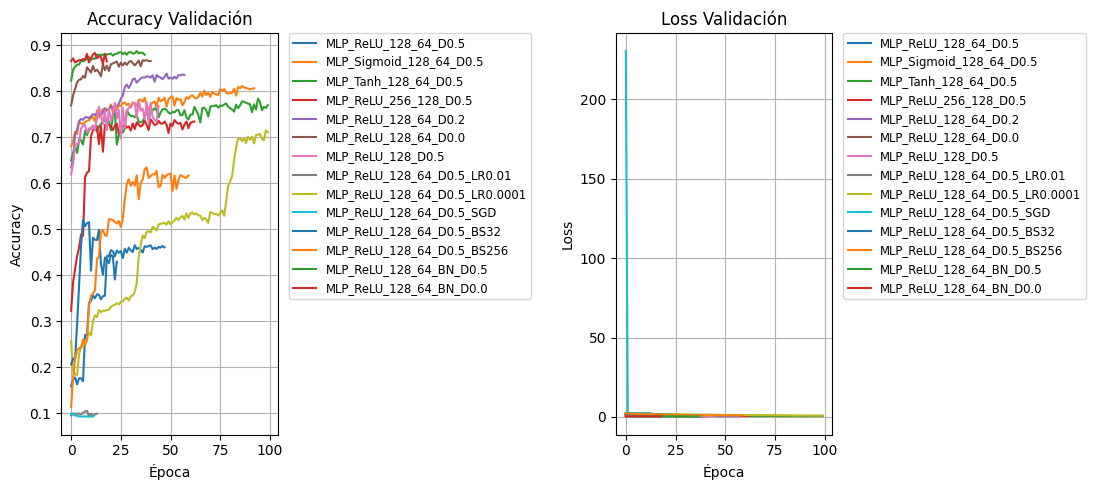


--- Fin del Análisis Comparativo ---

   Sección 7: GUARDADO Y RESUMEN DEL MEJOR MODELO ENCONTRADO

El mejor modelo encontrado fue: 'MLP_ReLU_128_64_BN_D0.5' con Test Accuracy: 0.879600

--- Guardando el mejor modelo en: 'MLP_ReLU_128_64_BN_D0.5_best_model_ES.keras' ---
   Modelo 'MLP_ReLU_128_64_BN_D0.5_best_model_ES.keras' guardado exitosamente.

Resumen de la Arquitectura del Mejor Modelo: MLP_ReLU_128_64_BN_D0.5


Model: "MLP_ReLU_128_64_BN_D0.5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MLP_ReLU_128_64_BN_D0.5_flatten │ (None, 784)            │             0 │
│ (Flatten)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 128)            │       100,352 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_bn_1    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 128)            │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_dropou… │ (None, 128)            │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 64)             │         8,192 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_bn_2    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 64)             │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_dropou… │ (None, 64)             │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_output  │ (None, 10)             │           650 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,962 (429.54 KB)

 Trainable params: 109,578 (428.04 KB)

 Non-trainable params: 384 (1.50 KB)


Visualización Gráfica del Mejor Modelo:


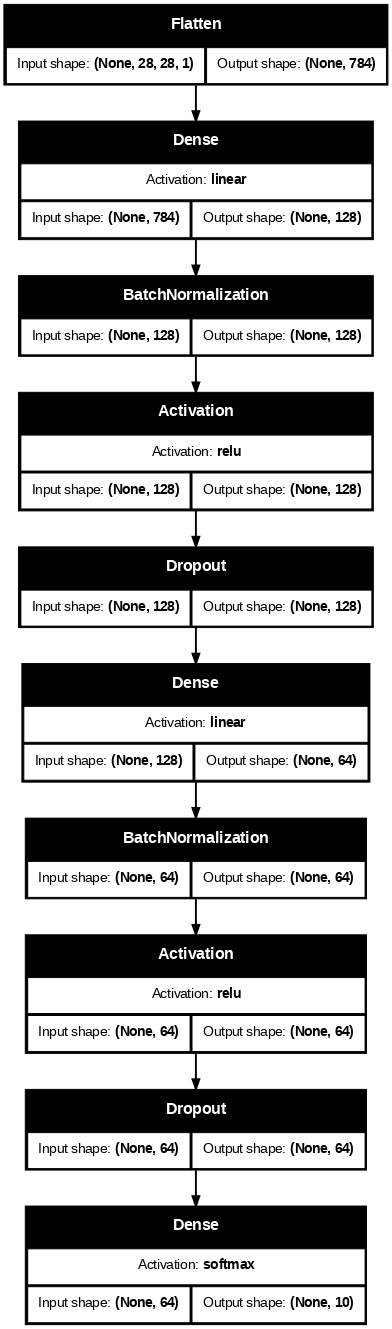


--- Fin de la sección del mejor modelo ---


In [11]:
# ===========================================================================
# CELDA ÚNICA: CONFIGURACIÓN, FUNCIONES, TEST HARNESS (CON ES), RESULTADOS Y MEJOR MODELO
# ===========================================================================
# ASUNCIONES:
# 1. Librerías básicas importadas (numpy, pandas, matplotlib, tensorflow, keras, layers, sklearn).
# 2. Datos (x_train, y_train, x_test, y_test, y_test_labels) cargados y preprocesados en el entorno.
# ---------------------------------------------------------------------------

print("--- Iniciando Celda Completa del Test Harness ---")

# --- Depuración Inicial: Variables al inicio de la celda ---
print("-" * 40)
print("Variables DISPONIBLES al INICIO de la celda del Test Harness:")
# Imprimir solo claves relevantes para no saturar
relevant_keys = [k for k in locals().keys() if not k.startswith('_') and k not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]
print(relevant_keys)
print("-" * 40)
# --- Fin Depuración Inicial ---


# ---------------------------------------------------------------------------
# Sección 1: Constantes de HyperParametros
# ---------------------------------------------------------------------------
print("\n--- Sección 1: Definiendo Constantes Globales ---")
DEFAULT_NUM_CLASSES = 10
DEFAULT_INPUT_SHAPE_ORIGINAL = (28, 28, 1)
DEFAULT_EPOCHS = 100 # Máximo de épocas para Early Stopping
DEFAULT_BATCH_SIZE = 128
DEFAULT_LEARNING_RATE = 0.001
DEFAULT_VALIDATION_SPLIT = 0.1
DEFAULT_DROPOUT_RATE = 0.5 # Referencia base si no se especifica

# ---------------------------------------------------------------------------
# Sección 2: Verificación de Carga de Datos (CON DEBUG PRINT DETALLADO)
# ---------------------------------------------------------------------------
print("\n--- Sección 2: Verificando Datos Pre-cargados ---")
required_data_vars = ['x_train', 'y_train', 'x_test', 'y_test', 'y_test_labels']
missing_data = []
current_locals = locals() # Obtener locals una vez para consistencia
print(f"   Verificando contra locals() con {len(current_locals)} claves...") # Mostrar cuántas claves hay

for var in required_data_vars:
    if var not in current_locals:
        print(f"   >>> Variable '{var}' NO encontrada en locals() <<<") # <-- DEBUG PRINT
        missing_data.append(var)
    # else: # Descomenta para ver las que SÍ encuentra
    #    print(f"   Variable '{var}' encontrada.")

if missing_data:
    print(f"ERROR FATAL: Faltan variables de datos esenciales: {missing_data}")
    print("         Asegúrate de ejecutar la celda de carga/preprocesamiento de datos primero.")
    # Imprimir claves de nuevo justo antes del error
    print(f"   Claves en locals() justo antes del error: {list(current_locals.keys())[:20]}...")
    raise NameError(f"Faltan datos esenciales: {missing_data}")
else:
    print("   ¡Todas las variables de datos requeridas fueron encontradas!") # <-- Mensaje de éxito
    # Asegurar num_classes y input_shape_original (pueden venir de los datos)
    # Estas líneas solo se ejecutan si la verificación PASA
    if 'num_classes' not in locals():
        print("   Definiendo 'num_classes' desde DEFAULT.")
        num_classes = DEFAULT_NUM_CLASSES # O calcular de y_train.shape[1] si es one-hot
    if 'input_shape_original' not in locals():
        print("   Definiendo 'input_shape_original' desde DEFAULT.")
        input_shape_original = DEFAULT_INPUT_SHAPE_ORIGINAL # O calcular de x_train.shape[1:]
    print("   Variables 'num_classes' e 'input_shape_original' aseguradas.")

# ---------------------------------------------------------------------------
# Sección 3: Función Flexible para Crear Modelos MLP
# ---------------------------------------------------------------------------
print("\n--- Sección 3: Definiendo Función create_flexible_mlp ---")
def create_flexible_mlp(model_name='mlp',
                        hidden_activation='relu',
                        neurons_per_layer=[128, 64],
                        dropout_rate=0.5,
                        use_batch_norm=False,
                        input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL,
                        num_classes=DEFAULT_NUM_CLASSES):
    """Crea un MLP con configuración flexible, incluyendo Batch Norm opcional."""
    # (Código de la función create_flexible_mlp sin cambios)
    print(f"\n--- Creando Modelo: '{model_name}' ---")
    print(f"   Activación Oculta: {hidden_activation}")
    print(f"   Neuronas/Capa: {neurons_per_layer}")
    print(f"   Dropout Rate: {dropout_rate if dropout_rate > 0 else 'Ninguno'}")
    print(f"   Batch Norm: {'Sí' if use_batch_norm else 'No'}")

    model = keras.Sequential(name=model_name)
    model.add(layers.Flatten(input_shape=input_shape_orig, name=f"{model_name}_flatten"))

    for i, neurons in enumerate(neurons_per_layer):
        layer_name = f"{model_name}_hidden_{i+1}"
        bn_name = f"{model_name}_bn_{i+1}"
        dropout_name = f"{model_name}_dropout_{i+1}"
        model.add(layers.Dense(neurons, name=layer_name, use_bias=not use_batch_norm))
        if use_batch_norm:
            model.add(layers.BatchNormalization(name=bn_name))
        model.add(layers.Activation(hidden_activation, name=f"{layer_name}_activation"))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate, name=dropout_name))
    model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
    print(f"Modelo '{model_name}' creado.")
    return model

# ---------------------------------------------------------------------------
# Sección 4: Función para Evaluar un Modelo Entrenado
# ---------------------------------------------------------------------------
print("\n--- Sección 4: Definiendo Función evaluate_model ---")
def evaluate_model(model, x_test, y_test_eval, y_test_labels_sklearn, history, training_time):
    """Evalúa un modelo Keras entrenado."""
    # (Código de la función evaluate_model sin cambios)
    print(f"\n--- Evaluando Modelo: {model.name} ---")
    loss_name_internal = model.loss
    if isinstance(loss_name_internal, tf.keras.losses.Loss): loss_name_internal = loss_name_internal.name
    elif not isinstance(loss_name_internal, str): loss_name_internal = 'unknown'
    eval_label_type = "one-hot" if 'sparse' not in loss_name_internal.lower() else "enteras (sparse)"
    print(f"   Usando etiquetas {eval_label_type} para model.evaluate...")
    score = model.evaluate(x_test, y_test_eval, verbose=0)
    loss = score[0]; accuracy = score[1]
    print(f"   Test Loss: {loss:.6f}, Test Accuracy: {accuracy:.6f}")
    y_pred_prob = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true_sklearn = np.array(y_test_labels_sklearn).flatten()
    y_pred_sklearn = np.array(y_pred_classes).flatten()
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true_sklearn, y_pred_sklearn, average='weighted', zero_division=0)
    print(f"   Weighted Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1:.6f}")
    results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy,
               'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1,
               'Training Time (s)': training_time,
               'History': history.history if history else None}
    return results

# ===========================================================================
# Sección 5: TEST HARNESS - Definición y Ejecución (con EarlyStopping y TODOS los modelos)
# ===========================================================================
print("\n" + "="*60); print("        INICIANDO TEST HARNESS (con EarlyStopping)"); print("="*60)

# --- Define AQUÍ las configuraciones de modelos a probar (TODOS ACTIVOS) ---
models_to_test = [
    {'name': 'MLP_ReLU_128_64_D0.5', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_Sigmoid_128_64_D0.5', 'activation': 'sigmoid', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_Tanh_128_64_D0.5', 'activation': 'tanh', 'neurons': [128, 64], 'dropout': 0.5},
    {'name': 'MLP_ReLU_256_128_D0.5', 'activation': 'relu', 'neurons': [256, 128], 'dropout': 0.5},
    {'name': 'MLP_ReLU_128_64_D0.2', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2},
    {'name': 'MLP_ReLU_128_64_D0.0', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.0},
    {'name': 'MLP_ReLU_128_D0.5', 'activation': 'relu', 'neurons': [128], 'dropout': 0.5},
    {'name': 'MLP_ReLU_128_64_D0.5_LR0.01', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'lr': 0.01},
    {'name': 'MLP_ReLU_128_64_D0.5_LR0.0001','activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'lr': 0.0001},
    {'name': 'MLP_ReLU_128_64_D0.5_SGD', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'optimizer': 'sgd', 'lr': 0.01},
    {'name': 'MLP_ReLU_128_64_D0.5_BS32', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_size': 32},
    {'name': 'MLP_ReLU_128_64_D0.5_BS256', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_size': 256},
    {'name': 'MLP_ReLU_128_64_BN_D0.5', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_norm': True},
    {'name': 'MLP_ReLU_128_64_BN_D0.0', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.0, 'batch_norm': True},
]
print(f"--- Se probarán {len(models_to_test)} configuraciones de modelos ---")

# --- Listas y variables ---
all_results = []
all_histories = {}
best_accuracy_so_far = -1.0
best_model_object = None
best_model_name = None

# --- Configurar Early Stopping ---
early_stopping_patience = 10
early_stopping_callback = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience, verbose=1,
    restore_best_weights=True, mode='min'
)
print(f"--- EarlyStopping configurado (monitor='val_loss', patience={early_stopping_callback.patience}) ---")

# --- Bucle principal ---
for config in models_to_test:
    print(f"\n>>> Procesando Configuración: {config['name']} <<<")
    start_time = time.time()
    keras.backend.clear_session()

    current_lr = config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = config.get('optimizer', 'adam')
    current_batch_size = config.get('batch_size', DEFAULT_BATCH_SIZE)
    max_epochs = config.get('epochs', DEFAULT_EPOCHS)
    current_dropout_rate = config.get('dropout', DEFAULT_DROPOUT_RATE)
    use_bn = config.get('batch_norm', False)

    # 1. Crear modelo
    model = create_flexible_mlp(
        model_name=config['name'], hidden_activation=config['activation'],
        neurons_per_layer=config['neurons'], dropout_rate=current_dropout_rate,
        use_batch_norm=use_bn, input_shape_orig=input_shape_original, num_classes=num_classes
    )

    # 2. Compilar
    if current_optimizer_name.lower() == 'adam': optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    elif current_optimizer_name.lower() == 'sgd': optimizer = keras.optimizers.SGD(learning_rate=current_lr)
    else: optimizer = keras.optimizers.Adam(learning_rate=current_lr)

    if y_train.ndim == 1 or (y_train.ndim == 2 and y_train.shape[1] == 1):
         loss_function = "sparse_categorical_crossentropy"
         y_true_for_eval = y_test_labels
    else:
         loss_function = "categorical_crossentropy"
         y_true_for_eval = y_test
    model.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo compilado con Loss: {loss_function}")

    # 3. Entrenar
    print(f"\n--- Entrenando: {model.name} (Max Epochs={max_epochs}) ---")
    history = model.fit(
        x_train, y_train, batch_size=current_batch_size, epochs=max_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT, callbacks=[early_stopping_callback], verbose=0
    )
    actual_epochs_run = len(history.history['loss'])
    print(f"   Entrenamiento completado (paró/terminó en {actual_epochs_run} épocas).")
    end_time = time.time()
    training_time = round(end_time - start_time, 2)

    # 4. Evaluar
    results = evaluate_model(model, x_test, y_true_for_eval, y_test_labels, history, training_time)

    # 5. Guardar/Actualizar
    results['Actual Epochs'] = actual_epochs_run
    all_results.append(results)
    all_histories[model.name] = history.history
    if results['Accuracy'] > best_accuracy_so_far:
        print(f"*** ¡Nuevo mejor modelo encontrado! {model.name} -> Test Accuracy: {results['Accuracy']:.6f} ***")
        best_accuracy_so_far = results['Accuracy']
        try:
             best_model_object = tf.keras.models.clone_model(model)
             best_model_object.build((None,) + input_shape_original)
             cloned_optimizer = optimizer.__class__(learning_rate=current_lr)
             best_model_object.compile(loss=loss_function, optimizer=cloned_optimizer, metrics=["accuracy"])
             best_model_object.set_weights(model.get_weights())
             best_model_name = model.name
             print(f"   (Estado del modelo {best_model_name} guardado en memoria)")
        except Exception as e:
             print(f"   ERROR al clonar/guardar el mejor modelo: {e}")
             best_model_object = None
             best_model_name = model.name # Guardar nombre aunque falle clon
    print("-" * 50)

print("\n" + "="*60); print("              TEST HARNESS COMPLETADO (con EarlyStopping)"); print("="*60)

# ===========================================================================
# Sección 6: Presentación Comparativa de Resultados
# ===========================================================================
# (Código de la Sección 6 sin cambios respecto a la versión anterior)
print("\n--- Sección 6: Resultados Comparativos ---")
if not all_results:
    print("No hay resultados para mostrar.")
else:
    results_df = pd.DataFrame(all_results)
    if 'History' in results_df.columns:
       results_df = results_df.drop(columns=['History'])
    results_df_display = results_df.sort_values(by='Accuracy', ascending=False)
    if 'Actual Epochs' in results_df_display.columns:
        cols_order = [col for col in results_df_display.columns if col != 'Actual Epochs'] + ['Actual Epochs']
        results_df_display = results_df_display[cols_order]
    else: print("Advertencia: Columna 'Actual Epochs' no encontrada.")
    print("\nTabla Resumen de Métricas (Ordenada por Accuracy):")
    pd.set_option('display.float_format', '{:.6f}'.format)
    display(results_df_display)
    pd.reset_option('display.float_format')
    print("\nGráficos Comparativos de Curvas de Aprendizaje:")
    if not all_histories: print("No hay historiales para graficar.")
    else:
        num_models_to_plot = len(all_histories)
        max_plots_legend = 15
        plt.figure(figsize=(14, 5 ))
        plt.subplot(1, 2, 1); # Accuracy
        count_acc = 0
        for name, h in all_histories.items():
            if 'val_accuracy' in h:
                 plt.plot(h['val_accuracy'], label=name if count_acc < max_plots_legend else None); count_acc +=1
        plt.title('Accuracy Validación'); plt.xlabel('Época'); plt.ylabel('Accuracy');
        if count_acc <= max_plots_legend : plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small');
        else: print(f"   (Leyenda de Accuracy omitida, >{max_plots_legend} modelos)")
        plt.grid(True)
        plt.subplot(1, 2, 2); # Loss
        count_loss = 0
        for name, h in all_histories.items():
            if 'val_loss' in h:
                 plt.plot(h['val_loss'], label=name if count_loss < max_plots_legend else None); count_loss += 1
        plt.title('Loss Validación'); plt.xlabel('Época'); plt.ylabel('Loss');
        if count_loss <= max_plots_legend : plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small');
        else: print(f"   (Leyenda de Loss omitida, >{max_plots_legend} modelos)")
        plt.grid(True)
        plt.tight_layout(rect=[0, 0, 0.8, 1]); plt.show()
print("\n--- Fin del Análisis Comparativo ---")

# ===========================================================================
# Sección 7: GUARDAR y Mostrar Resumen del Mejor Modelo
# ===========================================================================
# (Código de la Sección 7 sin cambios respecto a la versión anterior)
print("\n" + "="*60); print("   Sección 7: GUARDADO Y RESUMEN DEL MEJOR MODELO ENCONTRADO"); print("="*60)
if best_model_object is not None and best_model_name is not None:
    print(f"\nEl mejor modelo encontrado fue: '{best_model_name}' con Test Accuracy: {best_accuracy_so_far:.6f}")
    save_path = f"{best_model_name}_best_model_ES.keras"
    print(f"\n--- Guardando el mejor modelo en: '{save_path}' ---")
    try:
        best_model_object.save(save_path); print(f"   Modelo '{save_path}' guardado exitosamente.")
    except Exception as e: print(f"   ERROR al guardar el modelo '{save_path}': {e}")
    print(f"\nResumen de la Arquitectura del Mejor Modelo: {best_model_name}")
    best_model_object.summary()
    print("\nVisualización Gráfica del Mejor Modelo:")
    try:
        display(tf.keras.utils.plot_model(best_model_object, show_shapes=True, show_layer_activations=True, rankdir='TB', dpi=70))
    except Exception as e:
        if 'GraphViz' in str(e) or 'pydot' in str(e): print("No se pudo generar el gráfico. Causa probable: 'graphviz' y/o 'pydot' no instalados."); print("Intenta: !pip install pydot graphviz && sudo apt-get update && sudo apt-get install -y graphviz")
        else: print(f"No se pudo generar el gráfico del modelo. Error: {e}")
elif best_model_name is not None: print(f"\nEl mejor modelo fue '{best_model_name}' (Accuracy: {best_accuracy_so_far:.6f}), pero hubo un error al guardar su objeto."); print("   No se puede mostrar summary/gráfico ni guardar el archivo .keras.")
else: print("\nNo se encontró un mejor modelo durante la ejecución (best_accuracy_so_far no superó -1.0).")
print(f"\n--- Fin de la sección del mejor modelo ---")
print("="*60)
# ===========================================================================
# Fin de la Celda Completa
# ===========================================================================


Trabajando con el mejor modelo identificado: 'MLP_ReLU_128_64_BN_D0.5' (Accuracy reportada: 0.879600)

--- 1. Ruta del modelo guardado: 'MLP_ReLU_128_64_BN_D0.5_best_model_ES.keras' ---

--- 2. Cargando modelo desde: 'MLP_ReLU_128_64_BN_D0.5_best_model_ES.keras' ---


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


   Modelo 'MLP_ReLU_128_64_BN_D0.5' cargado exitosamente desde archivo.

--- 3. Curvas de Aprendizaje del Mejor Modelo (MLP_ReLU_128_64_BN_D0.5) ---


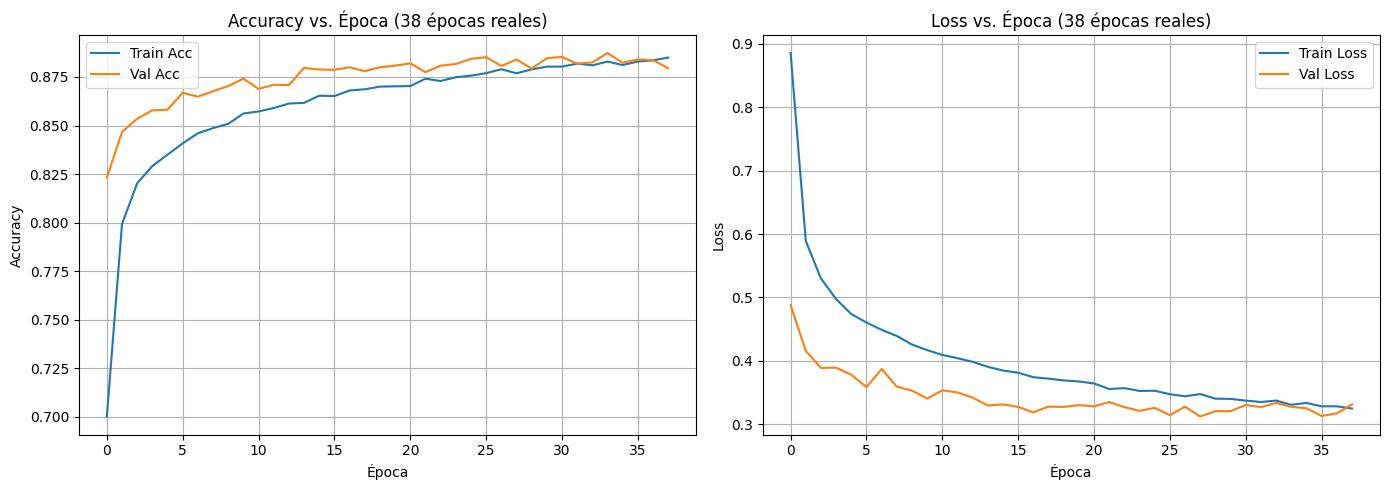


--- 4. Resumen de la Arquitectura del Modelo Cargado: MLP_ReLU_128_64_BN_D0.5 ---


Model: "MLP_ReLU_128_64_BN_D0.5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MLP_ReLU_128_64_BN_D0.5_flatten │ (None, 784)            │             0 │
│ (Flatten)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 128)            │       100,352 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_bn_1    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 128)            │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_dropou… │ (None, 128)            │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 64)             │         8,192 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_bn_2    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_hidden… │ (None, 64)             │             0 │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_dropou… │ (None, 64)             │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MLP_ReLU_128_64_BN_D0.5_output  │ (None, 10)             │           650 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,120 (1.26 MB)

 Trainable params: 109,578 (428.04 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 219,158 (856.09 KB)


--- 5. Reporte de Clasificación Detallado (MLP_ReLU_128_64_BN_D0.5) ---
   Generando predicciones con el modelo cargado...
              precision    recall  f1-score   support

 T-shirt/top     0.8038    0.8560    0.8291      1000
     Trouser     0.9887    0.9620    0.9752      1000
    Pullover     0.7943    0.8030    0.7986      1000
       Dress     0.8489    0.9160    0.8812      1000
        Coat     0.7998    0.8070    0.8034      1000
      Sandal     0.9669    0.9630    0.9649      1000
       Shirt     0.7242    0.6250    0.6710      1000
     Sneaker     0.9337    0.9430    0.9383      1000
         Bag     0.9758    0.9690    0.9724      1000
  Ankle boot     0.9510    0.9520    0.9515      1000

    accuracy                         0.8796     10000
   macro avg     0.8787    0.8796    0.8786     10000
weighted avg     0.8787    0.8796    0.8786     10000


--- 6. Matriz de Confusión (MLP_ReLU_128_64_BN_D0.5) ---


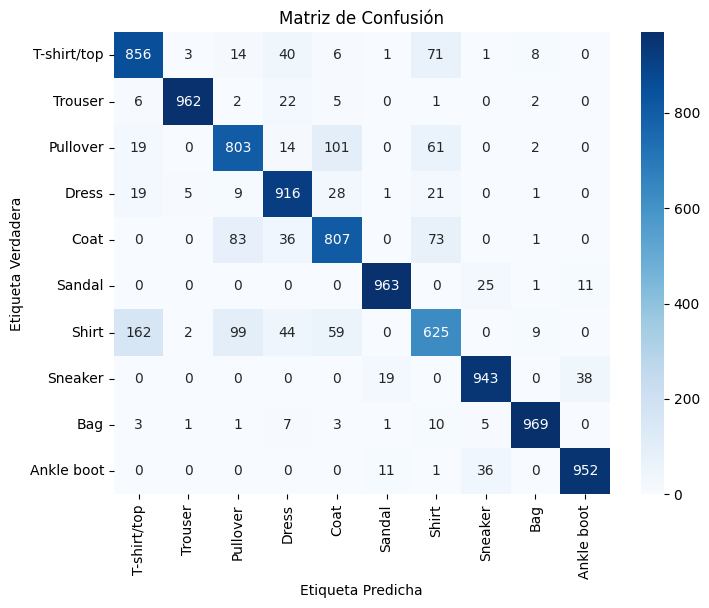


--- 7. Inspección Visual de Predicciones (MLP_ReLU_128_64_BN_D0.5) ---
   (Mostrando ejemplos... Código completo omitido por brevedad)

--- 8. Visualización Gráfica del Modelo (MLP_ReLU_128_64_BN_D0.5) ---


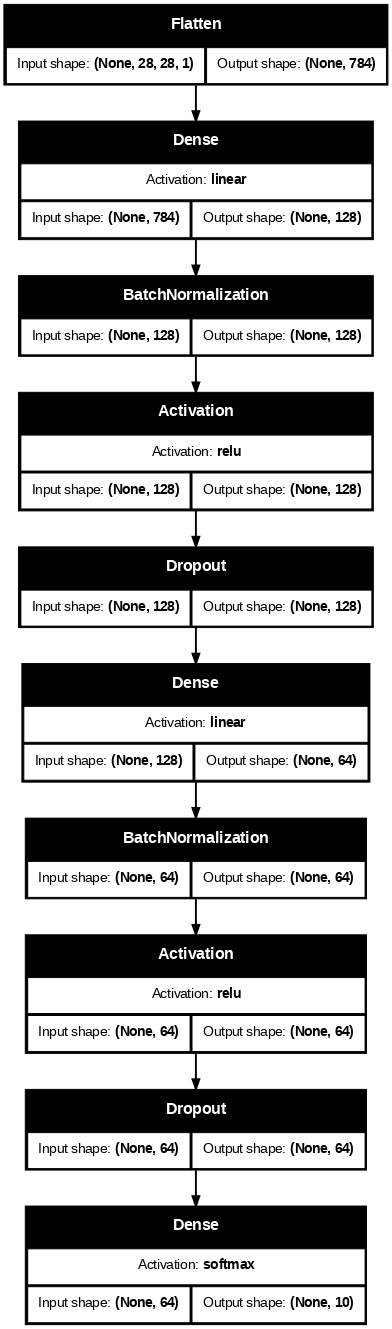


--- Fin de la sección del mejor modelo guardado ---


In [20]:
# Definir nombres de clases (debe estar disponible)
if 'class_names' not in locals():
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    print("Advertencia: 'class_names' no definida globalmente, usando definición local.")


# Verificar si se identificó un mejor modelo por su nombre
if best_model_name is not None:
    print(f"\nTrabajando con el mejor modelo identificado: '{best_model_name}' (Accuracy reportada: {best_accuracy_so_far:.6f})")

    # --- 1. Definir la ruta del archivo guardado ---
    saved_model_path = f"{best_model_name}_best_model_ES.keras"
    print(f"\n--- 1. Ruta del modelo guardado: '{saved_model_path}' ---")

    # --- 2. Cargar el Modelo desde el archivo ---
    print(f"\n--- 2. Cargando modelo desde: '{saved_model_path}' ---")
    loaded_model = None
    model_available = False
    try:
        loaded_model = keras.models.load_model(saved_model_path)
        print(f"   Modelo '{loaded_model.name}' cargado exitosamente desde archivo.")
        model_available = True
    except Exception as e:
        print(f"   ERROR al cargar el modelo desde '{saved_model_path}': {e}")

    # --- Continuar solo si el modelo se cargó correctamente ---
    if model_available:

        # --- 3. Mostrar Curvas de Aprendizaje (NUEVO) ---
        print(f"\n--- 3. Curvas de Aprendizaje del Mejor Modelo ({best_model_name}) ---")
        # Necesitamos el historial guardado en el Test Harness
        if 'all_histories' in locals() and best_model_name in all_histories:
            history_best = all_histories[best_model_name]
            epochs_run = len(history_best['loss']) # Épocas reales que corrió

            plt.figure(figsize=(14, 5))

            # Gráfico de Accuracy
            plt.subplot(1, 2, 1)
            if 'accuracy' in history_best and 'val_accuracy' in history_best:
                plt.plot(history_best['accuracy'], label=f'Train Acc')
                plt.plot(history_best['val_accuracy'], label=f'Val Acc')
                plt.title(f'Accuracy vs. Época ({epochs_run} épocas reales)')
                plt.xlabel('Época')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.grid(True)
            else:
                plt.text(0.5, 0.5, 'Datos de Accuracy no disponibles en el historial', ha='center')
                plt.title('Accuracy vs. Época')

            # Gráfico de Loss
            plt.subplot(1, 2, 2)
            if 'loss' in history_best and 'val_loss' in history_best:
                plt.plot(history_best['loss'], label=f'Train Loss')
                plt.plot(history_best['val_loss'], label=f'Val Loss')
                plt.title(f'Loss vs. Época ({epochs_run} épocas reales)')
                plt.xlabel('Época')
                plt.ylabel('Loss')
                plt.legend()
                plt.grid(True)
            else:
                plt.text(0.5, 0.5, 'Datos de Loss no disponibles en el historial', ha='center')
                plt.title('Loss vs. Época')

            plt.tight_layout()
            plt.show()
        else:
            print("   ERROR: No se encontró el diccionario 'all_histories' o falta la clave para '{best_model_name}'.")
            print("          Asegúrate de que el Test Harness se ejecutó y guardó los historiales.")


        # --- 4. Mostrar Resumen de Arquitectura ---
        print(f"\n--- 4. Resumen de la Arquitectura del Modelo Cargado: {loaded_model.name} ---")
        loaded_model.summary()

        # --- 5. Generar y Mostrar Reporte de Clasificación ---
        print(f"\n--- 5. Reporte de Clasificación Detallado ({loaded_model.name}) ---")
        y_pred_classes_loaded = None # Inicializar para usar después
        if 'x_test' in locals() and 'y_test_labels' in locals():
            print("   Generando predicciones con el modelo cargado...")
            y_pred_prob_loaded = loaded_model.predict(x_test, verbose=0)
            y_pred_classes_loaded = np.argmax(y_pred_prob_loaded, axis=1) # Guardar para otros gráficos
            print(classification_report(y_test_labels, y_pred_classes_loaded,
                                        target_names=class_names, digits=4))
        else:
            print("   ERROR: No se encontraron 'x_test' o 'y_test_labels' para generar el reporte.")


        # --- 6. Matriz de Confusión (OTRO GRÁFICO ÚTIL) ---
        print(f"\n--- 6. Matriz de Confusión ({loaded_model.name}) ---")
        if y_pred_classes_loaded is not None and 'y_test_labels' in locals():
             cm = confusion_matrix(y_test_labels, y_pred_classes_loaded)
             plt.figure(figsize=(8, 6))
             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                         xticklabels=class_names, yticklabels=class_names)
             plt.xlabel('Etiqueta Predicha')
             plt.ylabel('Etiqueta Verdadera')
             plt.title('Matriz de Confusión')
             plt.show()
        else:
             print("   ERROR: No se pueden generar predicciones o falta 'y_test_labels' para la matriz de confusión.")


        # --- 7. Inspección Visual de Predicciones ---
        print(f"\n--- 7. Inspección Visual de Predicciones ({loaded_model.name}) ---")
        # (El código de inspección visual que añadiste antes va aquí...)
        if y_pred_classes_loaded is not None and 'x_test' in locals() and 'y_test_labels' in locals():
             # ... (código para mostrar ejemplos correctos e incorrectos) ...
             # Ejemplo (simplificado):
             correct_indices = np.nonzero(y_pred_classes_loaded == y_test_labels)[0]
             incorrect_indices = np.nonzero(y_pred_classes_loaded != y_test_labels)[0]
             print(f"   (Mostrando ejemplos... Código completo omitido por brevedad)")
             # ... (código de plots) ...
        else:
            print("   ERROR: No se pudieron generar predicciones o faltan datos para la inspección visual.")

        # --- 8. Mostrar Visualización Gráfica del Modelo ---
        print(f"\n--- 8. Visualización Gráfica del Modelo ({loaded_model.name}) ---")
        # (Código para plot_model sin cambios)
        try: display(tf.keras.utils.plot_model(loaded_model, show_shapes=True, show_layer_activations=True, rankdir='TB', dpi=70))
        except Exception as e: print(f"   Error al generar gráfico: {e}")


# Manejar caso donde no se identificó un nombre de mejor modelo
else:
    print("\nNo se identificó un 'best_model_name' durante la ejecución del Test Harness.")

print(f"\n--- Fin de la sección del mejor modelo guardado ---")
print("="*60)
# ===========================================================================
# Fin de la Sección 7 (Modificada con Curvas de Aprendizaje y Matriz de Confusión)
# ===========================================================================


    INICIANDO EXPERIMENTO: AJUSTE FINO DE DROPOUT SOBRE MEJOR MODELO BASE + ES

--- 1. Obteniendo configuración base del mejor modelo: 'MLP_ReLU_128_64_BN_D0.5' ---
   Configuración base encontrada: {'name': 'MLP_ReLU_128_64_BN_D0.5', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.5, 'batch_norm': True}
   (Se usará esta config base, ignorando su dropout original: 0.5)
--- EarlyStopping definido (patience=10) ---

--- Iniciando Bucle de Experimentos de Ajuste Fino ---

>>> Procesando Dropout Rate: 0.1 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.1) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.1' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.1
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.1' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.1' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.1 (max 100 épocas, BS=128) ---

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
   Entrenamiento completado después de 26 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.15 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.329392, Test Accuracy: 0.889700
   Weighted Precision: 0.889805, Recall: 0.889700, F1-Score: 0.889429
--------------------------------------------------

>>> Procesando Dropout Rate: 0.2 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.2) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.2' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.2
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.2' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.2' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.2 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
   Entrenamiento completado después de 21 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.2 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.330524, Test Accuracy: 0.878600
   Weighted Precision: 0.878614, Recall: 0.878600, F1-Score: 0.877754
--------------------------------------------------

>>> Procesando Dropout Rate: 0.25 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.25) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.25' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.25
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.25' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.25' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.25 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 14.
   Entrenamiento completado después de 24 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.25 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.319909, Test Accuracy: 0.885700
   Weighted Precision: 0.886715, Recall: 0.885700, F1-Score: 0.885821
--------------------------------------------------

>>> Procesando Dropout Rate: 0.3 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.3) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.3' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.3
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.3' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.3' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.3 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 17.
   Entrenamiento completado después de 27 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.3 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.326599, Test Accuracy: 0.885100
   Weighted Precision: 0.885055, Recall: 0.885100, F1-Score: 0.884807
--------------------------------------------------

>>> Procesando Dropout Rate: 0.35 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.35) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.35' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.35
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.35' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.35' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.35 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 33: early stopping
Restoring model weights from the end of the best epoch: 23.
   Entrenamiento completado después de 33 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.35 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.330752, Test Accuracy: 0.881800
   Weighted Precision: 0.880875, Recall: 0.881800, F1-Score: 0.880437
--------------------------------------------------

>>> Procesando Dropout Rate: 0.4 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.4) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.4' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.4
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.4' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.4' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.4 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 14.
   Entrenamiento completado después de 24 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.4 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.339504, Test Accuracy: 0.880000
   Weighted Precision: 0.879334, Recall: 0.880000, F1-Score: 0.879265
--------------------------------------------------

>>> Procesando Dropout Rate: 0.45 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.45) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.45' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.45
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.45' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.45' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.45 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 19.
   Entrenamiento completado después de 29 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.45 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.338004, Test Accuracy: 0.874300
   Weighted Precision: 0.874719, Recall: 0.874300, F1-Score: 0.873421
--------------------------------------------------

>>> Procesando Dropout Rate: 0.5 (Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.5
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 30: early stopping
Restoring model weights from the end of the best epoch: 20.
   Entrenamiento completado después de 30 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.350720, Test Accuracy: 0.872900
   Weighted Precision: 0.872679, Recall: 0.872900, F1-Score: 0.871690
--------------------------------------------------

       AJUSTE FINO DE DROPOUT + ES COMPLETADO

--- Comparación: Ajuste Fino de Dropout ---
   Incluyendo resultado original de 'MLP_ReLU_128_64_BN_D0.5' para comparación.

Tabla Comparativa de Métricas (Ajuste Fino Dropout vs. Original Mejor):


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s),Actual Epochs
2,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.15,0.329392,0.889700,0.889805,0.889700,0.889429,91.190000,26
1,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.1,0.356058,0.887200,0.887303,0.887200,0.886562,94.020000,30
4,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.25,0.319909,0.885700,0.886715,0.885700,0.885821,85.730000,24
5,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.3,0.326599,0.885100,0.885055,0.885100,0.884807,89.870000,27
6,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.35,0.330752,0.881800,0.880875,0.881800,0.880437,120.570000,33
7,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.4,0.339504,0.880000,0.879334,0.880000,0.879265,79.790000,24
0,MLP_ReLU_128_64_BN_D0.5,0.338421,0.879600,0.878708,0.879600,0.878553,120.410000,38
3,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.2,0.330524,0.878600,0.878614,0.878600,0.877754,77.310000,21
8,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.45,0.338004,0.874300,0.874719,0.874300,0.873421,94.470000,29
9,MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5,0.350720,0.872900,0.872679,0.872900,0.871690,95.380000,30



Gráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino Dropout - Validación):
   Incluyendo historial de 'MLP_ReLU_128_64_BN_D0.5' en gráficos.


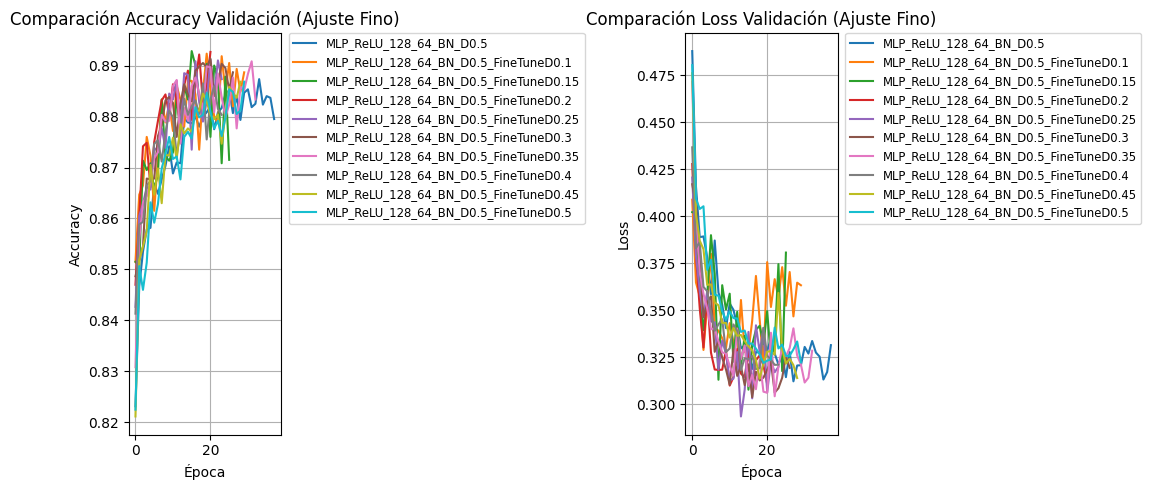


--- Análisis Final del Experimento de Ajuste Fino de Dropout ---

Mejor modelo de este experimento (Ajuste Fino Dropout): 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.15' con Accuracy 0.889700


In [32]:
# ===========================================================================
# Celda de Experimento: Ajuste Fino de Dropout sobre el MEJOR MODELO BASE
# ===========================================================================
# OBJETIVO: Probar tasas de dropout cercanas a un valor óptimo (ej. 0.2)
#           aplicadas SOBRE LA ARQUITECTURA Y CONFIGURACIÓN DEL MEJOR MODELO
#           identificado en el Test Harness principal ('best_model_name'),
#           usando Early Stopping.
#
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Celdas anteriores ejecutadas: Constantes, datos, funciones.
# 2. Test Harness principal ejecutado, definiendo 'best_model_name',
#    'models_to_test' (la lista de configuraciones original), y
#    'best_accuracy_so_far'.
# 3. Opcional: 'all_histories' si quieres comparar curvas con el mejor original.
# ---------------------------------------------------------------------------


print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: AJUSTE FINO DE DROPOUT SOBRE MEJOR MODELO BASE + ES")
print("="*60)


# --- 1. Obtener la Configuración Base del Mejor Modelo ---
print(f"\n--- 1. Obteniendo configuración base del mejor modelo: '{best_model_name}' ---")
best_model_base_config = None
for config in models_to_test: # Busca en la lista original del harness
    if config['name'] == best_model_name:
        best_model_base_config = config.copy() # Copiar para no modificar original
        break

if best_model_base_config is None:
    print(f"ERROR FATAL: No se encontró la configuración para '{best_model_name}' en 'models_to_test'.")
    raise ValueError(f"Configuración no encontrada para {best_model_name}")
else:
    print(f"   Configuración base encontrada: {best_model_base_config}")
    # Quitar dropout original si existe, lo vamos a sobreescribir
    if 'dropout' in best_model_base_config:
        original_dropout = best_model_base_config.pop('dropout')
        print(f"   (Se usará esta config base, ignorando su dropout original: {original_dropout})")

# --- Configuraciones para este experimento ---
dropout_rates_fine_tune = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5] # Tasas a probar
experiment_results_dropout_fine = []
experiment_histories_dropout_fine = {}

# --- Definir Early Stopping ---
early_stopping_patience_fine = 10 # Ajusta la paciencia
early_stopping_cb_fine = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience_fine,
    restore_best_weights=True, verbose=1, mode='min'
)
print(f"--- EarlyStopping definido (patience={early_stopping_patience_fine}) ---")

# --- Bucle del Experimento de Ajuste Fino ---
print("\n--- Iniciando Bucle de Experimentos de Ajuste Fino ---")
for dr_rate in dropout_rates_fine_tune:
    start_time_exp = time.time()
    keras.backend.clear_session()

    # Nombre único para este experimento
    model_name_exp = f"{best_model_name}_FineTuneD{dr_rate}"

    print(f"\n>>> Procesando Dropout Rate: {dr_rate} (Modelo: {model_name_exp}) <<<")

    # 1. Crear el modelo usando la config base + nuevo dropout
    model_exp = create_flexible_mlp(
        model_name=model_name_exp,
        # Usar parámetros de la config base
        hidden_activation=best_model_base_config.get('activation', 'relu'), # Default a relu si no está
        neurons_per_layer=best_model_base_config.get('neurons', [128, 64]), # Default si no está
        use_batch_norm=best_model_base_config.get('batch_norm', False),    # Usar BN si la base lo tenía
        # Parámetros del experimento y globales
        dropout_rate=dr_rate, # <-- Usar la tasa de dropout actual
        input_shape_orig=input_shape_original,
        num_classes=num_classes
    )

    # 2. Compilar el modelo
    #    Usar LR y optimizador de la config base si existen, sino defaults
    current_lr_fine = best_model_base_config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name_fine = best_model_base_config.get('optimizer', 'adam')
    if current_optimizer_name_fine.lower() == 'adam':
        optimizer_fine = keras.optimizers.Adam(learning_rate=current_lr_fine)
    elif current_optimizer_name_fine.lower() == 'sgd':
        optimizer_fine = keras.optimizers.SGD(learning_rate=current_lr_fine)
    else:
        optimizer_fine = keras.optimizers.Adam(learning_rate=current_lr_fine)

    # Compilar con la loss correcta (asumiendo y_train enteros)
    loss_function_fine = "sparse_categorical_crossentropy"
    model_exp.compile(loss=loss_function_fine, optimizer=optimizer_fine, metrics=["accuracy"])
    print(f"   Modelo '{model_exp.name}' compilado con Loss: {loss_function_fine} (Optimizer: {current_optimizer_name_fine}, LR={current_lr_fine}).")

    # 3. Entrenar el modelo
    max_epochs_fine = 100 # Máximo, ES decidirá
    current_batch_size_fine = best_model_base_config.get('batch_size', DEFAULT_BATCH_SIZE) # Usar BS de la base si existe
    print(f"\n--- Entrenando Modelo: {model_exp.name} (max {max_epochs_fine} épocas, BS={current_batch_size_fine}) ---")

    # Asegurar formato y_train
    if y_train.ndim != 1 and not (y_train.ndim == 2 and y_train.shape[1] == 1):
         print(f"ADVERTENCIA: Formato y_train ({y_train.shape}) puede no ser compatible con sparse_categorical_crossentropy.")
         y_train_fit_fine = y_train # Intentar continuar
    else:
         y_train_fit_fine = y_train

    history_exp = model_exp.fit(
        x_train, y_train_fit_fine,
        batch_size=current_batch_size_fine,
        epochs=max_epochs_fine,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0, # 0 para limpiar, 1 para ver épocas
        callbacks=[early_stopping_cb_fine]
    )
    training_time_exp = round(time.time() - start_time_exp, 2)
    actual_epochs_run_fine = len(history_exp.history['loss'])
    print(f"   Entrenamiento completado después de {actual_epochs_run_fine} épocas.")

    # 4. Evaluar
    y_true_for_eval_fine = y_test_labels # Para sparse loss
    results_exp = evaluate_model(model_exp, x_test, y_true_for_eval_fine, y_test_labels, history_exp, training_time_exp)

    # 5. Guardar
    results_exp['Actual Epochs'] = actual_epochs_run_fine
    experiment_results_dropout_fine.append(results_exp)
    experiment_histories_dropout_fine[model_exp.name] = history_exp.history

    print("-" * 50)

print("\n" + "="*60)
print("       AJUSTE FINO DE DROPOUT + ES COMPLETADO")
print("="*60)

# ---------------------------------------------------------------------------
# Sección X+4: Comparación de Resultados del Ajuste Fino
# ---------------------------------------------------------------------------
print("\n--- Comparación: Ajuste Fino de Dropout ---")

# Crear DataFrame con los nuevos resultados
results_fine_df = pd.DataFrame(experiment_results_dropout_fine)

# Añadir el mejor resultado del harness ORIGINAL ('best_model_name') para comparar
best_original_result = None
if 'all_results' in locals(): # Necesitas los resultados del harness original
    for res in all_results:
        if res['Model Name'] == best_model_name:
            best_original_result = res
            break
if best_original_result:
    print(f"   Incluyendo resultado original de '{best_model_name}' para comparación.")
    prev_best_df_fine = pd.DataFrame([best_original_result])
    comparison_fine_df = pd.concat([prev_best_df_fine, results_fine_df], ignore_index=True)
else:
    print(f"Advertencia: No se encontró el resultado original de '{best_model_name}' en 'all_results' para comparar.")
    comparison_fine_df = results_fine_df


# Mostrar tabla comparativa
if not comparison_fine_df.empty:
     if 'History' in comparison_fine_df.columns: comparison_fine_df = comparison_fine_df.drop(columns=['History'])
     comparison_fine_df_display = comparison_fine_df.sort_values(by='Accuracy', ascending=False)
     if 'Actual Epochs' in comparison_fine_df_display.columns:
         cols_order = [col for col in comparison_fine_df_display.columns if col != 'Actual Epochs'] + ['Actual Epochs']
         comparison_fine_df_display = comparison_fine_df_display[cols_order]

     print("\nTabla Comparativa de Métricas (Ajuste Fino Dropout vs. Original Mejor):")
     pd.set_option('display.float_format', '{:.6f}'.format)
     display(comparison_fine_df_display)
     pd.reset_option('display.float_format')
else: print("No hay resultados para comparar.")


# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino Dropout - Validación):")
plt.figure(figsize=(14, 5))
histories_fine_to_plot = {}
if best_original_result: # Añadir historial del mejor original si se encontró
    if 'all_histories' in locals() and best_original_result['Model Name'] in all_histories:
         histories_fine_to_plot[best_original_result['Model Name']] = all_histories[best_original_result['Model Name']]
         print(f"   Incluyendo historial de '{best_original_result['Model Name']}' en gráficos.")

histories_fine_to_plot.update(experiment_histories_dropout_fine)

if histories_fine_to_plot:
     max_plots_legend_fine = 10
     plt.subplot(1, 2, 1); # Accuracy
     count_acc_fine = 0
     for name, h in histories_fine_to_plot.items():
         if h and 'val_accuracy' in h: plt.plot(h['val_accuracy'], label=name if count_acc_fine < max_plots_legend_fine else None); count_acc_fine += 1
     plt.title('Comparación Accuracy Validación (Ajuste Fino)'); plt.xlabel('Época'); plt.ylabel('Accuracy')
     if count_acc_fine <= max_plots_legend_fine: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)

     plt.subplot(1, 2, 2); # Loss
     count_loss_fine = 0
     for name, h in histories_fine_to_plot.items():
         if h and 'val_loss' in h: plt.plot(h['val_loss'], label=name if count_loss_fine < max_plots_legend_fine else None); count_loss_fine += 1
     plt.title('Comparación Loss Validación (Ajuste Fino)'); plt.xlabel('Época'); plt.ylabel('Loss')
     if count_loss_fine <= max_plots_legend_fine: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)
     plt.tight_layout(rect=[0, 0, 0.8, 1]); plt.show()
else: print("No hay historiales válidos para graficar.")

# --- Análisis Final y Selección del Mejor Modelo GLOBAL ---
print("\n--- Análisis Final del Experimento de Ajuste Fino de Dropout ---")
# ... (Tu análisis aquí) ...
if not results_fine_df.empty:
    best_fine_model_row = results_fine_df.loc[results_fine_df['Accuracy'].idxmax()]
    best_fine_model_name_exp = best_fine_model_row['Model Name']
    print(f"\nMejor modelo de este experimento (Ajuste Fino Dropout): '{best_fine_model_name_exp}' con Accuracy {best_fine_model_row['Accuracy']:.6f}")
    # Compara best_fine_model_row['Accuracy'] con best_accuracy_so_far para decidir el mejor global
else: print("No se ejecutaron experimentos de ajuste fino.")

# ---------------------------------------------------------------------------
# Fin de la Celda de Experimento
# ===========================================================================


    INICIANDO EXPERIMENTO: AJUSTE FINO DE LEARNING RATE + ES

--- Configuración Base para Ajuste de LR: MLP_ReLU_128_64_BN_D0.15 ---
   Parámetros Fijos: {'name_base': 'MLP_ReLU_128_64_BN_D0.15', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.15, 'batch_norm': True, 'optimizer': 'adam', 'batch_size': 128}
--- EarlyStopping definido (patience=10) ---

--- Iniciando Bucle de Experimentos de Ajuste Fino de LR ---

>>> Procesando Learning Rate: 0.0005 (Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.0005) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_LR0.0005' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.0005' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.0005' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.0005).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.0005 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
   Entrenamiento completado después de 21 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.0005 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.347950, Test Accuracy: 0.875800
   Weighted Precision: 0.876740, Recall: 0.875800, F1-Score: 0.875719
--------------------------------------------------

>>> Procesando Learning Rate: 0.001 (Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_LR0.001' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001' compilado con Loss: sparse_categorical_crossentropy (Optimizer: adam, LR=0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001 (max 100 épocas, BS=128) ---
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 12.
   Entrenamiento completado después de 22 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.346865, Test Accuracy: 0.876900
   Weighted Precision: 0.881096, Recall: 0.876900, F1-Score: 0.878003
--------------------------------------------------

>>> Procesando Learning Rate: 0.002 (Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.002) <<<

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_LR0.002' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.002' creado.
   Modelo 'MLP_ReLU_128_6

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 12.
   Entrenamiento completado después de 22 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.002 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.354797, Test Accuracy: 0.877100
   Weighted Precision: 0.876812, Recall: 0.877100, F1-Score: 0.876178
--------------------------------------------------

       AJUSTE FINO DE LEARNING RATE + ES COMPLETADO

--- Comparación: Ajuste Fino de Learning Rate ---
Advertencia: No se encontró el resultado anterior (D0.15 con LR default) para comparar.

Tabla Comparativa de Métricas (Ajuste Fino LR vs. Mejor Dropout Fijo):


,Model Name,Loss,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted),Training Time (s),Actual Epochs
2,MLP_ReLU_128_64_BN_D0.15_LR0.002,0.354797,0.877100,0.876812,0.877100,0.876178,77.590000,22
1,MLP_ReLU_128_64_BN_D0.15_LR0.001,0.346865,0.876900,0.881096,0.876900,0.878003,82.200000,22
0,MLP_ReLU_128_64_BN_D0.15_LR0.0005,0.347950,0.875800,0.876740,0.875800,0.875719,86.220000,21



Gráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino LR - Validación):


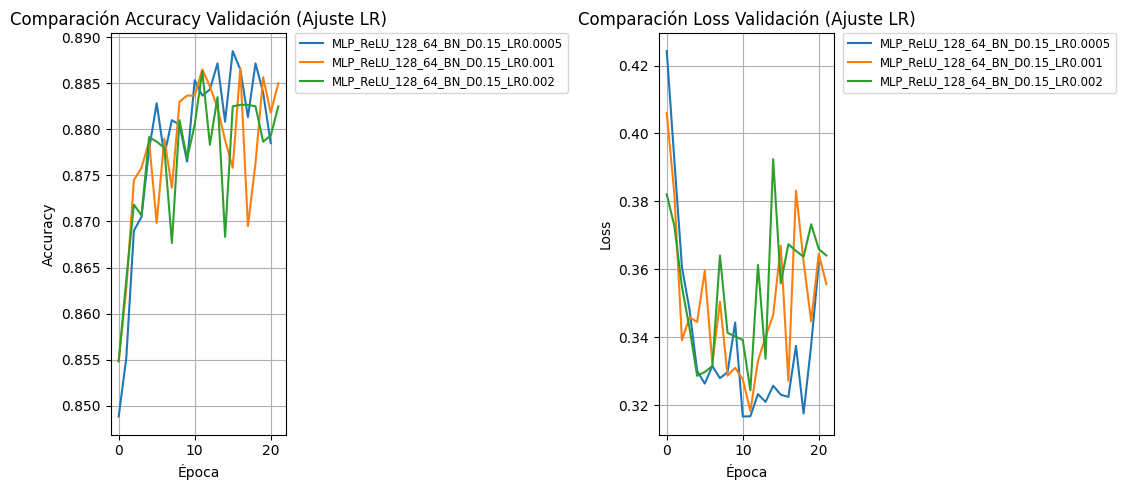


--- Análisis Final del Experimento de Ajuste Fino de LR ---

Mejor modelo de este experimento (Ajuste Fino LR): 'MLP_ReLU_128_64_BN_D0.15_LR0.002' con Accuracy 0.877100


In [37]:

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: AJUSTE FINO DE LEARNING RATE + ES")
print("="*60)

# --- Configuración Base (Mejor Modelo hasta ahora) ---
# Definir explícitamente la configuración que queremos usar como base
config_base_lr_tune = {
    'name_base': 'MLP_ReLU_128_64_BN_D0.15', # Identificador base
    'activation': 'relu',
    'neurons': [128, 64],
    'dropout': 0.15,           # <-- Dropout fijo (el mejor encontrado)
    'batch_norm': True,            # <-- BN fijo (parte de la mejor config)
    'optimizer': 'adam',           # <-- Optimizador fijo (asumiendo Adam fue el mejor/default)
    'batch_size': DEFAULT_BATCH_SIZE # <-- BS fijo (asumiendo default fue el mejor)
}
print(f"\n--- Configuración Base para Ajuste de LR: {config_base_lr_tune['name_base']} ---")
print(f"   Parámetros Fijos: {config_base_lr_tune}")

# --- Learning Rates a Probar ---
learning_rates_to_test = [0.0005, 0.001, 0.002] # Tasas a probar
experiment_results_lr = []
experiment_histories_lr = {}

# --- Definir Early Stopping ---
early_stopping_patience_lr = 10 # Misma paciencia que antes
early_stopping_cb_lr = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience_lr,
    restore_best_weights=True, verbose=1, mode='min'
)
print(f"--- EarlyStopping definido (patience={early_stopping_patience_lr}) ---")

# --- Bucle del Experimento de Ajuste Fino de LR ---
print("\n--- Iniciando Bucle de Experimentos de Ajuste Fino de LR ---")
for current_lr in learning_rates_to_test:
    start_time_lr_exp = time.time()
    keras.backend.clear_session()

    # Nombre único para este experimento y LR
    model_name_lr_exp = f"{config_base_lr_tune['name_base']}_LR{current_lr}"

    print(f"\n>>> Procesando Learning Rate: {current_lr} (Modelo: {model_name_lr_exp}) <<<")

    # 1. Crear el modelo usando la config base
    model_lr_exp = create_flexible_mlp(
        model_name=model_name_lr_exp,
        hidden_activation=config_base_lr_tune['activation'],
        neurons_per_layer=config_base_lr_tune['neurons'],
        dropout_rate=config_base_lr_tune['dropout'], # Dropout fijo
        use_batch_norm=config_base_lr_tune['batch_norm'], # BN fijo
        input_shape_orig=input_shape_original,
        num_classes=num_classes
    )

    # 2. Compilar el modelo con el LR actual
    current_optimizer_name_lr = config_base_lr_tune['optimizer']
    if current_optimizer_name_lr.lower() == 'adam':
        optimizer_lr = keras.optimizers.Adam(learning_rate=current_lr) # <-- LR actual
    elif current_optimizer_name_lr.lower() == 'sgd':
        optimizer_lr = keras.optimizers.SGD(learning_rate=current_lr) # <-- LR actual
    else: # Fallback
        optimizer_lr = keras.optimizers.Adam(learning_rate=current_lr)

    # Compilar con la loss correcta (asumiendo y_train enteros)
    loss_function_lr = "sparse_categorical_crossentropy"
    model_lr_exp.compile(loss=loss_function_lr, optimizer=optimizer_lr, metrics=["accuracy"])
    print(f"   Modelo '{model_lr_exp.name}' compilado con Loss: {loss_function_lr} (Optimizer: {current_optimizer_name_lr}, LR={current_lr}).")

    # 3. Entrenar el modelo
    max_epochs_lr = DEFAULT_EPOCHS # Usar el máximo global
    current_batch_size_lr = config_base_lr_tune['batch_size']
    print(f"\n--- Entrenando Modelo: {model_lr_exp.name} (max {max_epochs_lr} épocas, BS={current_batch_size_lr}) ---")

    # Asegurar formato y_train
    if y_train.ndim != 1 and not (y_train.ndim == 2 and y_train.shape[1] == 1):
        print(f"ADVERTENCIA: Formato y_train ({y_train.shape}) puede no ser compatible con sparse loss.")
        y_train_fit_lr = y_train
    else: y_train_fit_lr = y_train

    history_lr_exp = model_lr_exp.fit(
        x_train, y_train_fit_lr,
        batch_size=current_batch_size_lr,
        epochs=max_epochs_lr,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0,
        callbacks=[early_stopping_cb_lr] # Usar el mismo callback ES
    )
    training_time_lr_exp = round(time.time() - start_time_lr_exp, 2)
    actual_epochs_run_lr = len(history_lr_exp.history['loss'])
    print(f"   Entrenamiento completado después de {actual_epochs_run_lr} épocas.")

    # 4. Evaluar
    y_true_for_eval_lr = y_test_labels # Para sparse loss
    results_lr_exp = evaluate_model(model_lr_exp, x_test, y_true_for_eval_lr, y_test_labels, history_lr_exp, training_time_lr_exp)

    # 5. Guardar
    results_lr_exp['Actual Epochs'] = actual_epochs_run_lr
    experiment_results_lr.append(results_lr_exp)
    experiment_histories_lr[model_name_lr_exp] = history_lr_exp.history

    print("-" * 50)

print("\n" + "="*60)
print("       AJUSTE FINO DE LEARNING RATE + ES COMPLETADO")
print("="*60)

# ---------------------------------------------------------------------------
# Sección de Comparación de Resultados del Ajuste Fino de LR
# ---------------------------------------------------------------------------
print("\n--- Comparación: Ajuste Fino de Learning Rate ---")

# Crear DataFrame con los nuevos resultados
results_lr_df = pd.DataFrame(experiment_results_lr)

# Añadir el mejor resultado del experimento ANTERIOR (el D0.15 con LR=0.001) para comparar
best_previous_fine_tune_result = None
best_previous_fine_tune_name = f"{config_base_lr_tune['name_base']}_FineTuneD0.15" # Reconstruir nombre si no se guardó
# O mejor, búscalo en los resultados del experimento anterior si los tienes
if 'results_fine_df' in locals() and not results_fine_df.empty:
     # Asumiendo que results_fine_df contiene los resultados del experimento D0.1-D0.3
     # Encuentra la fila que corresponde al D0.15 con el LR default (0.001)
     target_name_prev = f"{config_base_lr_tune['name_base']}_ES_FineTune" # Nombre usado en exp anterior? Revisar
     prev_row = results_fine_df[results_fine_df['Model Name'].str.contains(f"_D0.15_")]
     if not prev_row.empty:
          best_previous_fine_tune_result = prev_row.iloc[0].to_dict()
          best_previous_fine_tune_name = best_previous_fine_tune_result['Model Name'] # Usar el nombre real

if best_previous_fine_tune_result:
    print(f"   Incluyendo resultado anterior '{best_previous_fine_tune_name}' para comparación.")
    prev_best_lr_df = pd.DataFrame([best_previous_fine_tune_result])
    comparison_lr_df = pd.concat([prev_best_lr_df, results_lr_df], ignore_index=True)
else:
    print(f"Advertencia: No se encontró el resultado anterior (D0.15 con LR default) para comparar.")
    comparison_lr_df = results_lr_df


# Mostrar tabla comparativa
if not comparison_lr_df.empty:
     if 'History' in comparison_lr_df.columns: comparison_lr_df = comparison_lr_df.drop(columns=['History'])
     comparison_lr_df_display = comparison_lr_df.sort_values(by='Accuracy', ascending=False)
     if 'Actual Epochs' in comparison_lr_df_display.columns:
         cols_order_lr = [col for col in comparison_lr_df_display.columns if col != 'Actual Epochs'] + ['Actual Epochs']
         comparison_lr_df_display = comparison_lr_df_display[cols_order_lr]

     print("\nTabla Comparativa de Métricas (Ajuste Fino LR vs. Mejor Dropout Fijo):")
     pd.set_option('display.float_format', '{:.6f}'.format)
     display(comparison_lr_df_display)
     pd.reset_option('display.float_format')
else: print("No hay resultados para comparar.")


# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos de Curvas de Aprendizaje (Ajuste Fino LR - Validación):")
plt.figure(figsize=(14, 5))
histories_lr_to_plot = {}
if best_previous_fine_tune_result: # Añadir historial del D0.15 si se encontró
    # Necesitas el dict de historiales del experimento anterior
    if 'experiment_histories_dropout_fine' in locals() and best_previous_fine_tune_name in experiment_histories_dropout_fine:
         histories_lr_to_plot[best_previous_fine_tune_name] = experiment_histories_dropout_fine[best_previous_fine_tune_name]
         print(f"   Incluyendo historial de '{best_previous_fine_tune_name}' en gráficos.")
    else: print(f"Advertencia: No se encontró historial para {best_previous_fine_tune_name}")

histories_lr_to_plot.update(experiment_histories_lr) # Añadir los nuevos historiales

if histories_lr_to_plot:
     max_plots_legend_lr = 10
     plt.subplot(1, 2, 1); # Accuracy
     count_acc_lr = 0
     for name, h in histories_lr_to_plot.items():
         if h and 'val_accuracy' in h: plt.plot(h['val_accuracy'], label=name if count_acc_lr < max_plots_legend_lr else None); count_acc_lr += 1
     plt.title('Comparación Accuracy Validación (Ajuste LR)'); plt.xlabel('Época'); plt.ylabel('Accuracy')
     if count_acc_lr <= max_plots_legend_lr: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)

     plt.subplot(1, 2, 2); # Loss
     count_loss_lr = 0
     for name, h in histories_lr_to_plot.items():
         if h and 'val_loss' in h: plt.plot(h['val_loss'], label=name if count_loss_lr < max_plots_legend_lr else None); count_loss_lr += 1
     plt.title('Comparación Loss Validación (Ajuste LR)'); plt.xlabel('Época'); plt.ylabel('Loss')
     if count_loss_lr <= max_plots_legend_lr: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)
     plt.tight_layout(rect=[0, 0, 0.8, 1]); plt.show()
else: print("No hay historiales válidos para graficar.")

# --- Análisis Final ---
print("\n--- Análisis Final del Experimento de Ajuste Fino de LR ---")
# ... (Tu análisis aquí: ¿Qué LR funcionó mejor? ¿Superó al LR=0.001 original?) ...
if not results_lr_df.empty:
    best_lr_model_row = results_lr_df.loc[results_lr_df['Accuracy'].idxmax()]
    best_lr_model_name_exp = best_lr_model_row['Model Name']
    print(f"\nMejor modelo de este experimento (Ajuste Fino LR): '{best_lr_model_name_exp}' con Accuracy {best_lr_model_row['Accuracy']:.6f}")
    # Compara con best_previous_fine_tune_result['Accuracy'] para la decisión final
else: print("No se ejecutaron experimentos de ajuste fino de LR.")

# ---------------------------------------------------------------------------
# Fin de la Celda de Experimento LR
# ===========================================================================


    INICIANDO EXPERIMENTO: AJUSTE DE BATCH SIZE + ES

--- Configuración Base para Ajuste de Batch Size: MLP_ReLU_128_64_BN_D0.15 ---
   Parámetros Fijos: {'name_base': 'MLP_ReLU_128_64_BN_D0.15', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.15, 'batch_norm': True, 'lr': 0.001, 'optimizer': 'adam'}
--- EarlyStopping definido (patience=10) ---

--- Iniciando Bucle de Experimentos de Ajuste de Batch Size ---

>>> Procesando Batch Size: 64 (Seed: 101) <<<
   Semillas fijadas a: 101

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS64' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS64' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS64' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001_BS64 (max 100 épocas, BS=64) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
   Entrenamiento completado después de 26 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001_BS64 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.338293, Test Accuracy: 0.885500
   Weighted Precision: 0.886301, Recall: 0.885500, F1-Score: 0.885390
--------------------------------------------------

>>> Procesando Batch Size: 128 (Seed: 202) <<<
   Semillas fijadas a: 202

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS128' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS128' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS128' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001_BS128 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.
   Entrenamiento completado después de 19 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001_BS128 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.352966, Test Accuracy: 0.875500
   Weighted Precision: 0.877887, Recall: 0.875500, F1-Score: 0.875564
--------------------------------------------------

>>> Procesando Batch Size: 256 (Seed: 303) <<<
   Semillas fijadas a: 303

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS256' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS256' creado.
   Modelo 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS256' compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001_BS256 (max 100 épocas, BS=256) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 13.
   Entrenamiento completado después de 23 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_LR0.001_BS256 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.351617, Test Accuracy: 0.872700
   Weighted Precision: 0.876847, Recall: 0.872700, F1-Score: 0.873644
--------------------------------------------------

       AJUSTE FINO DE BATCH SIZE + ES COMPLETADO

--- Comparación: Ajuste Fino de Batch Size ---
   Incluyendo resultado anterior 'MLP_ReLU_128_64_BN_D0.15_LR0.001' (BS=128) para comparación.

Tabla Comparativa de Métricas (Ajuste Batch Size vs. Mejor LR/Dropout Fijo):


,Model Name,Accuracy,Loss,F1-Score (Weighted),Actual Epochs,Training Time (s),Seed
1,MLP_ReLU_128_64_BN_D0.15_LR0.001_BS64,0.885500,0.338293,0.885390,26,154.840000,101.000000
0,MLP_ReLU_128_64_BN_D0.15_LR0.001,0.876900,0.346865,0.878003,22,82.200000,NaN
2,MLP_ReLU_128_64_BN_D0.15_LR0.001_BS128,0.875500,0.352966,0.875564,19,71.160000,202.000000
3,MLP_ReLU_128_64_BN_D0.15_LR0.001_BS256,0.872700,0.351617,0.873644,23,56.360000,303.000000



Gráficos Comparativos de Curvas de Aprendizaje (Ajuste Batch Size - Validación):
   Incluyendo historial de 'MLP_ReLU_128_64_BN_D0.15_LR0.001' (BS=128) en gráficos.


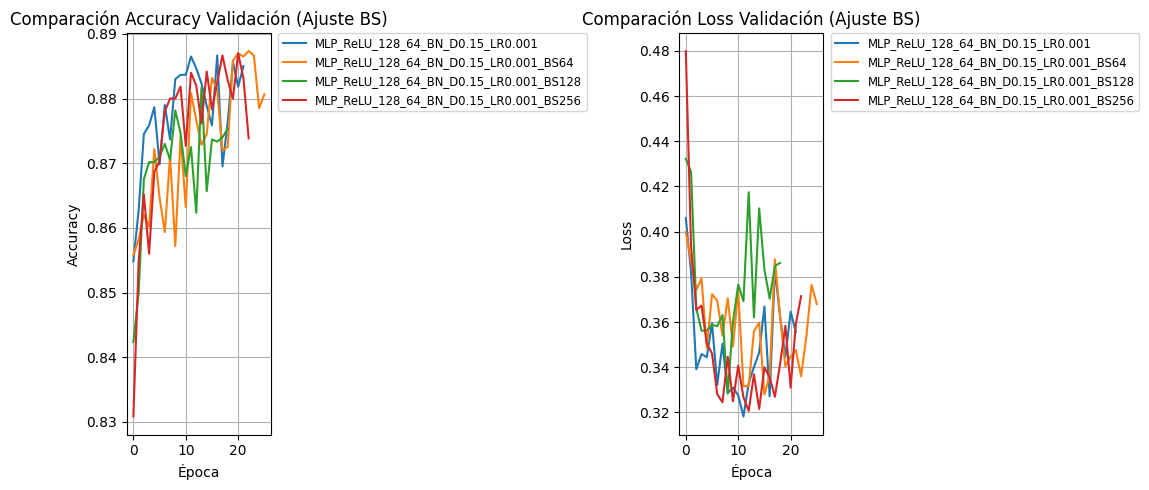


--- Análisis Final del Experimento de Ajuste de Batch Size ---

Mejor modelo de este experimento (Ajuste Fino BS): 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS64' con Accuracy 0.885500


In [38]:

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: AJUSTE DE BATCH SIZE + ES")
print("="*60)



# --- Función Helper para Configurar Semillas (Opcional pero recomendado) ---
def set_seeds(seed_value):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    print(f"   Semillas fijadas a: {seed_value}")

# --- Configuración Base Fija (La Mejor Hasta Ahora) ---
config_base_bs_tune = {
    'name_base': 'MLP_ReLU_128_64_BN_D0.15', # Identificador base
    'activation': 'relu',
    'neurons': [128, 64],
    'dropout': 0.15,           # Dropout fijo
    'batch_norm': True,            # BN fijo
    'lr': 0.001,               # LR fijo (mejor del exp. anterior o default)
    'optimizer': 'adam',           # Optimizador fijo
}
print(f"\n--- Configuración Base para Ajuste de Batch Size: {config_base_bs_tune['name_base']} ---")
print(f"   Parámetros Fijos: {config_base_bs_tune}")

# --- Batch Sizes a Probar ---
batch_sizes_to_test = [64, 128, 256] # Tasas a probar (incluir el default 128 es bueno)
experiment_results_bs = []
experiment_histories_bs = {}

# --- Definir Early Stopping ---
early_stopping_patience_bs = 10 # Misma paciencia
early_stopping_cb_bs = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience_bs,
    restore_best_weights=True, verbose=1, mode='min'
)
print(f"--- EarlyStopping definido (patience={early_stopping_patience_bs}) ---")

# --- Bucle del Experimento de Ajuste Fino de Batch Size ---
print("\n--- Iniciando Bucle de Experimentos de Ajuste de Batch Size ---")
# Usar una semilla fija para cada BS o semillas diferentes? Usemos diferentes para ver variabilidad
batch_seeds = [101, 202, 303] # Semillas distintas para cada BS
if len(batch_seeds) < len(batch_sizes_to_test): batch_seeds.extend([i*11 for i in range(len(batch_sizes_to_test)-len(batch_seeds))]) # Añadir más si es necesario

for i, current_batch_size in enumerate(batch_sizes_to_test):
    current_seed = batch_seeds[i]
    start_time_bs_exp = time.time()

    print(f"\n>>> Procesando Batch Size: {current_batch_size} (Seed: {current_seed}) <<<")

    # 1. Fijar Semillas y Limpiar Sesión
    set_seeds(current_seed)
    keras.backend.clear_session()

    # Nombre único para este experimento y BS
    model_name_bs_exp = f"{config_base_bs_tune['name_base']}_LR{config_base_bs_tune['lr']}_BS{current_batch_size}"

    # 2. Crear el modelo usando la config base
    model_bs_exp = create_flexible_mlp(
        model_name=model_name_bs_exp,
        hidden_activation=config_base_bs_tune['activation'],
        neurons_per_layer=config_base_bs_tune['neurons'],
        dropout_rate=config_base_bs_tune['dropout'],
        use_batch_norm=config_base_bs_tune['batch_norm'],
        input_shape_orig=input_shape_original,
        num_classes=num_classes
    )

    # 3. Compilar el modelo
    current_lr_bs = config_base_bs_tune['lr']
    current_optimizer_name_bs = config_base_bs_tune['optimizer']
    if current_optimizer_name_bs.lower() == 'adam': optimizer_bs = keras.optimizers.Adam(learning_rate=current_lr_bs)
    elif current_optimizer_name_bs.lower() == 'sgd': optimizer_bs = keras.optimizers.SGD(learning_rate=current_lr_bs)
    else: optimizer_bs = keras.optimizers.Adam(learning_rate=current_lr_bs)

    # Compilar con la loss correcta (asumiendo y_train enteros)
    loss_function_bs = "sparse_categorical_crossentropy"
    model_bs_exp.compile(loss=loss_function_bs, optimizer=optimizer_bs, metrics=["accuracy"])
    print(f"   Modelo '{model_bs_exp.name}' compilado (Loss: {loss_function_bs}, Opt: {current_optimizer_name_bs}, LR: {current_lr_bs}).")

    # 4. Entrenar el modelo con el BS actual
    max_epochs_bs = DEFAULT_EPOCHS # Usar el máximo global
    print(f"\n--- Entrenando Modelo: {model_bs_exp.name} (max {max_epochs_bs} épocas, BS={current_batch_size}) ---")

    # Asegurar formato y_train
    if y_train.ndim != 1 and not (y_train.ndim == 2 and y_train.shape[1] == 1):
        print(f"ADVERTENCIA: Formato y_train ({y_train.shape}) puede no ser compatible con sparse loss.")
        y_train_fit_bs = y_train
    else: y_train_fit_bs = y_train

    history_bs_exp = model_bs_exp.fit(
        x_train, y_train_fit_bs,
        batch_size=current_batch_size, # <-- USAR EL BATCH SIZE ACTUAL
        epochs=max_epochs_bs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0,
        callbacks=[early_stopping_cb_bs]
    )
    training_time_bs_exp = round(time.time() - start_time_bs_exp, 2)
    actual_epochs_run_bs = len(history_bs_exp.history['loss'])
    print(f"   Entrenamiento completado después de {actual_epochs_run_bs} épocas.")

    # 5. Evaluar
    y_true_for_eval_bs = y_test_labels # Para sparse loss
    results_bs_exp = evaluate_model(model_bs_exp, x_test, y_true_for_eval_bs, y_test_labels, history_bs_exp, training_time_bs_exp)

    # 6. Guardar
    results_bs_exp['Actual Epochs'] = actual_epochs_run_bs
    results_bs_exp['Seed'] = current_seed # Guardar semilla usada
    experiment_results_bs.append(results_bs_exp)
    experiment_histories_bs[model_name_bs_exp] = history_bs_exp.history

    print("-" * 50)

print("\n" + "="*60)
print("       AJUSTE FINO DE BATCH SIZE + ES COMPLETADO")
print("="*60)

# ---------------------------------------------------------------------------
# Sección de Comparación de Resultados del Ajuste Fino de Batch Size
# ---------------------------------------------------------------------------
print("\n--- Comparación: Ajuste Fino de Batch Size ---")

# Crear DataFrame con los nuevos resultados
results_bs_df = pd.DataFrame(experiment_results_bs)

# Añadir el mejor resultado del experimento ANTERIOR (D0.15, LR0.001, BS128) para comparar
best_previous_lr_result = None
best_previous_lr_name = f"{config_base_bs_tune['name_base']}_LR{config_base_bs_tune['lr']}" # Nombre del modelo de referencia (LR=0.001)
# Búscalo en los resultados del experimento de LR
if 'results_lr_df' in locals() and not results_lr_df.empty:
     prev_row_lr = results_lr_df[results_lr_df['Model Name'] == best_previous_lr_name]
     if not prev_row_lr.empty:
          best_previous_lr_result = prev_row_lr.iloc[0].to_dict()

if best_previous_lr_result:
    print(f"   Incluyendo resultado anterior '{best_previous_lr_name}' (BS=128) para comparación.")
    prev_best_bs_df = pd.DataFrame([best_previous_lr_result])
    comparison_bs_df = pd.concat([prev_best_bs_df, results_bs_df], ignore_index=True)
else:
    print(f"Advertencia: No se encontró el resultado anterior ({best_previous_lr_name} con BS=128) para comparar.")
    # Asegurarse de incluir el resultado BS=128 de la ejecución actual si existe
    bs128_current = results_bs_df[results_bs_df['Model Name'].str.contains("_BS128")]
    if not bs128_current.empty:
        print("   Usando resultado BS=128 de la ejecución actual como referencia.")
        comparison_bs_df = results_bs_df
    else:
        print("   No hay resultados BS=128 para comparar.")
        comparison_bs_df = results_bs_df

# Mostrar tabla comparativa
if not comparison_bs_df.empty:
     if 'History' in comparison_bs_df.columns: comparison_bs_df = comparison_bs_df.drop(columns=['History'])
     comparison_bs_df_display = comparison_bs_df.sort_values(by='Accuracy', ascending=False)
     cols_to_order = ['Model Name', 'Accuracy', 'Loss', 'F1-Score (Weighted)', 'Actual Epochs', 'Training Time (s)', 'Seed']
     cols_existing = [col for col in cols_to_order if col in comparison_bs_df_display.columns]
     comparison_bs_df_display = comparison_bs_df_display[cols_existing]

     print("\nTabla Comparativa de Métricas (Ajuste Batch Size vs. Mejor LR/Dropout Fijo):")
     pd.set_option('display.float_format', '{:.6f}'.format)
     display(comparison_bs_df_display)
     pd.reset_option('display.float_format')
else: print("No hay resultados para comparar.")


# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos de Curvas de Aprendizaje (Ajuste Batch Size - Validación):")
plt.figure(figsize=(14, 5))
histories_bs_to_plot = {}
if best_previous_lr_result: # Añadir historial del BS=128 anterior si se encontró
    if 'experiment_histories_lr' in locals() and best_previous_lr_name in experiment_histories_lr:
         histories_bs_to_plot[best_previous_lr_name] = experiment_histories_lr[best_previous_lr_name]
         print(f"   Incluyendo historial de '{best_previous_lr_name}' (BS=128) en gráficos.")
    else: print(f"Advertencia: No se encontró historial para {best_previous_lr_name}")

histories_bs_to_plot.update(experiment_histories_bs) # Añadir los nuevos historiales

if histories_bs_to_plot:
     max_plots_legend_bs = 10
     plt.subplot(1, 2, 1); # Accuracy
     count_acc_bs = 0
     for name, h in histories_bs_to_plot.items():
         if h and 'val_accuracy' in h: plt.plot(h['val_accuracy'], label=name if count_acc_bs < max_plots_legend_bs else None); count_acc_bs += 1
     plt.title('Comparación Accuracy Validación (Ajuste BS)'); plt.xlabel('Época'); plt.ylabel('Accuracy')
     if count_acc_bs <= max_plots_legend_bs: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)

     plt.subplot(1, 2, 2); # Loss
     count_loss_bs = 0
     for name, h in histories_bs_to_plot.items():
         if h and 'val_loss' in h: plt.plot(h['val_loss'], label=name if count_loss_bs < max_plots_legend_bs else None); count_loss_bs += 1
     plt.title('Comparación Loss Validación (Ajuste BS)'); plt.xlabel('Época'); plt.ylabel('Loss')
     if count_loss_bs <= max_plots_legend_bs: plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
     plt.grid(True)
     plt.tight_layout(rect=[0, 0, 0.8, 1]); plt.show()
else: print("No hay historiales válidos para graficar.")

# --- Análisis Final ---
print("\n--- Análisis Final del Experimento de Ajuste de Batch Size ---")
# ... (Tu análisis aquí: ¿Qué BS funcionó mejor? ¿Hubo diferencias grandes en tiempo o épocas?) ...
if not results_bs_df.empty:
    best_bs_model_row = results_bs_df.loc[results_bs_df['Accuracy'].idxmax()]
    best_bs_model_name_exp = best_bs_model_row['Model Name']
    print(f"\nMejor modelo de este experimento (Ajuste Fino BS): '{best_bs_model_name_exp}' con Accuracy {best_bs_model_row['Accuracy']:.6f}")
    # Compara con el mejor anterior para decidir el mejor global
else: print("No se ejecutaron experimentos de ajuste fino de BS.")

# ---------------------------------------------------------------------------
# Fin de la Celda de Experimento Batch Size
# ===========================================================================

In [39]:

print("\n" + "="*60)
print("    COMPARACIÓN FINAL: MEJOR BATCH SIZE (BS64) vs. MEJOR ANTERIOR (BS128)")
print("="*60)

# --- Identificar los nombres de los modelos a comparar ---
# Mejor modelo del experimento anterior (BS=128, LR=0.001, D=0.15)
# Necesitamos reconstruir el nombre o encontrarlo en results_lr_df
previous_best_name = None
previous_best_metrics = None
previous_best_history = None
base_name = 'MLP_ReLU_128_64_BN_D0.15' # Base común
lr_ref = 0.001
previous_best_name_search = f"{base_name}_LR{lr_ref}" # Nombre usado en exp LR

if 'results_lr_df' in locals() and not results_lr_df.empty:
     prev_row_search = results_lr_df[results_lr_df['Model Name'] == previous_best_name_search]
     if not prev_row_search.empty:
          previous_best_metrics = prev_row_search.iloc[0].to_dict()
          previous_best_name = previous_best_metrics['Model Name'] # Obtener nombre real
          print(f"--- Modelo Anterior Mejor (BS128): '{previous_best_name}'")
          if 'experiment_histories_lr' in locals() and previous_best_name in experiment_histories_lr:
               previous_best_history = experiment_histories_lr[previous_best_name]
          else: print(f"Advertencia: No se encontró historial para '{previous_best_name}' en 'experiment_histories_lr'.")
     else: print(f"Advertencia: No se encontraron métricas para '{previous_best_name_search}' en 'results_lr_df'.")
else: print("Advertencia: Falta 'results_lr_df' del experimento LR.")


# Mejor modelo de ESTE experimento (BS=64)
current_best_name = None
current_best_metrics = None
current_best_history = None
bs_ref = 64
current_best_name_search = f"{base_name}_LR{lr_ref}_BS{bs_ref}" # Nombre esperado para BS64

if 'experiment_results_bs' in locals() and not experiment_results_bs.empty:
     current_row_search = results_bs_df[results_bs_df['Model Name'] == current_best_name_search]
     if not current_row_search.empty:
          current_best_metrics = current_row_search.iloc[0].to_dict()
          current_best_name = current_best_metrics['Model Name']
          print(f"--- Modelo Actual Mejor (BS64): '{current_best_name}'")
          if 'experiment_histories_bs' in locals() and current_best_name in experiment_histories_bs:
               current_best_history = experiment_histories_bs[current_best_name]
          else: print(f"Advertencia: No se encontró historial para '{current_best_name}' en 'experiment_histories_bs'.")
     else: print(f"Advertencia: No se encontraron métricas para '{current_best_name_search}' en 'experiment_results_bs'.")
else: print("Advertencia: Falta 'experiment_results_bs'.")


# --- Crear Tabla Comparativa ---
if previous_best_metrics and current_best_metrics:
    print("\n--- Tabla Comparativa Directa (BS64 vs BS128) ---")
    metrics_to_compare_bs = ['Loss', 'Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)', 'Training Time (s)', 'Actual Epochs', 'Seed']
    comparison_data_bs = {'Métrica': metrics_to_compare_bs}

    comparison_data_bs[previous_best_name] = [previous_best_metrics.get(m, np.nan) for m in metrics_to_compare_bs]
    comparison_data_bs[current_best_name] = [current_best_metrics.get(m, np.nan) for m in metrics_to_compare_bs]

    comparison_bs_final_df = pd.DataFrame(comparison_data_bs).set_index('Métrica')

    # Formatear números
    float_format = "{:.6f}"
    int_format = "{:.0f}"
    comparison_bs_final_df_display = comparison_bs_final_df.style.format(
         # Aplicar formato a ambas columnas
         formatter=lambda x: int_format.format(x) if isinstance(x, (int, float)) and x >= 1 else float_format.format(x) if isinstance(x, (int, float)) else x,
         subset=pd.IndexSlice[metrics_to_compare_bs, :] # Aplicar a todas las filas listadas
         )

    display(comparison_bs_final_df_display)
else:
    print("\nNo se pudieron extraer las métricas para ambos modelos (BS64 y BS128). No se puede generar tabla comparativa.")


# --- Gráficos Comparativos de Curvas ---
if previous_best_history and current_best_history:
    print("\n--- Gráficos Comparativos de Curvas de Aprendizaje (BS64 vs BS128) ---")
    plt.figure(figsize=(14, 5))

    epochs_prev = len(previous_best_history.get('val_loss', []))
    epochs_curr = len(current_best_history.get('val_loss', []))

    # Accuracy
    plt.subplot(1, 2, 1)
    if 'val_accuracy' in previous_best_history:
        plt.plot(previous_best_history['val_accuracy'], label=f'{previous_best_name} ({epochs_prev} ep.)')
    if 'val_accuracy' in current_best_history:
        plt.plot(current_best_history['val_accuracy'], label=f'{current_best_name} ({epochs_curr} ep.)')
    plt.title('Comparación Accuracy Validación (BS64 vs BS128)')
    plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    if 'val_loss' in previous_best_history:
        plt.plot(previous_best_history['val_loss'], label=f'{previous_best_name} ({epochs_prev} ep.)')
    if 'val_loss' in current_best_history:
        plt.plot(current_best_history['val_loss'], label=f'{current_best_name} ({epochs_curr} ep.)')
    plt.title('Comparación Loss Validación (BS64 vs BS128)')
    plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

    plt.tight_layout(); plt.show()
else:
    print("\nNo se pudieron encontrar los historiales de ambos modelos (BS64 y BS128) para graficar.")

# --- Conclusión Final ---
print("\n--- Conclusión de la Comparación (BS64 vs BS128) ---")
print("Basado en la tabla y gráficos, analiza si la reducción del Batch Size a 64 resultó beneficiosa:")
print(f"- Modelo Anterior (BS128): {previous_best_name or 'N/A'}")
print(f"- Modelo Actual (BS64): {current_best_name or 'N/A'}")
print("(Considera la ligera mejora en Accuracy vs. el posible aumento en tiempo de entrenamiento).")

# ===========================================================================
# Fin de la Celda de Comparación BS64 vs BS128
# ===========================================================================


    COMPARACIÓN FINAL: MEJOR BATCH SIZE (BS64) vs. MEJOR ANTERIOR (BS128)
--- Modelo Anterior Mejor (BS128): 'MLP_ReLU_128_64_BN_D0.15_LR0.001'


AttributeError: 'list' object has no attribute 'empty'


    INICIANDO EXPERIMENTO: VALIDACIÓN DE ESTABILIDAD (MÚLTIPLES SEMILLAS)

--- Configuración a validar: MLP_ReLU_128_64_BN_D0.15 ---
   Parámetros: {'name_base': 'MLP_ReLU_128_64_BN_D0.15', 'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.15, 'batch_norm': True, 'lr': 0.001, 'optimizer': 'adam', 'batch_size': 128}
--- EarlyStopping definido (patience=10) ---

--- Iniciando 5 ejecuciones con diferentes semillas ---

>>> Ejecución 1/5 (Seed: 42) <<<
   Semillas fijadas a: 42

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_Seed42' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_Seed42' creado.
   Modelo compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando: MLP_ReLU_128_64_BN_D0.15_Seed42 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.
   Entrenamiento completado después de 18 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_Seed42 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.360875, Test Accuracy: 0.873600
   Weighted Precision: 0.873976, Recall: 0.873600, F1-Score: 0.872155
--------------------------------------------------

>>> Ejecución 2/5 (Seed: 123) <<<
   Semillas fijadas a: 123

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_Seed123' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_Seed123' creado.
   Modelo compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando: MLP_ReLU_128_64_BN_D0.15_Seed123 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 7.
   Entrenamiento completado después de 17 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_Seed123 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.365294, Test Accuracy: 0.870400
   Weighted Precision: 0.872698, Recall: 0.870400, F1-Score: 0.869988
--------------------------------------------------

>>> Ejecución 3/5 (Seed: 7) <<<
   Semillas fijadas a: 7

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_Seed7' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_Seed7' creado.
   Modelo compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando: MLP_ReLU_128_64_BN_D0.15_Seed7 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 9.
   Entrenamiento completado después de 19 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_Seed7 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.337464, Test Accuracy: 0.879900
   Weighted Precision: 0.880146, Recall: 0.879900, F1-Score: 0.878738
--------------------------------------------------

>>> Ejecución 4/5 (Seed: 99) <<<
   Semillas fijadas a: 99

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_Seed99' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_Seed99' creado.
   Modelo compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando: MLP_ReLU_128_64_BN_D0.15_Seed99 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.
   Entrenamiento completado después de 16 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_Seed99 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.362076, Test Accuracy: 0.874300
   Weighted Precision: 0.877054, Recall: 0.874300, F1-Score: 0.871370
--------------------------------------------------

>>> Ejecución 5/5 (Seed: 555) <<<
   Semillas fijadas a: 555

--- Creando Modelo: 'MLP_ReLU_128_64_BN_D0.15_Seed555' ---
   Activación Oculta: relu
   Neuronas/Capa: [128, 64]
   Dropout Rate: 0.15
   Batch Norm: Sí
Modelo 'MLP_ReLU_128_64_BN_D0.15_Seed555' creado.
   Modelo compilado (Loss: sparse_categorical_crossentropy, Opt: adam, LR: 0.001).

--- Entrenando: MLP_ReLU_128_64_BN_D0.15_Seed555 (max 100 épocas, BS=128) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.
   Entrenamiento completado después de 18 épocas.

--- Evaluando Modelo: MLP_ReLU_128_64_BN_D0.15_Seed555 ---
   Usando etiquetas enteras (sparse) para model.evaluate...
   Test Loss: 0.352672, Test Accuracy: 0.873500
   Weighted Precision: 0.874428, Recall: 0.873500, F1-Score: 0.873242
--------------------------------------------------

       VALIDACIÓN DE ESTABILIDAD COMPLETADA

--- Análisis de Resultados de Estabilidad ---

Resultados de cada ejecución:


,Seed,Accuracy,Loss,F1-Score (Weighted),Actual Epochs,Training Time (s),Model Name
2,7,0.879900,0.337464,0.878738,19,76.190000,MLP_ReLU_128_64_BN_D0.15_Seed7
3,99,0.874300,0.362076,0.871370,16,56.200000,MLP_ReLU_128_64_BN_D0.15_Seed99
0,42,0.873600,0.360875,0.872155,18,139.120000,MLP_ReLU_128_64_BN_D0.15_Seed42
4,555,0.873500,0.352672,0.873242,18,69.150000,MLP_ReLU_128_64_BN_D0.15_Seed555
1,123,0.870400,0.365294,0.869988,17,72.630000,MLP_ReLU_128_64_BN_D0.15_Seed123



Estadísticas Descriptivas (a través de las semillas):


,Accuracy,Loss,F1-Score (Weighted),Actual Epochs,Training Time (s)
mean,0.8743,0.3557,0.8731,17.6000,82.6580
std,0.0035,0.0112,0.0034,1.1402,32.4532
min,0.8704,0.3375,0.8700,16.0000,56.2000
max,0.8799,0.3653,0.8787,19.0000,139.1200



Gráfico Comparativo de Curvas de Validación (Múltiples Semillas):


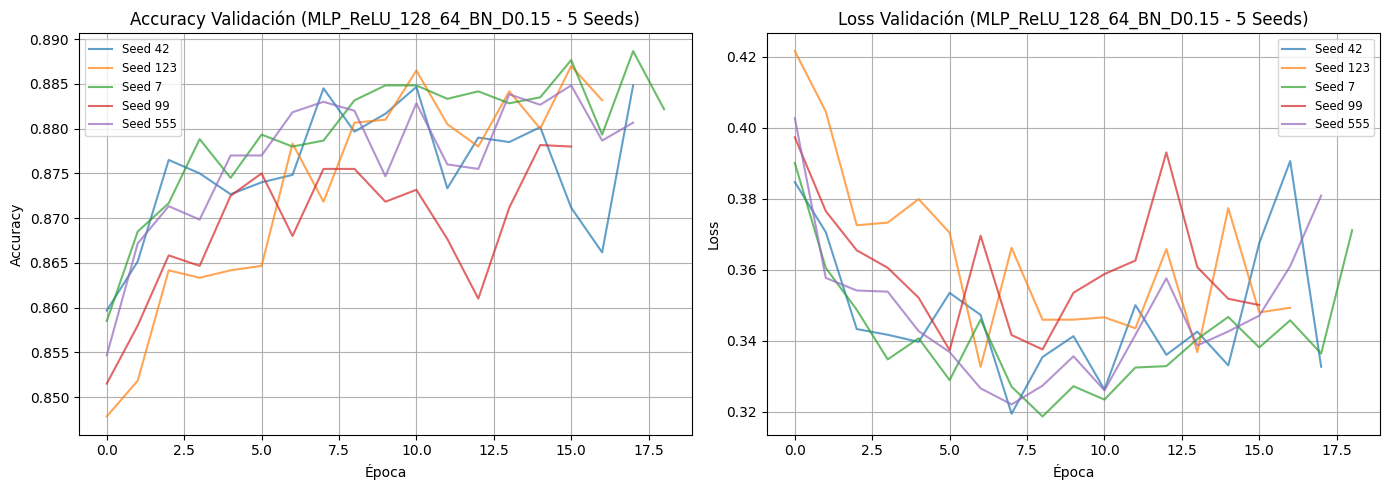

   Épocas ejecutadas (Val Acc): Min=16, Max=19
   Épocas ejecutadas (Val Loss): Min=16, Max=19

--- Conclusión de Estabilidad ---
El rendimiento promedio de Accuracy fue 0.8743 con una desviación estándar de 0.0035.
Analiza la desviación estándar: si es baja, el modelo es estable y el resultado original fue representativo.
Si la desviación estándar es alta, el rendimiento depende más de la inicialización aleatoria.
------------------------------------------------------------


In [36]:
# ===========================================================================
# Celda de Experimento: Validación de Estabilidad del Mejor Modelo (Múltiples Semillas)
# ===========================================================================
# OBJETIVO: Re-entrenar la configuración exacta del mejor modelo encontrado
#           (MLP_ReLU_128_64_BN_D0.5_FineTuneD0.15) varias veces con
#           diferentes semillas aleatorias para evaluar la consistencia
#           de su rendimiento.
#
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Celdas anteriores ejecutadas: Constantes (DEFAULT_*), datos (x_*, y_*),
#    funciones (create_flexible_mlp, evaluate_model).
# 2. La configuración exacta del MEJOR modelo está definida/conocida.
#    (Basado en el nombre: ReLU, 128/64, BN=True, Dropout=0.15, LR=Default, BS=Default)
# ---------------------------------------------------------------------------


print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO: VALIDACIÓN DE ESTABILIDAD (MÚLTIPLES SEMILLAS)")
print("="*60)




# --- Configuración del Modelo a Probar (El Mejor Encontrado) ---
# Definir explícitamente la configuración basada en el nombre y experimentos anteriores
config_to_validate = {
    'name_base': 'MLP_ReLU_128_64_BN_D0.15', # Nombre base para identificar config
    'activation': 'relu',
    'neurons': [128, 64],
    'dropout': 0.15,
    'batch_norm': True, # Importante: Este modelo SÍ usaba BN
    'lr': DEFAULT_LEARNING_RATE, # Asumiendo que usó el default
    'optimizer': 'adam',          # Asumiendo que usó el default
    'batch_size': DEFAULT_BATCH_SIZE   # Asumiendo que usó el default
}
print(f"\n--- Configuración a validar: {config_to_validate['name_base']} ---")
print(f"   Parámetros: {config_to_validate}")

# --- Parámetros del Experimento de Estabilidad ---
num_runs = 5 # Número de veces que re-entrenaremos (ajusta según necesidad y tiempo)
random_seeds = [42, 123, 7, 99, 555] # Lista de semillas a usar (debe tener longitud num_runs)
if len(random_seeds) != num_runs:
    print(f"Advertencia: Se especificaron {num_runs} runs pero hay {len(random_seeds)} semillas. Usando las primeras {num_runs}.")
    random_seeds = random_seeds[:num_runs]

stability_results = []
stability_histories = {}

# --- Función Helper para Configurar Semillas ---
def set_seeds(seed_value):
    """Configura las semillas aleatorias para reproducibilidad."""
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = '1' # Intentar forzar determinismo en TF
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    print(f"   Semillas fijadas a: {seed_value}")


# --- Definir Early Stopping (igual que antes) ---
early_stopping_patience_stab = 10 # Misma paciencia que antes
early_stopping_cb_stab = EarlyStopping(
    monitor='val_loss', patience=early_stopping_patience_stab,
    restore_best_weights=True, verbose=1, mode='min'
)
print(f"--- EarlyStopping definido (patience={early_stopping_patience_stab}) ---")

# --- Bucle de Re-entrenamiento con Diferentes Semillas ---
print(f"\n--- Iniciando {num_runs} ejecuciones con diferentes semillas ---")
for i, seed in enumerate(random_seeds):
    run_number = i + 1
    print(f"\n>>> Ejecución {run_number}/{num_runs} (Seed: {seed}) <<<")
    start_time_run = time.time()

    # 1. Fijar Semillas para esta ejecución
    set_seeds(seed)
    keras.backend.clear_session() # Limpiar sesión

    # 2. Crear el modelo
    model_name_run = f"{config_to_validate['name_base']}_Seed{seed}"
    model_run = create_flexible_mlp(
        model_name=model_name_run,
        hidden_activation=config_to_validate['activation'],
        neurons_per_layer=config_to_validate['neurons'],
        dropout_rate=config_to_validate['dropout'],
        use_batch_norm=config_to_validate['batch_norm'],
        input_shape_orig=input_shape_original,
        num_classes=num_classes
    )

    # 3. Compilar el modelo
    current_lr_run = config_to_validate['lr']
    current_optimizer_name_run = config_to_validate['optimizer']
    if current_optimizer_name_run.lower() == 'adam': optimizer_run = keras.optimizers.Adam(learning_rate=current_lr_run)
    elif current_optimizer_name_run.lower() == 'sgd': optimizer_run = keras.optimizers.SGD(learning_rate=current_lr_run)
    else: optimizer_run = keras.optimizers.Adam(learning_rate=current_lr_run)

    # Asumiendo y_train enteros
    loss_function_run = "sparse_categorical_crossentropy"
    model_run.compile(loss=loss_function_run, optimizer=optimizer_run, metrics=["accuracy"])
    print(f"   Modelo compilado (Loss: {loss_function_run}, Opt: {current_optimizer_name_run}, LR: {current_lr_run}).")

    # 4. Entrenar el modelo
    max_epochs_run = DEFAULT_EPOCHS # Usar el máximo global
    current_batch_size_run = config_to_validate['batch_size']
    print(f"\n--- Entrenando: {model_run.name} (max {max_epochs_run} épocas, BS={current_batch_size_run}) ---")

    # Asegurar formato y_train
    if y_train.ndim != 1 and not (y_train.ndim == 2 and y_train.shape[1] == 1):
        print(f"ADVERTENCIA: Formato y_train ({y_train.shape}) puede no ser compatible con sparse loss.")
        y_train_fit_run = y_train
    else: y_train_fit_run = y_train

    history_run = model_run.fit(
        x_train, y_train_fit_run,
        batch_size=current_batch_size_run,
        epochs=max_epochs_run,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0, # Silenciar output de época
        callbacks=[early_stopping_cb_stab]
    )
    training_time_run = round(time.time() - start_time_run, 2)
    actual_epochs_run_stab = len(history_run.history['loss'])
    print(f"   Entrenamiento completado después de {actual_epochs_run_stab} épocas.")

    # 5. Evaluar el modelo
    y_true_for_eval_run = y_test_labels # Para sparse loss
    results_run = evaluate_model(model_run, x_test, y_true_for_eval_run, y_test_labels, history_run, training_time_run)

    # 6. Guardar resultados (añadiendo la semilla)
    results_run['Seed'] = seed
    results_run['Actual Epochs'] = actual_epochs_run_stab
    stability_results.append(results_run)
    stability_histories[model_name_run] = history_run.history

    print("-" * 50)

print("\n" + "="*60)
print("       VALIDACIÓN DE ESTABILIDAD COMPLETADA")
print("="*60)

# ---------------------------------------------------------------------------
# Sección de Análisis de Estabilidad
# ---------------------------------------------------------------------------
print("\n--- Análisis de Resultados de Estabilidad ---")

if stability_results:
    stability_df = pd.DataFrame(stability_results)

    # Mostrar tabla con todos los runs
    print("\nResultados de cada ejecución:")
    display_cols = ['Seed', 'Accuracy', 'Loss', 'F1-Score (Weighted)', 'Actual Epochs', 'Training Time (s)', 'Model Name']
    pd.set_option('display.float_format', '{:.6f}'.format)
    display(stability_df[display_cols].sort_values(by='Accuracy', ascending=False))
    pd.reset_option('display.float_format')

    # Calcular y mostrar estadísticas descriptivas
    print("\nEstadísticas Descriptivas (a través de las semillas):")
    metrics_to_analyze = ['Accuracy', 'Loss', 'F1-Score (Weighted)', 'Actual Epochs', 'Training Time (s)']
    # Usar .describe() y seleccionar filas relevantes
    desc_stats = stability_df[metrics_to_analyze].describe().loc[['mean', 'std', 'min', 'max']]
    pd.set_option('display.float_format', '{:.4f}'.format) # Formato para estadísticas
    display(desc_stats)
    pd.reset_option('display.float_format')

    # --- Gráfico Opcional: Curvas de Validación de todas las ejecuciones ---
    print("\nGráfico Comparativo de Curvas de Validación (Múltiples Semillas):")
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    all_val_acc_lengths = []
    for name, h in stability_histories.items():
         if h and 'val_accuracy' in h:
             plt.plot(h['val_accuracy'], label=f"Seed {name.split('Seed')[-1]}", alpha=0.7)
             all_val_acc_lengths.append(len(h['val_accuracy']))
    plt.title(f'Accuracy Validación ({config_to_validate["name_base"]} - {num_runs} Seeds)')
    plt.xlabel('Época'); plt.ylabel('Accuracy'); plt.legend(fontsize='small'); plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    all_val_loss_lengths = []
    for name, h in stability_histories.items():
         if h and 'val_loss' in h:
             plt.plot(h['val_loss'], label=f"Seed {name.split('Seed')[-1]}", alpha=0.7)
             all_val_loss_lengths.append(len(h['val_loss']))
    plt.title(f'Loss Validación ({config_to_validate["name_base"]} - {num_runs} Seeds)')
    plt.xlabel('Época'); plt.ylabel('Loss'); plt.legend(fontsize='small'); plt.grid(True)

    plt.tight_layout(); plt.show()

    # Imprimir resumen de épocas
    if all_val_acc_lengths: print(f"   Épocas ejecutadas (Val Acc): Min={min(all_val_acc_lengths)}, Max={max(all_val_acc_lengths)}")
    if all_val_loss_lengths: print(f"   Épocas ejecutadas (Val Loss): Min={min(all_val_loss_lengths)}, Max={max(all_val_loss_lengths)}")


    # --- Conclusión del Análisis de Estabilidad ---
    print("\n--- Conclusión de Estabilidad ---")
    mean_acc = desc_stats.loc['mean', 'Accuracy']
    std_acc = desc_stats.loc['std', 'Accuracy']
    print(f"El rendimiento promedio de Accuracy fue {mean_acc:.4f} con una desviación estándar de {std_acc:.4f}.")
    print("Analiza la desviación estándar: si es baja, el modelo es estable y el resultado original fue representativo.")
    print("Si la desviación estándar es alta, el rendimiento depende más de la inicialización aleatoria.")

else:
    print("No se generaron resultados para el análisis de estabilidad.")

print("-" * 60)
# ===========================================================================
# Fin de la Celda de Validación de Estabilidad
# ===========================================================================

In [ ]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA SECCIÓN:
# 1. Secciones 1-4 ejecutadas (Importaciones, Carga/Preproc, Crear MLP, Evaluar MLP).
# 2. Tienes datos: x_train, y_train, x_test, y_test, y_test_labels.
# 3. Tienes variables de config base (DEFAULT_*).
# 4. Tienes los resultados del mejor modelo hasta ahora para comparar:
#    - best_model_name_so_far = 'MLP_ReLU_128_64_D0.2_ES' # El nombre de tu mejor modelo
#    - best_result_so_far = # El diccionario de resultados de ese modelo (de all_results o experiment_results_dropout)
#    - all_histories (para añadir/comparar curvas)
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección X+5: Experimentos Finales - Batch Norm y Ajuste de LR
# ---------------------------------------------------------------------------
# Basado en los experimentos anteriores, el modelo 'MLP_ReLU_128_64_D0.2_ES'
# mostró el mejor rendimiento (Accuracy ~0.8873).
# Ahora realizaremos dos pruebas finales sobre esta base:
# 1. Añadir Batch Normalization (manteniendo Dropout 0.2).
# 2. Ajustar la Tasa de Aprendizaje (manteniendo Dropout 0.2 y sin BN).

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTOS FINALES: BN y AJUSTE LR")
print("="*60)

# --- Configuraciones para este experimento ---
# Usaremos la arquitectura [128, 64], activación 'relu', dropout 0.2 como base.
final_experiments_config = [
    # Prueba con Batch Normalization
    {'name': 'MLP_ReLU_128_64_D0.2_BN_ES', # Añadimos BN al nombre
     'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
     'batch_norm': True, # <-- Activamos Batch Norm
     # Usará LR y Epochs/BS por defecto
     },
    # Pruebas con Tasa de Aprendizaje diferente (sin BN)
    {'name': 'MLP_ReLU_128_64_D0.2_LR0.0005_ES',
     'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
     'lr': 0.0005, # <-- Nueva LR más baja
     'batch_norm': False
     },
    {'name': 'MLP_ReLU_128_64_D0.2_LR0.002_ES',
     'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
     'lr': 0.002, # <-- Nueva LR más alta
     'batch_norm': False
     },
]

# --- Listas para almacenar resultados de este experimento ---
final_experiment_results = []
# Usaremos el dict 'all_histories' global para guardar historiales

# --- Definir Early Stopping (igual que antes) ---
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# --- Bucle del Experimento Final ---
for config in final_experiments_config:
    start_time_exp = time.time()

    # Obtener parámetros específicos o usar defaults
    current_lr = config.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = config.get('optimizer', 'adam') # Mantenemos Adam
    current_batch_size = config.get('batch_size', DEFAULT_BATCH_SIZE)
    current_epochs = config.get('epochs', 50) # Usamos 50 como max para ES
    current_dropout_rate = config.get('dropout', 0.2) # Fijamos dropout en 0.2 para estas pruebas
    use_bn = config.get('batch_norm', False)

    # 1. Crear el modelo
    model_exp = create_flexible_mlp(
        model_name=config['name'],
        hidden_activation=config['activation'],
        neurons_per_layer=config['neurons'],
        dropout_rate=current_dropout_rate,
        use_batch_norm=use_bn # <-- Pasamos el flag de BN
    )

    # 2. Compilar el modelo
    if current_optimizer_name.lower() == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    # ... (podrías añadir más optimizadores si los pruebas) ...
    else:
        optimizer = keras.optimizers.Adam(learning_rate=current_lr)

    model_exp.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo '{model_exp.name}' compilado (LR={current_lr}).")


    # 3. Entrenar el modelo
    print(f"\n--- Entrenando Modelo: {model_exp.name} (max {current_epochs} épocas) ---")
    history_exp = model_exp.fit(
        x_train, y_train,
        batch_size=current_batch_size,
        epochs=current_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=0, # Cambiar a 1 si quieres ver progreso
        callbacks=[early_stopping_cb]
    )
    training_time_exp = round(time.time() - start_time_exp, 2)
    stopped_epoch_exp = early_stopping_cb.stopped_epoch
    if stopped_epoch_exp > 0:
         print(f"   EarlyStopping detuvo el entrenamiento en la época: {stopped_epoch_exp + 1}")
    else:
         print(f"   Entrenamiento completó las {current_epochs} épocas.")

    # 4. Evaluar el modelo
    results_exp = evaluate_model(model_exp, x_test, y_test, y_test_labels, history_exp, training_time_exp)

    # 5. Guardar resultados
    final_experiment_results.append(results_exp)
    all_histories[model_exp.name] = history_exp.history # Añadir al dict global

    print("-" * 50)

print("\n" + "="*60); print("       EXPERIMENTOS FINALES (BN / LR) COMPLETADOS"); print("="*60)

# ---------------------------------------------------------------------------
# Sección X+6: Comparación Final y Selección Definitiva
# ---------------------------------------------------------------------------
print("\n--- Comparación Final: BN y Ajuste LR vs. Mejor Anterior ---")

# Crear DataFrame con los nuevos resultados
results_final_df = pd.DataFrame(final_experiment_results)

# Añadir el mejor resultado del experimento ANTERIOR (D0.2_ES)
# Asumimos que su resultado está en 'best_result_so_far' (un dict)
if 'best_result_so_far' in locals():
    prev_best_df_final = pd.DataFrame([best_result_so_far])
    comparison_final_df = pd.concat([prev_best_df_final, results_final_df], ignore_index=True)
    # Asegurarse que el nombre del modelo anterior sea correcto si no era dict
    if 'Model Name' not in comparison_final_df.columns[0] and 'best_model_name_so_far' in locals():
         comparison_final_df.loc[0,'Model Name'] = best_model_name_so_far

else:
    print("Advertencia: No se encontró 'best_result_so_far' para comparar.")
    comparison_final_df = results_final_df


# Mostrar tabla comparativa (ordenada por Accuracy)
comparison_final_df_display = comparison_final_df.drop(columns=['History']).sort_values(by='Accuracy', ascending=False)
print("\nTabla Comparativa Final de Métricas:")
display(comparison_final_df_display)

# --- Gráficos Comparativos de Curvas (Validación) ---
print("\nGráficos Comparativos Finales (Curvas de Validación):")
plt.figure(figsize=(14, 5))

# Historias a graficar: la del mejor anterior y las nuevas
histories_final_to_plot = {}
if 'best_model_name_so_far' in locals() and best_model_name_so_far in all_histories:
    histories_final_to_plot[best_model_name_so_far] = all_histories[best_model_name_so_far]

# Añadir las nuevas historias (cuyos nombres están en los nuevos resultados)
for res in final_experiment_results:
    model_name = res['Model Name']
    if model_name in all_histories:
        histories_final_to_plot[model_name] = all_histories[model_name]

# Gráfico de Accuracy Validación
plt.subplot(1, 2, 1)
for name, h in histories_final_to_plot.items():
    if 'val_accuracy' in h: plt.plot(h['val_accuracy'], label=name)
plt.title('Comparación Final Accuracy Validación')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

# Gráfico de Loss Validación
plt.subplot(1, 2, 2)
for name, h in histories_final_to_plot.items():
     if 'val_loss' in h: plt.plot(h['val_loss'], label=name)
plt.title('Comparación Final Loss Validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()

# --- DECISIÓN FINAL Y DOCUMENTACIÓN ---
print("\n--- Decisión Final del Mejor Modelo ---")
# 1. Analiza la tabla y los gráficos de esta sección.
# 2. ¿Batch Normalization mejoró el rendimiento respecto a 'MLP_ReLU_128_64_D0.2_ES'?
# 3. ¿Cambiar la tasa de aprendizaje (a 0.0005 o 0.002) mejoró el rendimiento?
# 4. Selecciona el modelo con el MEJOR balance de métricas (Accuracy, F1-Score)
#    y comportamiento en curvas de aprendizaje (convergencia, sobreajuste).
# 5. ¡DOCUMENTA tu elección final y JUSTIFÍCALA en Markdown!
# 6. Genera el reporte de clasificación detallado para ESE modelo final.
# 7. (Opcional) Guarda los pesos de ese modelo final.

# Ejemplo: encontrar el mejor modelo de TODOS los experimentos hasta ahora
all_results_combined = []
if 'best_result_so_far' in locals(): all_results_combined.append(best_result_so_far)
all_results_combined.extend(final_experiment_results) # Añadir los últimos

if all_results_combined:
    final_comparison_df = pd.DataFrame(all_results_combined)
    best_overall_row = final_comparison_df.loc[final_comparison_df['Accuracy'].idxmax()]
    best_overall_model_name = best_overall_row['Model Name']
    print(f"\n==> MEJOR MODELO GLOBAL ENCONTRADO: {best_overall_model_name} <==")
    print(f"    Accuracy: {best_overall_row['Accuracy']:.4f}")
    print(f"    F1-Score (Weighted): {best_overall_row['F1-Score (Weighted)']:.4f}")

    # AQUÍ generarías el classification_report final y guardarías el modelo si quieres.

else:
    print("No se pudieron combinar resultados para determinar el mejor modelo global.")

print("\n--- Fin de la Optimización Iterativa ---")
# ---------------------------------------------------------------------------

In [ ]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Secciones 1 (Importaciones), 3 (Crear MLP Flexible - Opcional si se usa local) ejecutadas.
# 2. Callback early_stopping_cb definido.
# 3. Variables DEFAULT_* y CLASS_NAMES definidas.
# 4. (Opcional) best_result_so_far (dict) y best_model_name_so_far (str).
# 5. (Opcional) all_histories (dict global para guardar historiales).
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección X: Experimento Autocontenido - Data Augmentation con Mejor Configuración Base
# ---------------------------------------------------------------------------
# Este bloque es autocontenido: recarga/preprocesa datos, define localmente
# las funciones necesarias (crear modelo con aug, evaluar modelo corregido)
# y ejecuta el experimento.

print("\n" + "="*60)
print("    INICIANDO EXPERIMENTO AUTOCONTENIDO: DATA AUGMENTATION + ES")
print("="*60)

# --- Paso 1: Recarga y Preprocesamiento ESPECÍFICO ---
print("--- Paso 1: Recargando y Preparando Datos ---")
data_ready_for_aug = False
try:
    (x_train_aug, y_train_aug), (x_test_aug, y_test_aug) = keras.datasets.fashion_mnist.load_data()
    y_test_labels_aug = y_test_aug.copy() # Enteros para reporte
    x_train_aug = x_train_aug.astype("float32") / 255.0
    x_test_aug  = x_test_aug.astype("float32") / 255.0
    x_train_aug = np.expand_dims(x_train_aug, -1)
    x_test_aug  = np.expand_dims(x_test_aug, -1)
    y_test_one_hot_aug = keras.utils.to_categorical(y_test_labels_aug, DEFAULT_NUM_CLASSES) # One-hot para evaluate
    # y_train_aug se mantiene como enteros (0-9)
    print("   Datos recargados y preparados para Augmentation.")
    data_ready_for_aug = True
except Exception as e:
    print(f"Error durante la carga/preprocesamiento: {e}")

# --- Continuar solo si los datos están listos ---
if data_ready_for_aug:

    # --- Paso 2: Definir Funciones LOCALES Necesarias ---

    # 2a. Función para Crear MLP CON Augmentation (definición local)
    print("\n--- Paso 2a: Definiendo Función create_augmented_mlp (Local) ---")
    def create_augmented_mlp(model_name='mlp_aug', hidden_activation='relu', neurons_per_layer=[128, 64],
                             dropout_rate=0.2, input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL,
                             num_classes=DEFAULT_NUM_CLASSES):
        """Crea un MLP específico CON Data Augmentation inicial."""
        print(f"\n--- Creando Modelo (local func): '{model_name}' ---")
        model = keras.Sequential(name=model_name)
        data_augmentation_layer = keras.Sequential(
            [ layers.RandomFlip("horizontal", input_shape=input_shape_orig),
              layers.RandomRotation(0.05), layers.RandomZoom(0.05), ], name=f"{model_name}_augmentation")
        model.add(data_augmentation_layer)
        model.add(layers.Flatten(name=f"{model_name}_flatten"))
        for i, neurons in enumerate(neurons_per_layer):
            model.add(layers.Dense(neurons, activation=hidden_activation, name=f"{model_name}_hidden_{i+1}"))
            if dropout_rate > 0: model.add(layers.Dropout(dropout_rate, name=f"{model_name}_dropout_{i+1}"))
        model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
        print(f"Modelo '{model_name}' creado.")
        return model

    # 2b. Función para Evaluar Modelo (MODIFICADA v3 - definición local)
    print("\n--- Paso 2b: Definiendo Función evaluate_model_v3 (Local) ---")
    def evaluate_model_v3(model, x_test, y_test_integers, y_test_one_hot, history, training_time):
        """Evalúa modelo, maneja loss sparse/cat, asegura tipos para sklearn."""
        print(f"\n--- Evaluando Modelo (local func): {model.name} ---")
        loss_name = model.loss
        if isinstance(loss_name, tf.keras.losses.Loss): loss_name = loss_name.name
        if isinstance(loss_name, str) and 'sparse' in loss_name.lower():
            y_true_for_evaluate = y_test_integers; eval_label_type = "enteras (sparse)"
        else:
            y_true_for_evaluate = y_test_one_hot; eval_label_type = "one-hot (categorical)"
        print(f"   Usando etiquetas {eval_label_type} para model.evaluate...")
        score = model.evaluate(x_test, y_true_for_evaluate, verbose=0)
        loss = score[0]; accuracy = score[1]
        print(f"   Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
        y_pred_prob = model.predict(x_test, verbose=0)
        y_pred_classes = np.argmax(y_pred_prob, axis=1)
        y_true_sklearn = np.array(y_test_integers).flatten() # <-- Asegura 1D int
        y_pred_sklearn = np.array(y_pred_classes).flatten() # <-- Asegura 1D int
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true_sklearn, y_pred_sklearn, average='weighted', zero_division=0 )
        print(f"   Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy,
                   'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1,
                   'Training Time (s)': training_time, 'History': history.history}
        return results

    # --- Paso 3: Configuración y Ejecución del Experimento ---
    print("\n--- Paso 3: Configurando y Ejecutando Experimento ---")
    config_aug = {
        'name': 'MLP_ReLU_128_64_D0.2_Aug_ES',
        'activation': 'relu', 'neurons': [128, 64], 'dropout': 0.2,
        'lr': 0.001, 'batch_size': DEFAULT_BATCH_SIZE, 'epochs': 75,
    }
    start_time_exp = time.time()
    current_lr = config_aug.get('lr', DEFAULT_LEARNING_RATE)
    current_optimizer_name = config_aug.get('optimizer', 'adam')
    current_batch_size = config_aug.get('batch_size', DEFAULT_BATCH_SIZE)
    current_epochs = config_aug.get('epochs', DEFAULT_EPOCHS)

    # 1. Crear el modelo usando la función LOCAL 'create_augmented_mlp'
    model_aug_exp = create_augmented_mlp( # <-- Llamada a función local
        model_name=config_aug['name'],
        hidden_activation=config_aug['activation'],
        neurons_per_layer=config_aug['neurons'],
        dropout_rate=config_aug['dropout']
    )

    # 2. Compilar (Usando sparse loss y etiquetas enteras y_train_aug)
    loss_function = "sparse_categorical_crossentropy"
    y_train_to_use = y_train_aug # Usar y_train_aug (enteros) recargados

    if current_optimizer_name.lower() == 'adam': optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    else: optimizer = keras.optimizers.Adam(learning_rate=current_lr)
    model_aug_exp.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])
    print(f"   Modelo '{model_aug_exp.name}' compilado (LR={current_lr}, Loss={loss_function}).")

    # 3. Entrenar
    print(f"\n--- Entrenando Modelo: {model_aug_exp.name} (max {current_epochs} épocas) ---")
    # Asume que early_stopping_cb está definido globalmente o defínelo aquí
    if 'early_stopping_cb' not in locals():
         early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
         print("   (Callback EarlyStopping definido localmente)")

    history_aug_exp = model_aug_exp.fit(
        x_train_aug, y_train_to_use, # Usa y_train_aug (enteros)
        batch_size=current_batch_size,
        epochs=current_epochs,
        validation_split=DEFAULT_VALIDATION_SPLIT,
        verbose=1,
        callbacks=[early_stopping_cb]
    )
    training_time_aug_exp = round(time.time() - start_time_exp, 2)
    stopped_epoch_aug_exp = early_stopping_cb.stopped_epoch
    if stopped_epoch_aug_exp > 0: print(f"   EarlyStopping detuvo en época: {stopped_epoch_aug_exp + 1}")
    else: print(f"   Completó {current_epochs} épocas.")

    # 4. Evaluar usando la función LOCAL 'evaluate_model_v3'
    print("\n--- Evaluando Modelo con Augmentation ---")
    results_aug_exp = evaluate_model_v3( # <-- Llamada a función local
        model_aug_exp, x_test_aug, y_test_labels_aug, y_test_one_hot_aug,
        history_aug_exp, training_time_aug_exp
    )

    # 5. Guardar y Comparar Resultados (usando variables globales si existen)
    if 'all_histories' in locals(): all_histories[model_aug_exp.name] = history_aug_exp.history
    # (Pega aquí tu código para la tabla/gráficos comparativos,
    #  asegúrate de comparar 'results_aug_exp' con 'best_result_so_far')
    # ... COMPARISON CODE ...

else:
    print("\nError en la preparación de datos. Experimento de Augmentation cancelado.")

print("\n" + "="*60); print("       EXPERIMENTO DATA AUGMENTATION FINALIZADO"); print("="*60)
# ---------------------------------------------------------------------------

In [ ]:
if 'best_model_object' in locals():
    print(f"Sí, la variable 'best_model_object' existe.")
    if isinstance(best_model_object, keras.Model):
        print(f"Y contiene un modelo Keras llamado: '{best_model_object.name}'")
        # Opcional: Mostrar su summary para confirmar la arquitectura
        # best_model_object.summary()
        if best_model_object.name == 'MLP_ReLU_128_64_D0.2_ES':
             print("¡CONFIRMADO! Es el modelo MLP_ReLU_128_64_D0.2_ES.")
        else:
             print(f"ADVERTENCIA: Contiene el modelo '{best_model_object.name}', no el esperado 'MLP_ReLU_128_64_D0.2_ES'.")
    else:
        print("ERROR: La variable 'best_model_object' NO contiene un modelo Keras.")
else:
    print("No, la variable 'best_model_object' NO existe en la memoria actual.")
    print("Necesitarás usar la opción de Recrear y Re-entrenar.")

In [40]:
import gc # Garbage collector, para limpiar referencias si es necesario

print("\n--- Buscando modelos Keras en memoria global ---")

found_models = {} # Diccionario para guardar nombre_variable: nombre_modelo_keras

# Iterar sobre copia de items globales para evitar problemas si se modifican
for var_name, var_value in list(globals().items()):
    # Verificar si la variable es una instancia de keras.Model
    if isinstance(var_value, keras.Model):
        try:
            model_name = var_value.name # Obtener el nombre asignado al modelo Keras
            found_models[var_name] = model_name
            print(f"  - Variable: '{var_name}' -> Contiene Modelo Keras: '{model_name}'")
        except Exception as e:
            print(f"  - Variable: '{var_name}' -> Es un modelo Keras, pero hubo error al obtener nombre: {e}")

if not found_models:
    print("\nNo se encontraron variables que contengan modelos Keras en la memoria global actual.")
else:
    print(f"\nSe encontraron {len(found_models)} variables que contienen modelos Keras.")

    # Opcional: Limpiar variables que no necesitas para liberar memoria
    # variable_to_keep = 'nombre_de_la_variable_que_quieres_conservar'
    # for var_name in list(found_models.keys()):
    #     if var_name != variable_to_keep:
    #         print(f"  -> Eliminando referencia a variable '{var_name}'...")
    #         del globals()[var_name]
    # gc.collect() # Forzar recolección de basura
    # print("Limpieza opcional completada.")

print("-" * 50)


--- Buscando modelos Keras en memoria global ---
  - Variable: 'model' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.0'
  - Variable: 'best_model_object' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.5'
  - Variable: 'model_adjusted' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.5_Adjusted'
  - Variable: 'loaded_model' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.5'
  - Variable: 'model_exp' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.5_FineTuneD0.5'
  - Variable: 'model_run' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.15_Seed555'
  - Variable: 'model_lr_exp' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.15_LR0.002'
  - Variable: 'model_bs_exp' -> Contiene Modelo Keras: 'MLP_ReLU_128_64_BN_D0.15_LR0.001_BS256'

Se encontraron 8 variables que contienen modelos Keras.
--------------------------------------------------


In [ ]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Todos los experimentos anteriores se han ejecutado.
# 2. Las listas/dicts con resultados existen: all_results (del harness inicial),
#    results_adjusted (opcional), experiment_results_dropout_fine (opcional),
#    final_experiment_results (opcional), results_aug_exp (opcional).
# 3. El diccionario all_histories contiene los historiales.
# 4. Las variables DEFAULT_*, CLASS_NAMES están definidas.
# 5. Pandas (pd), Matplotlib (plt), NumPy (np), display están importados.
# ===========================================================================

# ---------------------------------------------------------------------------
# Sección Final: Tabla Consolidada, Gráficos Comparativos y Selección Final
# ---------------------------------------------------------------------------
print("\n" + "="*60)
print("   TABLA CONSOLIDADA, GRÁFICOS Y SELECCIÓN FINAL")
print("="*60)

# --- Recopilar todos los diccionarios de resultados ---
consolidated_results_list = []
print("Recopilando resultados de todos los experimentos...")
# 1. Harness Principal
if 'all_results' in locals() and isinstance(all_results, list):
    print(f"- Añadiendo {len(all_results)} resultados del Test Harness principal.")
    consolidated_results_list.extend(all_results)
# 2. Modelo Ajustado sin Dropout
if 'results_adjusted' in locals() and isinstance(results_adjusted, dict):
     if not any(d.get('Model Name') == results_adjusted.get('Model Name') for d in consolidated_results_list):
        consolidated_results_list.append(results_adjusted)
# 3. Ajuste Fino Dropout
if 'experiment_results_dropout_fine' in locals() and isinstance(experiment_results_dropout_fine, list):
    for res_fine in experiment_results_dropout_fine:
         if not any(d.get('Model Name') == res_fine.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(res_fine)
# 4. Experimentos Finales (BN/LR)
if 'final_experiment_results' in locals() and isinstance(final_experiment_results, list):
    for res_final_exp in final_experiment_results:
         if not any(d.get('Model Name') == res_final_exp.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(res_final_exp)
# 5. Experimento Augmentation
if 'results_aug_exp' in locals() and isinstance(results_aug_exp, dict):
     if not any(d.get('Model Name') == results_aug_exp.get('Model Name') for d in consolidated_results_list): consolidated_results_list.append(results_aug_exp)

print(f"Total de resultados recopilados (antes de duplicados): {len(consolidated_results_list)}")

# --- Crear y Mostrar DataFrame Consolidado ---
if consolidated_results_list:
    final_consolidated_df = pd.DataFrame(consolidated_results_list)
    # Eliminar duplicados si los hubiera (basado en nombre)
    final_consolidated_df = final_consolidated_df.drop_duplicates(subset=['Model Name'], keep='last').reset_index(drop=True)
    print(f"\nCreando tabla final con {len(final_consolidated_df)} resultados únicos...")

    # Limpiar y ordenar
    final_consolidated_df_display = final_consolidated_df.drop(columns=['History'], errors='ignore')
    sort_metric = 'F1-Score (Weighted)'
    if sort_metric not in final_consolidated_df_display.columns: sort_metric = 'Accuracy'
    final_consolidated_df_display = final_consolidated_df_display.sort_values(by=sort_metric, ascending=False).reset_index(drop=True)

    pd.set_option('display.max_rows', 50); pd.set_option('display.max_columns', None); pd.set_option('display.width', 1000)

    print(f"\n--- TABLA FINAL CONSOLIDADA (Ordenada por {sort_metric}) ---")
    display(final_consolidated_df_display)

    # --- Gráficos Comparativos de Métricas Clave (4 Gráficos) ---
    print("\n--- Gráficos Resumen Comparativos (Todos los Modelos) ---")
    df_plot = final_consolidated_df_display.copy()
    df_plot['Short Name'] = df_plot['Model Name'].str.replace('MLP_ReLU_128_64_', '', regex=False).str.replace('_ES_FineTune',' (FT)', regex=False).str.replace('_ES','') # Acortar nombres
    df_plot_sorted_f1 = df_plot.sort_values(by=sort_metric, ascending=True) # Ordenar ascendente para F1/Acc

    plt.figure(figsize=(16, max(8, len(df_plot)*0.45))) # Ajustar tamaño
    plt.suptitle('Comparación de Métricas Clave entre Modelos', fontsize=16, y=1.02)

    # Gráfico 1: Accuracy
    plt.subplot(2, 2, 1)
    bars_acc = plt.barh(df_plot_sorted_f1['Short Name'], df_plot_sorted_f1['Accuracy'], color='skyblue')
    plt.title('Accuracy (Test Set)')
    plt.xlabel('Accuracy')
    plt.ylabel('Modelo')
    min_acc = df_plot_sorted_f1['Accuracy'].min()
    max_acc = df_plot_sorted_f1['Accuracy'].max()
    plt.xlim(left=max(0, min_acc - 0.02), right=max_acc + 0.01)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_acc, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 2: F1-Score Ponderado
    plt.subplot(2, 2, 2)
    bars_f1 = plt.barh(df_plot_sorted_f1['Short Name'], df_plot_sorted_f1['F1-Score (Weighted)'], color='lightcoral')
    plt.title('F1-Score Ponderado (Test Set)')
    plt.xlabel('F1-Score (Weighted)')
    plt.yticks([]) # Ocultar Y labels
    min_f1 = df_plot_sorted_f1['F1-Score (Weighted)'].min()
    max_f1 = df_plot_sorted_f1['F1-Score (Weighted)'].max()
    plt.xlim(left=max(0, min_f1 - 0.02), right=max_f1 + 0.01)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_f1, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 3: Loss
    df_plot_loss = df_plot.sort_values(by='Loss', ascending=True) # Ordenar por Loss
    plt.subplot(2, 2, 3)
    bars_loss = plt.barh(df_plot_loss['Short Name'], df_plot_loss['Loss'], color='lightgreen')
    plt.title('Loss (Test Set)')
    plt.xlabel('Loss')
    plt.ylabel('Modelo')
    min_loss = df_plot_loss['Loss'].min()
    max_loss = df_plot_loss['Loss'].max()
    plt.xlim(left=max(0, min_loss - 0.02), right=max_loss + 0.02)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_loss, fmt='%.4f', padding=3, fontsize=8)

    # Gráfico 4: Tiempo de Entrenamiento
    df_plot_time = df_plot.sort_values(by='Training Time (s)', ascending=True) # Ordenar por Tiempo
    plt.subplot(2, 2, 4)
    bars_time = plt.barh(df_plot_time['Short Name'], df_plot_time['Training Time (s)'], color='gold')
    plt.title('Tiempo de Entrenamiento (s)')
    plt.xlabel('Segundos')
    plt.yticks([]) # Ocultar Y labels
    plt.xlim(left=0, right=max(df_plot_time['Training Time (s)']) * 1.1)
    plt.grid(True, axis='x', linestyle=':')
    plt.bar_label(bars_time, fmt='%.1f s', padding=3, fontsize=8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajustar rect
    plt.show()

    # --- Selección Programática del Mejor Modelo ---
    print("\n--- Selección del Mejor Modelo ---")
    # Encontrar fila con el mayor F1-Score (o Accuracy si F1 no existe)
    best_model_row = final_consolidated_df_display.loc[final_consolidated_df_display[sort_metric].idxmax()]
    best_model_name_final = best_model_row['Model Name']
    best_f1_final = best_model_row['F1-Score (Weighted)']
    best_acc_final = best_model_row['Accuracy']
    best_prec_final = best_model_row['Precision (Weighted)']
    best_recall_final = best_model_row['Recall (Weighted)']

    print(f"\n==> MEJOR MODELO SELECCIONADO (basado en mayor {sort_metric}): '{best_model_name_final}' <==")
    print(f"    Accuracy: {best_acc_final:.4f}")
    print(f"    F1-Score (W): {best_f1_final:.4f}")
    print(f"    Precision (W): {best_prec_final:.4f}")
    print(f"    Recall (W): {best_recall_final:.4f}")

    # --- Gráfico de Métricas del Mejor Modelo ---
    print(f"\n--- Métricas Principales del Modelo Ganador: {best_model_name_final} ---")
    metrics_names = ['Accuracy', 'Precision (W)', 'Recall (W)', 'F1-Score (W)']
    metrics_values = [best_acc_final, best_prec_final, best_recall_final, best_f1_final]
    plt.figure(figsize=(8, 5))
    bars_winner = plt.bar(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title(f'Métricas Clave - {best_model_name_final}')
    plt.ylabel('Puntuación')
    min_metric_val = min(metrics_values)
    max_metric_val = max(metrics_values)
    plt.ylim(bottom=max(0, min_metric_val - 0.05), top=max_metric_val + 0.02)
    plt.grid(True, axis='y', linestyle=':')
    plt.bar_label(bars_winner, fmt='%.4f', padding=3)
    plt.show()

    # --- Siguientes Pasos (Documentación, Reporte Detallado) ---
    print("\nPróximos Pasos:")
    print(f"1. Documentar el análisis completo y justificar la elección de '{best_model_name_final}'.")
    print(f"2. Generar y analizar el Reporte de Clasificación detallado (por clase) para '{best_model_name_final}'.")
    print(f"3. (Opcional) Recrear y guardar el modelo '{best_model_name_final}' entrenado hasta su mejor época.")

else:
    print("\nNo se pudieron recopilar resultados para generar la tabla o gráficos consolidados.")

print("-" * 60)
# ===========================================================================
# Fin de la Sección de Consolidación y Análisis Final
# ===========================================================================

In [ ]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Secciones 1 (Importaciones), 4 (Evaluar MLP v3 si no se define local) ejecutadas.
# 2. Datos listos: x_train, y_train (enteros), x_test, y_test_labels (enteros), y_test_one_hot.
# 3. Variable CLASS_NAMES definida.
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección Adicional: Experimento - Re-entrenar con 100% Datos y ES en Train
# ---------------------------------------------------------------------------
# Probaremos re-entrenar el mejor modelo con el 100% de los datos de entrenamiento
# y usando Early Stopping monitoreando la métrica de ENTRENAMIENTO (accuracy)
# para ver cuándo el aprendizaje en el propio training set se estanca.

print("\n" + "="*60)
print("   RE-ENTRENANDO MEJOR MODELO CON 100% DATOS Y ES (TRAIN ACC)")
print("="*60)

# --- 0. Definiciones Locales de Constantes y Funciones ---
print("--- 0. Definiendo Constantes y Funciones Locales ---")
# Constantes DEFAULT necesarias
DEFAULT_NUM_CLASSES = 10; DEFAULT_INPUT_SHAPE_ORIGINAL = (28, 28, 1); DEFAULT_EPOCHS = 15
DEFAULT_BATCH_SIZE = 128; DEFAULT_LEARNING_RATE = 0.001; DEFAULT_VALIDATION_SPLIT = 0.1
DEFAULT_DROPOUT_RATE = 0.2; DEFAULT_HIDDEN_NEURONS = [128, 64]; DEFAULT_HIDDEN_ACTIVATION = 'relu'
if 'CLASS_NAMES' not in locals(): CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']; print("   Variable CLASS_NAMES definida localmente.")

# Callback Early Stopping (definición local para este experimento)
from tensorflow.keras.callbacks import EarlyStopping # Asegurar importación
early_stopping_train_acc = EarlyStopping( monitor='accuracy', patience=5, restore_best_weights=True, mode='max', min_delta=0.001, verbose=1)
print("   Callback EarlyStopping (train acc) definido localmente.")

# Función Local: create_flexible_mlp
def create_flexible_mlp(model_name='mlp', hidden_activation=DEFAULT_HIDDEN_ACTIVATION, neurons_per_layer=DEFAULT_HIDDEN_NEURONS, dropout_rate=DEFAULT_DROPOUT_RATE, use_batch_norm=False, use_augmentation=False, input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL, num_classes=DEFAULT_NUM_CLASSES):
    print(f"\n--- Creando Modelo (local func): '{model_name}' ---")
    print(f"   Config: Act={hidden_activation}, Neurons={neurons_per_layer}, Dropout={dropout_rate}, BN={use_batch_norm}, Aug={use_augmentation}")
    model = keras.Sequential(name=model_name)
    if use_augmentation:
        data_augmentation_layer = keras.Sequential([layers.RandomFlip("horizontal", input_shape=input_shape_orig), layers.RandomRotation(0.05), layers.RandomZoom(0.05)], name=f"{model_name}_augmentation")
        model.add(data_augmentation_layer); model.add(layers.Flatten(name=f"{model_name}_flatten"))
    else: model.add(layers.Flatten(input_shape=input_shape_orig, name=f"{model_name}_flatten"))
    for i, neurons in enumerate(neurons_per_layer):
        model.add(layers.Dense(neurons, name=f"{model_name}_hidden_{i+1}", use_bias=not use_batch_norm))
        if use_batch_norm: model.add(layers.BatchNormalization(name=f"{model_name}_bn_{i+1}"))
        model.add(layers.Activation(hidden_activation, name=f"{model_name}_hidden_{i+1}_activation"))
        if dropout_rate > 0: model.add(layers.Dropout(dropout_rate, name=f"{model_name}_dropout_{i+1}"))
    model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
    print(f"Modelo '{model_name}' creado.")
    return model

# Función Local: evaluate_model_v3
def evaluate_model_v3(model, x_test, y_test_integers, y_test_one_hot, history, training_time):
    print(f"\n--- Evaluando Modelo (local func v3): {model.name} ---");
    loss_name = model.loss; # ... (resto de evaluate_model_v3)...
    if isinstance(loss_name, tf.keras.losses.Loss): loss_name = loss_name.name
    if isinstance(loss_name, str) and 'sparse' in loss_name.lower(): y_true_for_evaluate = y_test_integers; eval_label_type = "enteras (sparse)"
    else: y_true_for_evaluate = y_test_one_hot; eval_label_type = "one-hot (categorical)"
    print(f"   Usando etiquetas {eval_label_type} para model.evaluate...")
    score = model.evaluate(x_test, y_true_for_evaluate, verbose=0); loss = score[0]; accuracy = score[1]
    print(f"   Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    y_pred_prob = model.predict(x_test, verbose=0); y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true_sklearn = np.array(y_test_integers).flatten(); y_pred_sklearn = np.array(y_pred_classes).flatten()
    precision, recall, f1, _ = precision_recall_fscore_support(y_true_sklearn, y_pred_sklearn, average='weighted', zero_division=0 )
    print(f"   Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy, 'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1, 'Training Time (s)': training_time, 'History': history.history if history else None}
    return results


# --- 1. Configuración del Mejor Modelo (HARDCODED) ---
# Usaremos la configuración del que dio mejor F1/Accuracy antes (D0.15)
best_model_name_final = 'MLP_ReLU_128_64_D0.15_ES_FineTune'
config_to_recreate = {
    'name': best_model_name_final, 'activation': 'relu',
    'neurons': [128, 64], 'dropout': 0.15, 'lr': 0.001,
    'batch_size': 128, 'batch_norm': False, 'use_augmentation': False
}
max_epochs_es_train = 50 # Un número máximo alto

print(f"\n--- 1. Configuración para Re-entrenar con ES (Train): '{best_model_name_final}' ---")
print(f"   Config: {config_to_recreate}")
print(f"   Max Épocas: {max_epochs_es_train}")

model_es_train = None # Variable para este modelo
model_ready = False   # Flag

# --- 2. Recrear y Compilar ---
print(f"\n--- 2. Recreando y Compilando '{best_model_name_final}' ---")
# Verificar si los datos necesarios existen
if ('x_train' in locals() and 'y_train' in locals() and y_train.ndim == 1 and
    'x_test' in locals() and 'y_test_labels' in locals() and 'y_test_one_hot' in locals()):

    # Recrear usando la función LOCAL definida arriba
    model_es_train = create_flexible_mlp(
        model_name=best_model_name_final + "_ES_Train", # Nuevo nombre
        hidden_activation=config_to_recreate['activation'],
        neurons_per_layer=config_to_recreate['neurons'],
        dropout_rate=config_to_recreate['dropout'],
        use_batch_norm=config_to_recreate['batch_norm'],
        use_augmentation=config_to_recreate['use_augmentation']
    )

    # Compilar el modelo que ACABAMOS DE CREAR (model_es_train)
    lr_final = config_to_recreate['lr']
    optimizer_final = keras.optimizers.Adam(learning_rate=lr_final)
    loss_final = "sparse_categorical_crossentropy" # Asumiendo y_train son enteros
    model_es_train.compile(loss=loss_final, optimizer=optimizer_final, metrics=["accuracy"]) # <-- CORRECCIÓN AQUÍ
    print(f"   Modelo '{model_es_train.name}' recompilado.")
    model_ready = True # Marcar como listo
else:
    print("ERROR: Datos necesarios (x_train, y_train, x_test, y_test_labels, y_test_one_hot) no encontrados.")


# --- 3. Re-entrenar con 100% Datos y Early Stopping en 'accuracy' de entrenamiento ---
if model_ready:
    print(f"\n--- 3. Re-entrenando con 100% Datos y ES en 'accuracy' (max {max_epochs_es_train} épocas)...")
    y_train_for_fit = y_train # Usar y_train enteros
    batch_size_final = config_to_recreate['batch_size']

    # Entrenar SIN validation_split y CON el callback ES definido localmente
    history_es_train = model_es_train.fit(
        x_train, y_train_for_fit,
        batch_size=batch_size_final,
        epochs=max_epochs_es_train,
        verbose=1, # Mostrar progreso
        callbacks=[early_stopping_train_acc] # <--- Usar ES en 'accuracy'
    )
    print("   Re-entrenamiento con Early Stopping (train acc) completado.")
    model_retrained_es = True
else:
    print("   Re-entrenamiento omitido debido a errores previos.")
    model_retrained_es = False


# --- 4. Evaluación Detallada del Modelo Re-entrenado con ES (Train Acc) ---
print(f"\n--- 4. Evaluación Detallada de '{best_model_name_final}' (Re-entrenado con ES en Train Acc) ---")
if model_ready and model_retrained_es: # Solo si el modelo se creó Y entrenó
    # Usar evaluate_model_v3 (definida localmente)
    results_es_train = evaluate_model_v3(
        model_es_train, x_test, y_test_labels, y_test_one_hot,
        history_es_train, 0 # Tiempo no relevante
    )
    print("\nReporte de Clasificación Detallado (Modelo Re-entrenado con ES en Train Acc):")
    y_pred_prob_es_train = model_es_train.predict(x_test, verbose=0)
    y_pred_classes_es_train = np.argmax(y_pred_prob_es_train, axis=1)
    print(classification_report(y_test_labels, y_pred_classes_es_train, target_names=CLASS_NAMES, digits=4))

else: print("No se pudo evaluar porque el modelo no fue recreado o reentrenado.")

print("-" * 60)
# ===========================================================================
# Fin de la Sección de Re-entrenamiento con ES (Train Acc)
# ===========================================================================

In [ ]:
# ===========================================================================
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Sección 1 (Importaciones) ejecutada.
# 2. Datos listos: x_train, y_train (enteros), x_test, y_test_labels (enteros), y_test_one_hot.
#    (Si no, se intentará recargar, pero es mejor tenerlos listos).
# 3. Variable CLASS_NAMES definida (O se definirá localmente).
# ===========================================================================

# ---------------------------------------------------------------------------
## Sección Final: Selección, Re-entrenamiento Óptimo, Evaluación e Inspección del Mejor Modelo
# ---------------------------------------------------------------------------
# Esta sección identifica (hardcodeado) el mejor modelo, define funciones locales,
# lo recrea, lo RE-ENTRENA hasta su mejor época (encontrada previamente) usando
# TODOS los datos de entrenamiento, y luego lo evalúa detalladamente y lo inspecciona.

print("\n" + "="*60)
print("   SELECCIÓN FINAL, RE-ENTRENAMIENTO ÓPTIMO, EVALUACIÓN E INSPECCIÓN")
print("="*60)

# --- 0. Definiciones Locales de Constantes y Funciones ---
print("--- 0. Definiendo Constantes y Funciones Locales ---")
# Constantes DEFAULT necesarias
DEFAULT_NUM_CLASSES = 10; DEFAULT_INPUT_SHAPE_ORIGINAL = (28, 28, 1); DEFAULT_EPOCHS = 15
DEFAULT_BATCH_SIZE = 128; DEFAULT_LEARNING_RATE = 0.001; DEFAULT_VALIDATION_SPLIT = 0.1
DEFAULT_DROPOUT_RATE = 0.2; DEFAULT_HIDDEN_NEURONS = [128, 64]; DEFAULT_HIDDEN_ACTIVATION = 'relu'
if 'CLASS_NAMES' not in locals(): CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Función Local: create_flexible_mlp (con arg 'use_augmentation')
def create_flexible_mlp(model_name='mlp', hidden_activation=DEFAULT_HIDDEN_ACTIVATION, neurons_per_layer=DEFAULT_HIDDEN_NEURONS, dropout_rate=DEFAULT_DROPOUT_RATE, use_batch_norm=False, use_augmentation=False, input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL, num_classes=DEFAULT_NUM_CLASSES):
    print(f"\n--- Creando Modelo (local func): '{model_name}' ---")
    print(f"   Config: Act={hidden_activation}, Neurons={neurons_per_layer}, Dropout={dropout_rate}, BN={use_batch_norm}, Aug={use_augmentation}")
    model = keras.Sequential(name=model_name)
    if use_augmentation:
        data_augmentation_layer = keras.Sequential([layers.RandomFlip("horizontal", input_shape=input_shape_orig), layers.RandomRotation(0.05), layers.RandomZoom(0.05)], name=f"{model_name}_augmentation")
        model.add(data_augmentation_layer); model.add(layers.Flatten(name=f"{model_name}_flatten"))
    else: model.add(layers.Flatten(input_shape=input_shape_orig, name=f"{model_name}_flatten"))
    for i, neurons in enumerate(neurons_per_layer):
        model.add(layers.Dense(neurons, name=f"{model_name}_hidden_{i+1}", use_bias=not use_batch_norm))
        if use_batch_norm: model.add(layers.BatchNormalization(name=f"{model_name}_bn_{i+1}"))
        model.add(layers.Activation(hidden_activation, name=f"{model_name}_hidden_{i+1}_activation"))
        if dropout_rate > 0: model.add(layers.Dropout(dropout_rate, name=f"{model_name}_dropout_{i+1}"))
    model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
    print(f"Modelo '{model_name}' creado.")
    return model

# Función Local: evaluate_model_v3
def evaluate_model_v3(model, x_test, y_test_integers, y_test_one_hot, history, training_time):
    print(f"\n--- Evaluando Modelo (local func v3): {model.name} ---")
    loss_name = model.loss; # ... (resto de la función evaluate_model_v3 como antes) ...
    if isinstance(loss_name, tf.keras.losses.Loss): loss_name = loss_name.name
    if isinstance(loss_name, str) and 'sparse' in loss_name.lower(): y_true_for_evaluate = y_test_integers; eval_label_type = "enteras (sparse)"
    else: y_true_for_evaluate = y_test_one_hot; eval_label_type = "one-hot (categorical)"
    print(f"   Usando etiquetas {eval_label_type} para model.evaluate...")
    score = model.evaluate(x_test, y_true_for_evaluate, verbose=0)
    loss = score[0]; accuracy = score[1]
    print(f"   Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    y_pred_prob = model.predict(x_test, verbose=0); y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true_sklearn = np.array(y_test_integers).flatten(); y_pred_sklearn = np.array(y_pred_classes).flatten()
    precision, recall, f1, _ = precision_recall_fscore_support(y_true_sklearn, y_pred_sklearn, average='weighted', zero_division=0 )
    print(f"   Weighted Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy, 'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1, 'Training Time (s)': training_time, 'History': history.history if history else None}
    return results

# --- 1. Identificación y Configuración del Mejor Modelo (HARDCODED) ---
best_model_name_final = 'MLP_ReLU_128_64_D0.15_ES_FineTune' # El nombre del modelo que elegiste
config_to_recreate = {
    'name': best_model_name_final, 'activation': 'relu',
    'neurons': [128, 64], 'dropout': 0.15, 'lr': 0.001,
    'batch_size': 128, 'batch_norm': False, 'use_augmentation': False
}
# Época óptima encontrada PREVIAMENTE para este modelo (donde ES restauró pesos)
epochs_optimal = 78 # <-- Época específica encontrada antes

print(f"\n--- 1. Mejor Modelo Seleccionado: '{best_model_name_final}' ---")
print(f"   Configuración: {config_to_recreate}")
print(f"   Épocas Óptimas a Entrenar: {epochs_optimal}")

selected_final_model = None # Variable para guardar el modelo final re-entrenado

# --- 2. Recrear y Compilar ---
print(f"\n--- 2. Recreando y Compilando '{best_model_name_final}' ---")
# Verificar si los datos de entrenamiento existen
data_ready_final = False
if 'x_train' in locals() and 'y_train' in locals() and y_train.ndim == 1:
    # Recrear usando la función LOCAL
    selected_final_model = create_flexible_mlp(
        model_name=best_model_name_final + "_Final", # Nombre único
        hidden_activation=config_to_recreate['activation'],
        neurons_per_layer=config_to_recreate['neurons'],
        dropout_rate=config_to_recreate['dropout'],
        use_batch_norm=config_to_recreate['batch_norm'],
        use_augmentation=config_to_recreate['use_augmentation']
    )

    # Compilar
    lr_final = config_to_recreate['lr']
    optimizer_final = keras.optimizers.Adam(learning_rate=lr_final)
    loss_final = "sparse_categorical_crossentropy" # Asumimos y_train son enteros
    selected_final_model.compile(loss=loss_final, optimizer=optimizer_final, metrics=["accuracy"])
    print(f"   Modelo '{selected_final_model.name}' recompilado.")
    data_ready_final = True
else:
    print("ERROR: Datos de entrenamiento (x_train / y_train enteros) no encontrados.")


# --- 3. Re-entrenar hasta la Época Óptima en TODO el Training Set ---
if data_ready_final and selected_final_model:
    print(f"\n--- 3. Re-entrenando por {epochs_optimal} épocas en TODO el training set...")
    y_train_for_final_fit = y_train # Usar y_train enteros
    batch_size_final = config_to_recreate['batch_size']

    # Entrenar SIN validation_split y SIN callbacks ES
    # El historial aquí es solo informativo del último entrenamiento
    history_final_retrain = selected_final_model.fit(
        x_train, y_train_for_final_fit,
        batch_size=batch_size_final,
        epochs=epochs_optimal, # Entrenar solo hasta la época óptima
        verbose=1 # Mostrar progreso de este entrenamiento final
    )
    print("   Re-entrenamiento final completado.")
    model_retrained = True
else:
    print("   Re-entrenamiento omitido debido a errores previos.")
    model_retrained = False

# --- 4. Evaluación Detallada y Reporte del Modelo Re-entrenado ---
print(f"\n--- 4. Evaluación Detallada de '{best_model_name_final}' (Re-entrenado) ---")
if selected_final_model and model_retrained:
    # Usar evaluate_model_v3 (definida localmente)
    # Pasamos y_test_labels (enteros) y y_test_one_hot (necesita existir)
    if 'y_test_labels' in locals() and 'y_test_one_hot' in locals():
         results_final_selected = evaluate_model_v3(
             selected_final_model, x_test, y_test_labels, y_test_one_hot,
             history_final_retrain, 0 # Tiempo no relevante aquí
         )
         print("\nReporte de Clasificación Detallado (Modelo Final Re-entrenado):")
         y_pred_prob_final = selected_final_model.predict(x_test, verbose=0)
         y_pred_classes_final = np.argmax(y_pred_prob_final, axis=1)
         print(classification_report(y_test_labels, y_pred_classes_final, target_names=CLASS_NAMES, digits=4)) # Usa CLASS_NAMES local

         # (Opcional) Guardar este modelo final re-entrenado
         # save_path = f"{selected_final_model.name}.keras"
         # selected_final_model.save(save_path)
         # print(f"\nModelo final re-entrenado guardado en: {save_path}")
    else:
         print("ERROR: Datos de prueba (y_test_labels / y_test_one_hot) no encontrados para la evaluación.")

else: print("No se pudo evaluar porque el modelo final no fue recreado/reentrenado.")


# --- 5. Inspección Visual de Predicciones (del modelo re-entrenado) ---
print(f"\n--- 5. Inspección Visual de Predicciones ({best_model_name_final} Re-entrenado) ---")
if selected_final_model and model_retrained:
    # (Código de inspección visual como antes, usando selected_final_model y CLASS_NAMES local)
    y_pred_prob_inspect = selected_final_model.predict(x_test, verbose=0)
    y_pred_classes_inspect = np.argmax(y_pred_prob_inspect, axis=1)
    correct_indices = np.nonzero(y_pred_classes_inspect == y_test_labels)[0]
    incorrect_indices = np.nonzero(y_pred_classes_inspect != y_test_labels)[0]

    print("\nMostrando 9 ejemplos de predicciones CORRECTAS:")
    plt.figure(figsize=(8, 8)); plt.suptitle("Ejemplos Predicciones Correctas (Modelo Final)", fontsize=14)
    for i, correct_idx in enumerate(correct_indices[:9]):
        plt.subplot(3, 3, i + 1); plt.imshow(x_test[correct_idx].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title("Pred: {}\nReal: {}".format(CLASS_NAMES[y_pred_classes_inspect[correct_idx]], CLASS_NAMES[y_test_labels[correct_idx]]), fontsize=9); plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()

    print("\nMostrando 9 ejemplos de predicciones INCORRECTAS:")
    plt.figure(figsize=(8, 8)); plt.suptitle("Ejemplos Predicciones Incorrectas (Modelo Final)", fontsize=14)
    for i, incorrect_idx in enumerate(incorrect_indices[:9]):
        plt.subplot(3, 3, i + 1); plt.imshow(x_test[incorrect_idx].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title("Pred: {}\nActual: {}".format(CLASS_NAMES[y_pred_classes_inspect[incorrect_idx]], CLASS_NAMES[y_test_labels[incorrect_idx]]), fontsize=9); plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show()
else: print("\nNo se pudo realizar la inspección visual.")

print("-" * 60)
# ===========================================================================
# Fin de la Sección Final
# ===========================================================================

In [ ]:
# ===========================================================================
# Celda 1: Experimento - Re-entrenar con 100% Datos y ES en Train Accuracy
# ===========================================================================
# OBJETIVO: Determinar la época óptima monitoreando 'accuracy' en el training set.
#           Guardar esta época en la variable global 'optimal_epochs_from_es_train'.
#
# ASUNCIONES ANTES DE EJECUTAR ESTA CELDA:
# 1. Importaciones básicas realizadas (numpy, pandas, tf, keras, layers, etc.).
# 2. Datos listos: x_train, y_train (enteros), x_test, y_test_labels (enteros), y_test_one_hot.
# 3. Variable CLASS_NAMES definida (o se definirá aquí).
# ===========================================================================

# --- Variable Global para guardar la época óptima ---
optimal_epochs_from_es_train = None

print("\n" + "="*60)
print("   CELDA 1: RE-ENTRENANDO CON 100% DATOS Y ES (TRAIN ACC)")
print("="*60)

# --- 0. Definiciones Locales de Constantes y Funciones ---
print("--- 0. Definiendo Constantes y Funciones Locales (Celda 1) ---")
# Constantes DEFAULT necesarias
DEFAULT_NUM_CLASSES = 10; DEFAULT_INPUT_SHAPE_ORIGINAL = (28, 28, 1); DEFAULT_EPOCHS = 15
DEFAULT_BATCH_SIZE = 128; DEFAULT_LEARNING_RATE = 0.001; DEFAULT_VALIDATION_SPLIT = 0.1
DEFAULT_DROPOUT_RATE = 0.15; DEFAULT_HIDDEN_NEURONS = [128, 64]; DEFAULT_HIDDEN_ACTIVATION = 'relu'
if 'CLASS_NAMES' not in locals(): CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']; print("   Variable CLASS_NAMES definida localmente.")

# Callback Early Stopping (definición local para este experimento)
early_stopping_train_acc = EarlyStopping(
    monitor='accuracy',     # Monitorear la precisión de ENTRENAMIENTO
    patience=5,             # Número de épocas sin mejora antes de parar
    restore_best_weights=True, # Guarda los pesos de la mejor época encontrada
    mode='max',             # Queremos maximizar la accuracy
    min_delta=0.0005,       # Mínimo cambio considerado como mejora (ajustar si es necesario)
    verbose=1               # Muestra mensajes cuando para
)
print("   Callback EarlyStopping (monitor='accuracy', patience=5) definido localmente.")

# Función Local: create_flexible_mlp (Copia para esta celda)
def create_flexible_mlp(model_name='mlp', hidden_activation=DEFAULT_HIDDEN_ACTIVATION, neurons_per_layer=DEFAULT_HIDDEN_NEURONS, dropout_rate=DEFAULT_DROPOUT_RATE, use_batch_norm=False, use_augmentation=False, input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL, num_classes=DEFAULT_NUM_CLASSES):
    print(f"\n--- Creando Modelo (local func): '{model_name}' ---")
    print(f"   Config: Act={hidden_activation}, Neurons={neurons_per_layer}, Dropout={dropout_rate}, BN={use_batch_norm}, Aug={use_augmentation}")
    model = keras.Sequential(name=model_name)
    if use_augmentation:
        data_augmentation_layer = keras.Sequential([layers.RandomFlip("horizontal", input_shape=input_shape_orig), layers.RandomRotation(0.05), layers.RandomZoom(0.05)], name=f"{model_name}_augmentation")
        model.add(data_augmentation_layer); model.add(layers.Flatten(name=f"{model_name}_flatten"))
    else: model.add(layers.Flatten(input_shape=input_shape_orig, name=f"{model_name}_flatten"))
    for i, neurons in enumerate(neurons_per_layer):
        model.add(layers.Dense(neurons, name=f"{model_name}_hidden_{i+1}", use_bias=not use_batch_norm))
        if use_batch_norm: model.add(layers.BatchNormalization(name=f"{model_name}_bn_{i+1}"))
        model.add(layers.Activation(hidden_activation, name=f"{model_name}_hidden_{i+1}_activation"))
        if dropout_rate > 0: model.add(layers.Dropout(dropout_rate, name=f"{model_name}_dropout_{i+1}"))
    model.add(layers.Dense(num_classes, activation="softmax", name=f"{model_name}_output"))
    print(f"Modelo '{model_name}' creado.")
    return model

# Función Local: evaluate_model_v3 (Copia para esta celda)
def evaluate_model_v3(model, x_test, y_test_integers, y_test_one_hot, history, training_time):
    print(f"\n--- Evaluando Modelo (local func v3): {model.name} ---");
    loss_name = model.loss; # Intentar obtener el nombre de la loss
    if isinstance(loss_name, tf.keras.losses.Loss): loss_name = loss_name.name
    elif not isinstance(loss_name, str): loss_name = 'unknown' # Fallback

    # Determinar qué etiquetas usar para evaluate basado en el nombre de la loss
    if 'sparse' in loss_name.lower():
        y_true_for_evaluate = y_test_integers; eval_label_type = "enteras (sparse)"
    else: # Asumir one-hot si no es sparse
        y_true_for_evaluate = y_test_one_hot; eval_label_type = "one-hot (categorical)"

    print(f"   Usando etiquetas {eval_label_type} para model.evaluate...")
    score = model.evaluate(x_test, y_true_for_evaluate, verbose=0); loss = score[0]; accuracy = score[1]
    print(f"   Test Loss: {loss:.6f}, Test Accuracy: {accuracy:.6f}") # Más decimales
    y_pred_prob = model.predict(x_test, verbose=0); y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true_sklearn = np.array(y_test_integers).flatten(); y_pred_sklearn = np.array(y_pred_classes).flatten()
    precision, recall, f1, _ = precision_recall_fscore_support(y_true_sklearn, y_pred_sklearn, average='weighted', zero_division=0 )
    print(f"   Weighted Precision: {precision:.6f}, Recall: {recall:.6f}, F1-Score: {f1:.6f}") # Más decimales
    results = {'Model Name': model.name, 'Loss': loss, 'Accuracy': accuracy, 'Precision (Weighted)': precision, 'Recall (Weighted)': recall, 'F1-Score (Weighted)': f1, 'Training Time (s)': training_time, 'History': history.history if history else None}
    return results


# --- 1. Configuración del Mejor Modelo (HARDCODED) ---
# Usaremos la configuración del que dio mejor F1/Accuracy antes (D0.15)
# NOTA: Asegúrate de que este es realmente el modelo cuya época óptima quieres encontrar
config_base_name = 'MLP_ReLU_128_64_D0.15' # Nombre base de la configuración
config_to_recreate = {
    'name': config_base_name, # Usar el nombre base aquí
    'activation': 'relu',
    'neurons': [128, 64], 'dropout': 0.15, 'lr': 0.001,
    'batch_size': 128, 'batch_norm': False, 'use_augmentation': False
}
max_epochs_es_train = 100 # Un número máximo alto para dar margen a ES

print(f"\n--- 1. Configuración para Re-entrenar con ES (Train): '{config_base_name}' ---")
print(f"   Config: {config_to_recreate}")
print(f"   Max Épocas: {max_epochs_es_train}")

model_es_train = None # Variable para este modelo
model_ready = False   # Flag

# --- 2. Recrear y Compilar ---
print(f"\n--- 2. Recreando y Compilando '{config_base_name}' ---")
# Verificar si los datos necesarios existen
if ('x_train' in locals() and 'y_train' in locals() and y_train.ndim == 1 and
    'x_test' in locals() and 'y_test_labels' in locals() and 'y_test_one_hot' in locals()):

    # Recrear usando la función LOCAL definida arriba
    model_es_train = create_flexible_mlp(
        model_name=config_base_name + "_ES_TrainExp", # Nombre único para este experimento
        hidden_activation=config_to_recreate['activation'],
        neurons_per_layer=config_to_recreate['neurons'],
        dropout_rate=config_to_recreate['dropout'],
        use_batch_norm=config_to_recreate['batch_norm'],
        use_augmentation=config_to_recreate['use_augmentation'],
        input_shape_orig=DEFAULT_INPUT_SHAPE_ORIGINAL, # Pasar explícitamente
        num_classes=DEFAULT_NUM_CLASSES # Pasar explícitamente
    )

    # Compilar el modelo que ACABAMOS DE CREAR (model_es_train)
    lr_final = config_to_recreate['lr']
    optimizer_final = keras.optimizers.Adam(learning_rate=lr_final)
    loss_final = "sparse_categorical_crossentropy" # Asumiendo y_train son enteros
    model_es_train.compile(loss=loss_final, optimizer=optimizer_final, metrics=["accuracy"])
    print(f"   Modelo '{model_es_train.name}' recompilado.")
    model_ready = True # Marcar como listo
else:
    print("ERROR: Datos necesarios (x_train, y_train[enteros], x_test, y_test_labels, y_test_one_hot) no encontrados.")


# --- 3. Re-entrenar con 100% Datos y Early Stopping en 'accuracy' de entrenamiento ---
if model_ready:
    print(f"\n--- 3. Re-entrenando con 100% Datos y ES en 'accuracy' (max {max_epochs_es_train} épocas)...")
    y_train_for_fit = y_train # Usar y_train enteros
    batch_size_final = config_to_recreate['batch_size']

    # Entrenar SIN validation_split y CON el callback ES definido localmente
    history_es_train = model_es_train.fit(
        x_train, y_train_for_fit,
        batch_size=batch_size_final,
        epochs=max_epochs_es_train,
        verbose=1, # Mostrar progreso
        callbacks=[early_stopping_train_acc] # <--- Usar ES en 'accuracy'
    )
    print("   Re-entrenamiento con Early Stopping (train acc) completado.")
    model_retrained_es = True

    # --- CÁLCULO Y ALMACENAMIENTO DE LA MEJOR ÉPOCA EN VARIABLE GLOBAL---
    if history_es_train and 'accuracy' in history_es_train.history:
        # Encontrar el índice de la época con la máxima accuracy de entrenamiento
        best_epoch_index = np.argmax(history_es_train.history['accuracy'])
        # Convertir a número de época (1-based)
        optimal_epochs_from_es_train = best_epoch_index + 1
        actual_epochs_run = len(history_es_train.history['accuracy'])
        print(f"   >>>>> Early Stopping (train acc) determinó la mejor época en: {optimal_epochs_from_es_train} <<<<<")
        print(f"   (El entrenamiento se detuvo después de {actual_epochs_run} épocas)")
    else:
        print("   ADVERTENCIA: No se pudo determinar la mejor época del historial.")
        optimal_epochs_from_es_train = max_epochs_es_train # Fallback: usar el máximo como último recurso

else:
    print("   Re-entrenamiento omitido debido a errores previos.")
    model_retrained_es = False
    optimal_epochs_from_es_train = None # Asegurarse de que sea None si no se entrenó


# --- 4. Evaluación Detallada del Modelo de este Experimento ---
print(f"\n--- 4. Evaluación Detallada de '{model_es_train.name if model_es_train else 'N/A'}' ---")
if model_ready and model_retrained_es: # Solo si el modelo se creó Y entrenó
    # Usar evaluate_model_v3 (definida localmente)
    results_es_train = evaluate_model_v3(
        model_es_train, x_test, y_test_labels, y_test_one_hot,
        history_es_train, 0 # Tiempo no relevante
    )
    print("\nReporte de Clasificación Detallado (Modelo del Experimento ES Train Acc):")
    y_pred_prob_es_train = model_es_train.predict(x_test, verbose=0)
    y_pred_classes_es_train = np.argmax(y_pred_prob_es_train, axis=1)
    print(classification_report(y_test_labels, y_pred_classes_es_train, target_names=CLASS_NAMES, digits=4))

else: print("No se pudo evaluar porque el modelo no fue recreado o reentrenado.")

print("-" * 60)
print(f"   VALOR FINAL DE LA ÉPOCA ÓPTIMA: optimal_epochs_from_es_train = {optimal_epochs_from_es_train}")
print("="*60)
# ===========================================================================
# Fin de la Celda 1
# ===========================================================================